# Code From Docstrings

- This notebook contains all of the examples found in the documentation (https://veroviz.org/docs).
- This notebook was last tested with VeRoViz version 0.4.0 (April 2020).

--- 

In [1]:
import veroviz as vrv

vrv.checkVersion()

'Your current installed version of veroviz is 0.4.0, the latest version available is 0.3.1. To update to the latest version, type `pip install --upgrade veroviz` at a command-line prompt.'

In [2]:
import os

---
## createAssignments Module

This module includes the following functions:
- `addAssignment2D()`
- `addAssignment3D()`
- `addStaticAssignment()`
- `createAssignmentsFromArcs2D()`
- `createAssignmentsFromLocSeq2D()`
- `createAssignmentsFromNodeSeq2D()`

### `addAssignment2D()`
This function appends to an existing `Assignments` dataframe, or creates a new `Assignments` dataframe if `initAssignments` is `None`.  The new rows in this dataframe describe all of the "shapepoints" between between given starting and ending locations, including timestamps indicating the departure and arrival times for each shapepoint. Shapepoints are pairs of GPS coordinates that are connected by straight lines.  For a given origin and destination, numerous individual shapepoints can be combined to define a travel route along a road network.  

- See https://veroviz.org/docs/veroviz.createAssignments.html#veroviz.createAssignments.addAssignment2D for full documentation of this function.

In [3]:
# Import veroviz and check the latest version.
import veroviz as vrv

vrv.checkVersion()

'Your current installed version of veroviz is 0.4.0, the latest version available is 0.3.1. To update to the latest version, type `pip install --upgrade veroviz` at a command-line prompt.'

In [3]:
# Define 5 node locations, as [lat, lon] pairs:
locs = [[42.8871085, -78.8731949],
        [42.8888311, -78.8649649],
        [42.8802158, -78.8660787],
        [42.8845705, -78.8762794],
        [42.8908031, -78.8770140]]

In [4]:
# Generate a nodes dataframe from these locations:
myNodes = vrv.createNodesFromLocs(locs=locs)
myNodes

id        lat        lon altMeters nodeName nodeType popupText  \
0  1  42.887108 -78.873195         0     None     None         1   
1  2  42.888831 -78.864965         0     None     None         2   
2  3  42.880216 -78.866079         0     None     None         3   
3  4  42.884571 -78.876279         0     None     None         4   
4  5  42.890803 -78.877014         0     None     None         5   

  leafletIconPrefix leafletIconType leafletColor leafletIconText  \
0         glyphicon       info-sign         blue               1   
1         glyphicon       info-sign         blue               2   
2         glyphicon       info-sign         blue               3   
3         glyphicon       info-sign         blue               4   
4         glyphicon       info-sign         blue               5   

  cesiumIconType cesiumColor cesiumIconText elevMeters  
0            pin        blue              1       None  
1            pin        blue              2       None  
2            pin        blue              3       None  
3            pin        blue              4       None  
4            pin        blue              5       None

In [5]:
# View these nodes on a map:
vrv.createLeaflet(nodes=myNodes)

In [6]:
# We're going to hard-code a solution.
# A car will start at node 1, visit nodes 2 and 3, and then return to node 1.
# A truck will follow a route from 1->5->4->1.
mySolution = {
    'car': [[1,2], [2,3], [3,1]],
    'truck': [[1,5], [5,4], [4,1]]
}

In [7]:
# Define some information about our 2 vehicles, for later use:
vehicleProperties = {
    'car':   {'model': 'veroviz/models/car_red.gltf',
              'color': 'red'},
    'truck': {'model': 'veroviz/models/ub_truck.gltf',
              'color': 'blue'}
}

In [8]:
# The following examples assume the use of ORS as the data provider. 
# If you have saved your API key as an environment variable, you may use `os.environ` to access it:
import os
ORS_API_KEY = os.environ['ORSKEY']
# Otherwise, you may specify your key here:
# ORS_API_KEY = 'YOUR_ORS_KEY_GOES_HERE'

Example 1 -- The vehicles will visit the nodes in their routes, without any service times.  Assume Euclidean travel (ignoring the road network).

In [9]:
# Build the assignments dataframe for the 2 vehicle routes.
# No service times, Euclidean travel:
myAssignments = vrv.initDataframe('assignments')
for v in mySolution:
    endTimeSec = 0.0
    for arc in mySolution[v]:
        [myAssignments, endTimeSec] = vrv.addAssignment2D(
            initAssignments = myAssignments,
            objectID        = v,
            modelFile       = vehicleProperties[v]['model'],
            startLoc        = list(myNodes[myNodes['id'] == arc[0]][['lat', 'lon']].values[0]),
            endLoc          = list(myNodes[myNodes['id'] == arc[1]][['lat', 'lon']].values[0]),
            startTimeSec    = endTimeSec,
            routeType       = 'euclidean2D',
            speedMPS        = vrv.convertSpeed(25, 'miles', 'hour', 'meters', 'second'),
            leafletColor    = vehicleProperties[v]['color'],
            cesiumColor     = vehicleProperties[v]['color'])
myAssignments

odID objectID                      modelFile modelScale modelMinPxSize  \
0    1      car   /veroviz/models/car_red.gltf        100             75   
1    2      car   /veroviz/models/car_red.gltf        100             75   
2    3      car   /veroviz/models/car_red.gltf        100             75   
3    4    truck  /veroviz/models/ub_truck.gltf        100             75   
4    5    truck  /veroviz/models/ub_truck.gltf        100             75   
5    6    truck  /veroviz/models/ub_truck.gltf        100             75   

   startTimeSec   startLat   startLon startAltMeters  endTimeSec  ...  \
0      0.000000  42.887108 -78.873195              0   62.545331  ...   
1     62.545331  42.888831 -78.864965              0  148.568576  ...   
2    148.568576  42.880216 -78.866079              0  234.592456  ...   
3      0.000000  42.887108 -78.873195              0   46.129575  ...   
4     46.129575  42.890803 -78.877014              0  108.314642  ...   
5    108.314642  42.884571 -78.876279              0  142.149457  ...   

   ganttColor  popupText startElevMeters endElevMeters wayname waycategory  \
0    darkgray       None            None          None    None        None   
1    darkgray       None            None          None    None        None   
2    darkgray       None            None          None    None        None   
3    darkgray       None            None          None    None        None   
4    darkgray       None            None          None    None        None   
5    darkgray       None            None          None    None        None   

   surface waytype steepness tollway  
0     None    None      None    None  
1     None    None      None    None  
2     None    None      None    None  
3     None    None      None    None  
4     None    None      None    None  
5     None    None      None    None  

[6 rows x 32 columns]

In [10]:
# Show the routes (and nodes) on a map:
vrv.createLeaflet(nodes=myNodes, arcs=myAssignments)

Example 2 -- The vehicles will now travel on the road network, but we'll still ignore service times.

In [11]:
# No service times, Travel on road network:
myAssignments = vrv.initDataframe('assignments')
for v in mySolution:
    endTimeSec = 0.0
    for arc in mySolution[v]:
        [myAssignments, endTimeSec] = vrv.addAssignment2D(
            initAssignments  = myAssignments,
            objectID         = v,
            modelFile        = vehicleProperties[v]['model'],
            startLoc         = list(myNodes[myNodes['id'] == arc[0]][['lat', 'lon']].values[0]),
            endLoc           = list(myNodes[myNodes['id'] == arc[1]][['lat', 'lon']].values[0]),
            startTimeSec     = endTimeSec,
            leafletColor     = vehicleProperties[v]['color'],
            cesiumColor      = vehicleProperties[v]['color'], 
            routeType        = 'fastest',
            dataProvider     = 'ORS-online', 
            dataProviderArgs = {'APIkey': ORS_API_KEY})
myAssignments        

ascent: 0.3
descent: 13.3
ascent: 0.9
descent: 2.8
ascent: 18.4
descent: 2.8
ascent: 2.2
descent: 10.8
ascent: 9.1
descent: 0.4
ascent: 4.0
descent: 4.8


odID objectID                      modelFile modelScale modelMinPxSize  \
0      1      car   /veroviz/models/car_red.gltf        100             75   
1      1      car   /veroviz/models/car_red.gltf        100             75   
2      1      car   /veroviz/models/car_red.gltf        100             75   
3      1      car   /veroviz/models/car_red.gltf        100             75   
4      1      car   /veroviz/models/car_red.gltf        100             75   
..   ...      ...                            ...        ...            ...   
120    6    truck  /veroviz/models/ub_truck.gltf        100             75   
121    6    truck  /veroviz/models/ub_truck.gltf        100             75   
122    6    truck  /veroviz/models/ub_truck.gltf        100             75   
123    6    truck  /veroviz/models/ub_truck.gltf        100             75   
124    6    truck  /veroviz/models/ub_truck.gltf        100             75   

     startTimeSec   startLat   startLon startAltMeters  endTimeSec  ...  \
0        0.000000  42.887083 -78.873203              0    4.549189  ...   
1        4.549189  42.887044 -78.872978              0    6.800000  ...   
2        6.800000  42.887031 -78.872865              0    7.466153  ...   
3        7.466153  42.887075 -78.872851              0   11.430232  ...   
4       11.430232  42.887336 -78.872763              0   27.616986  ...   
..            ...        ...        ...            ...         ...  ...   
120    240.347722  42.886207 -78.873120              0  242.023942  ...   
121    242.023942  42.886370 -78.873067              0  248.079740  ...   
122    248.079740  42.886961 -78.872888              0  248.800000  ...   
123    248.800000  42.887031 -78.872865              0  251.050811  ...   
124    251.050811  42.887044 -78.872978              0  255.600000  ...   

     ganttColor  popupText startElevMeters endElevMeters             wayname  \
0      darkgray       None           198.0         197.0  East Mohawk Street   
1      darkgray       None           197.0         196.7  East Mohawk Street   
2      darkgray       None           196.7         196.5   Washington Street   
3      darkgray       None           196.5         196.3   Washington Street   
4      darkgray       None           196.3         196.1   Washington Street   
..          ...        ...             ...           ...                 ...   
120    darkgray       None           200.0         200.1   Washington Street   
121    darkgray       None           200.1         199.6   Washington Street   
122    darkgray       None           199.6         199.4   Washington Street   
123    darkgray       None           199.4         199.2  East Mohawk Street   
124    darkgray       None           199.2         199.1  East Mohawk Street   

     waycategory  surface waytype steepness tollway  
0    No category  Asphalt  Street        -1   False  
1    No category  Asphalt  Street        -1   False  
2    No category  Asphalt    Road        -1   False  
3    No category  Asphalt    Road        -1   False  
4    No category  Asphalt    Road        -1   False  
..           ...      ...     ...       ...     ...  
120  No category  Asphalt    Road         0   False  
121  No category  Asphalt    Road         0   False  
122  No category  Asphalt    Road         0   False  
123  No category  Asphalt  Street         0   False  
124  No category  Asphalt  Street         0   False  

[125 rows x 32 columns]

In [12]:
# Show the routes (and nodes) on a map:
vrv.createLeaflet(nodes=myNodes, arcs=myAssignments)

Example 3 -- The vehicles are still following the road network, but now we'll force them to match the travel times specified in a travel matrix.

In [13]:
# We'll first create the travel time and distance matrices:
[timeSec, distMeters] = vrv.getTimeDist2D(nodes            = myNodes,
                                          routeType        = 'fastest',
                                          dataProvider     = 'ORS-online',
                                          dataProviderArgs = {'APIkey': ORS_API_KEY})

In [14]:
# No service times, Travel on road network, use travel times from the distance matrix:
# added "expDurationSec"
myAssignments = vrv.initDataframe('assignments')
for v in mySolution:
    endTimeSec = 0.0
    for arc in mySolution[v]:
        [myAssignments, endTimeSec] = vrv.addAssignment2D(
            initAssignments  = myAssignments,
            objectID         = v,
            modelFile        = vehicleProperties[v]['model'],
            startLoc         = list(myNodes[myNodes['id'] == arc[0]][['lat', 'lon']].values[0]),
            endLoc           = list(myNodes[myNodes['id'] == arc[1]][['lat', 'lon']].values[0]),
            startTimeSec     = endTimeSec,
            expDurationSec   = timeSec[arc[0], arc[1]],
            leafletColor     = vehicleProperties[v]['color'],
            cesiumColor      = vehicleProperties[v]['color'], 
            routeType        = 'fastest',
            dataProvider     = 'ORS-online', 
            dataProviderArgs = {'APIkey': ORS_API_KEY})
myAssignments   


ascent: 0.3
descent: 13.3

ascent: 0.9
descent: 2.8

ascent: 18.4
descent: 2.8

ascent: 2.2
descent: 10.8

ascent: 9.1
descent: 0.4

ascent: 4.0
descent: 4.8


odID objectID                      modelFile modelScale modelMinPxSize  \
0      1      car   /veroviz/models/car_red.gltf        100             75   
1      1      car   /veroviz/models/car_red.gltf        100             75   
2      1      car   /veroviz/models/car_red.gltf        100             75   
3      1      car   /veroviz/models/car_red.gltf        100             75   
4      1      car   /veroviz/models/car_red.gltf        100             75   
..   ...      ...                            ...        ...            ...   
120    6    truck  /veroviz/models/ub_truck.gltf        100             75   
121    6    truck  /veroviz/models/ub_truck.gltf        100             75   
122    6    truck  /veroviz/models/ub_truck.gltf        100             75   
123    6    truck  /veroviz/models/ub_truck.gltf        100             75   
124    6    truck  /veroviz/models/ub_truck.gltf        100             75   

     startTimeSec   startLat   startLon startAltMeters  endTimeSec  ...  \
0        0.000000  42.887083 -78.873203              0    1.890132  ...   
1        1.890132  42.887044 -78.872978              0    2.825316  ...   
2        2.825316  42.887031 -78.872865              0    3.327775  ...   
3        3.327775  42.887075 -78.872851              0    6.317764  ...   
4        6.317764  42.887336 -78.872763              0   18.526956  ...   
..            ...        ...        ...            ...         ...  ...   
120    241.395082  42.886207 -78.873120              0  243.559411  ...   
121    243.559411  42.886370 -78.873067              0  251.378633  ...   
122    251.378633  42.886961 -78.872888              0  252.308630  ...   
123    252.308630  42.887031 -78.872865              0  253.394769  ...   
124    253.394769  42.887044 -78.872978              0  255.590000  ...   

     ganttColor  popupText startElevMeters endElevMeters             wayname  \
0      darkgray       None           198.0         197.0  East Mohawk Street   
1      darkgray       None           197.0         196.7  East Mohawk Street   
2      darkgray       None           196.7         196.5   Washington Street   
3      darkgray       None           196.5         196.3   Washington Street   
4      darkgray       None           196.3         196.1   Washington Street   
..          ...        ...             ...           ...                 ...   
120    darkgray       None           200.0         200.1   Washington Street   
121    darkgray       None           200.1         199.6   Washington Street   
122    darkgray       None           199.6         199.4   Washington Street   
123    darkgray       None           199.4         199.2  East Mohawk Street   
124    darkgray       None           199.2         199.1  East Mohawk Street   

     waycategory  surface waytype steepness tollway  
0    No category  Asphalt  Street        -1   False  
1    No category  Asphalt  Street        -1   False  
2    No category  Asphalt    Road        -1   False  
3    No category  Asphalt    Road        -1   False  
4    No category  Asphalt    Road        -1   False  
..           ...      ...     ...       ...     ...  
120  No category  Asphalt    Road         0   False  
121  No category  Asphalt    Road         0   False  
122  No category  Asphalt    Road         0   False  
123  No category  Asphalt  Street         0   False  
124  No category  Asphalt  Street         0   False  

[125 rows x 32 columns]

Example 4 -- Add service times at each destination node

In [15]:
# 60-second service times at destinations, Travel on road network, use travel times from the distance matrix.
# Added use of `addStaticAssignment()` function for the service component.
myAssignments = vrv.initDataframe('assignments')
for v in mySolution:
    endTimeSec = 0.0
    for arc in mySolution[v]:
        [myAssignments, endTimeSec] = vrv.addAssignment2D(
            initAssignments  = myAssignments,
            objectID         = v,
            modelFile        = vehicleProperties[v]['model'],
            startLoc         = list(myNodes[myNodes['id'] == arc[0]][['lat', 'lon']].values[0]),
            endLoc           = list(myNodes[myNodes['id'] == arc[1]][['lat', 'lon']].values[0]),
            startTimeSec     = endTimeSec,
            expDurationSec   = timeSec[arc[0], arc[1]],
            leafletColor     = vehicleProperties[v]['color'],
            cesiumColor      = vehicleProperties[v]['color'], 
            routeType        = 'fastest',
            dataProvider     = 'ORS-online', 
            dataProviderArgs = {'APIkey': ORS_API_KEY})
        
        myAssignments = vrv.addStaticAssignment(
            initAssignments  = myAssignments,
            objectID         = v,
            modelFile        = vehicleProperties[v]['model'],
            loc              = list(myNodes[myNodes['id'] == arc[1]][['lat', 'lon']].values[0]),
            startTimeSec     = endTimeSec,
            endTimeSec       = endTimeSec + 60.0)
        
        endTimeSec += 60
myAssignments     


ascent: 0.3
descent: 13.3

ascent: 0.9
descent: 2.8

ascent: 18.4
descent: 2.8

ascent: 2.2
descent: 10.8

ascent: 9.1
descent: 0.4

ascent: 4.0
descent: 4.8


odID objectID                      modelFile modelScale modelMinPxSize  \
0      1      car   /veroviz/models/car_red.gltf        100             75   
1      1      car   /veroviz/models/car_red.gltf        100             75   
2      1      car   /veroviz/models/car_red.gltf        100             75   
3      1      car   /veroviz/models/car_red.gltf        100             75   
4      1      car   /veroviz/models/car_red.gltf        100             75   
..   ...      ...                            ...        ...            ...   
126   11    truck  /veroviz/models/ub_truck.gltf        100             75   
127   11    truck  /veroviz/models/ub_truck.gltf        100             75   
128   11    truck  /veroviz/models/ub_truck.gltf        100             75   
129   11    truck  /veroviz/models/ub_truck.gltf        100             75   
130   12    truck  /veroviz/models/ub_truck.gltf        100             75   

     startTimeSec   startLat   startLon startAltMeters  endTimeSec  ...  \
0        0.000000  42.887083 -78.873203              0    1.890132  ...   
1        1.890132  42.887044 -78.872978              0    2.825316  ...   
2        2.825316  42.887031 -78.872865              0    3.327775  ...   
3        3.327775  42.887075 -78.872851              0    6.317764  ...   
4        6.317764  42.887336 -78.872763              0   18.526956  ...   
..            ...        ...        ...            ...         ...  ...   
126    363.559411  42.886370 -78.873067              0  371.378633  ...   
127    371.378633  42.886961 -78.872888              0  372.308630  ...   
128    372.308630  42.887031 -78.872865              0  373.394769  ...   
129    373.394769  42.887044 -78.872978              0  375.590000  ...   
130    375.590000  42.887108 -78.873195              0  435.590000  ...   

     ganttColor  popupText startElevMeters endElevMeters             wayname  \
0      darkgray       None             198           197  East Mohawk Street   
1      darkgray       None             197         196.7  East Mohawk Street   
2      darkgray       None           196.7         196.5   Washington Street   
3      darkgray       None           196.5         196.3   Washington Street   
4      darkgray       None           196.3         196.1   Washington Street   
..          ...        ...             ...           ...                 ...   
126    darkgray       None           200.1         199.6   Washington Street   
127    darkgray       None           199.6         199.4   Washington Street   
128    darkgray       None           199.4         199.2  East Mohawk Street   
129    darkgray       None           199.2         199.1  East Mohawk Street   
130    darkgray       None            None          None                None   

     waycategory  surface waytype steepness tollway  
0    No category  Asphalt  Street        -1   False  
1    No category  Asphalt  Street        -1   False  
2    No category  Asphalt    Road        -1   False  
3    No category  Asphalt    Road        -1   False  
4    No category  Asphalt    Road        -1   False  
..           ...      ...     ...       ...     ...  
126  No category  Asphalt    Road         0   False  
127  No category  Asphalt    Road         0   False  
128  No category  Asphalt  Street         0   False  
129  No category  Asphalt  Street         0   False  
130         None     None    None      None    None  

[131 rows x 32 columns]


Example 5 -- Extend the previous example to show packages being left at destination nodes

In [16]:
# 30-second service times at destinations, Travel on road network:
# added another use of `addStaticAssignment()` function to drop packages.
myAssignments = vrv.initDataframe('assignments')
for v in mySolution:
    endTimeSec = 0.0
    for arc in mySolution[v]:
        [myAssignments, endTimeSec] = vrv.addAssignment2D(
            initAssignments  = myAssignments,
            objectID         = v,
            modelFile        = vehicleProperties[v]['model'],
            startLoc         = list(myNodes[myNodes['id'] == arc[0]][['lat', 'lon']].values[0]),
            endLoc           = list(myNodes[myNodes['id'] == arc[1]][['lat', 'lon']].values[0]),
            startTimeSec     = endTimeSec,
            leafletColor     = vehicleProperties[v]['color'],
            cesiumColor      = vehicleProperties[v]['color'], 
            ganttColor       = vehicleProperties[v]['color'],
            routeType        = 'fastest',
            dataProvider     = 'ORS-online', 
            dataProviderArgs = {'APIkey': ORS_API_KEY})
        
        myAssignments = vrv.addStaticAssignment(
            initAssignments  = myAssignments,
            objectID         = v,
            modelFile        = vehicleProperties[v]['model'],
            loc              = list(myNodes[myNodes['id'] == arc[1]][['lat', 'lon']].values[0]),
            startTimeSec     = endTimeSec,
            endTimeSec       = endTimeSec + 30.0)
        
        endTimeSec += 30

        myAssignments = vrv.addStaticAssignment(
            initAssignments  = myAssignments,
            objectID         = 'package %s %d' % (v, arc[1]),
            modelFile        = '/veroviz/models/box_yellow.gltf',
            loc              = list(myNodes[myNodes['id'] == arc[1]][['lat', 'lon']].values[0]),
            startTimeSec     = endTimeSec,
            endTimeSec       = -1)        
myAssignments 

ascent: 0.3
descent: 13.3
ascent: 0.9
descent: 2.8
ascent: 18.4
descent: 2.8
ascent: 2.2
descent: 10.8
ascent: 9.1
descent: 0.4
ascent: 4.0
descent: 4.8


odID         objectID                        modelFile modelScale  \
0      1              car     /veroviz/models/car_red.gltf        100   
1      1              car     /veroviz/models/car_red.gltf        100   
2      1              car     /veroviz/models/car_red.gltf        100   
3      1              car     /veroviz/models/car_red.gltf        100   
4      1              car     /veroviz/models/car_red.gltf        100   
..   ...              ...                              ...        ...   
132   16            truck    /veroviz/models/ub_truck.gltf        100   
133   16            truck    /veroviz/models/ub_truck.gltf        100   
134   16            truck    /veroviz/models/ub_truck.gltf        100   
135   17            truck    /veroviz/models/ub_truck.gltf        100   
136   18  package truck 1  /veroviz/models/box_yellow.gltf        100   

    modelMinPxSize  startTimeSec   startLat   startLon startAltMeters  \
0               75      0.000000  42.887083 -78.873203              0   
1               75      4.549189  42.887044 -78.872978              0   
2               75      6.800000  42.887031 -78.872865              0   
3               75      7.466153  42.887075 -78.872851              0   
4               75     11.430232  42.887336 -78.872763              0   
..             ...           ...        ...        ...            ...   
132             75    308.079740  42.886961 -78.872888              0   
133             75    308.800000  42.887031 -78.872865              0   
134             75    311.050811  42.887044 -78.872978              0   
135             75    315.600000  42.887108 -78.873195              0   
136             75    345.600000  42.887108 -78.873195              0   

    endTimeSec  ...  ganttColor  popupText startElevMeters endElevMeters  \
0      4.54919  ...         red       None             198           197   
1          6.8  ...         red       None             197         196.7   
2      7.46615  ...         red       None           196.7         196.5   
3      11.4302  ...         red       None           196.5         196.3   
4       27.617  ...         red       None           196.3         196.1   
..         ...  ...         ...        ...             ...           ...   
132      308.8  ...        blue       None           199.6         199.4   
133    311.051  ...        blue       None           199.4         199.2   
134      315.6  ...        blue       None           199.2         199.1   
135      345.6  ...    darkgray       None            None          None   
136         -1  ...    darkgray       None            None          None   

                wayname  waycategory  surface waytype steepness tollway  
0    East Mohawk Street  No category  Asphalt  Street        -1   False  
1    East Mohawk Street  No category  Asphalt  Street        -1   False  
2     Washington Street  No category  Asphalt    Road        -1   False  
3     Washington Street  No category  Asphalt    Road        -1   False  
4     Washington Street  No category  Asphalt    Road        -1   False  
..                  ...          ...      ...     ...       ...     ...  
132   Washington Street  No category  Asphalt    Road         0   False  
133  East Mohawk Street  No category  Asphalt  Street         0   False  
134  East Mohawk Street  No category  Asphalt  Street         0   False  
135                None         None     None    None      None    None  
136                None         None     None    None      None    None  

[137 rows x 32 columns]

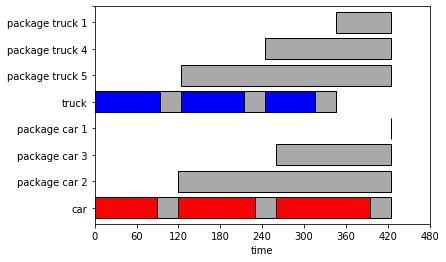

In [17]:
vrv.createGantt(myAssignments)

In [18]:
# If you have saved your Cesium path as an environment variable, you may use `os.environ` to access it:
import os
CESIUM_DIR = os.environ['CESIUMDIR']
# Otherwise, you may specify the patch to Cesium here:
# CESIUM_DIR = '/provide/path/to/Cesium/' 

In [19]:
# Generate a 3D movie of the routes:
vrv.createCesium(assignments = myAssignments, 
                 nodes       = myNodes, 
                 cesiumDir   = CESIUM_DIR, 
                 problemDir  = 'vrv_demo/addAssignment2D_example')

Message: File selector was written to /Users/murray/cesium/vrv_demo/addAssignment2D_example/;vrv_demo;addAssignment2D_example.vrv ...
Message: Configs were written to /Users/murray/cesium/vrv_demo/addAssignment2D_example/config.js ...
Message: Nodes were written to /Users/murray/cesium/vrv_demo/addAssignment2D_example/displayNodes.js ...
Message: Assignments (.js) were written to /Users/murray/cesium/vrv_demo/addAssignment2D_example/displayPaths.js ...
Message: Assignments (.czml) were written to /Users/murray/cesium/vrv_demo/addAssignment2D_example/routes.czml ...


### `addAssignment3D()`
This function appends to an existing `Assignments` dataframe, or creates a new `Assignments` dataframe if `initAssignments` is `None`.  The new rows in this dataframe describe all of the vehicle movements between given starting and ending locations, including timestamps indicating the departure and arrival times for each intermediate point. 
 
- See https://veroviz.org/docs/veroviz.createAssignments.html#veroviz.createAssignments.addAssignment3D for full documentation of this function.

In [1]:
# Import veroviz and check the latest version.
import veroviz as vrv

vrv.checkVersion()

'Your current installed version of veroviz is 0.4.0, the latest version available is 0.3.1. To update to the latest version, type `pip install --upgrade veroviz` at a command-line prompt.'

In [2]:
# Define 5 node locations, as [lat, lon] pairs:
locs = [[42.8871085, -78.8731949],
        [42.8888311, -78.8649649],
        [42.8802158, -78.8660787],
        [42.8845705, -78.8762794],
        [42.8908031, -78.8770140]]

In [3]:
# Generate a nodes dataframe from these locations:
myNodes = vrv.createNodesFromLocs(locs=locs)
myNodes

id        lat        lon altMeters nodeName nodeType popupText  \
0  1  42.887108 -78.873195         0     None     None         1   
1  2  42.888831 -78.864965         0     None     None         2   
2  3  42.880216 -78.866079         0     None     None         3   
3  4  42.884571 -78.876279         0     None     None         4   
4  5  42.890803 -78.877014         0     None     None         5   

  leafletIconPrefix leafletIconType leafletColor leafletIconText  \
0         glyphicon       info-sign         blue               1   
1         glyphicon       info-sign         blue               2   
2         glyphicon       info-sign         blue               3   
3         glyphicon       info-sign         blue               4   
4         glyphicon       info-sign         blue               5   

  cesiumIconType cesiumColor cesiumIconText elevMeters  
0            pin        blue              1       None  
1            pin        blue              2       None  
2            pin        blue              3       None  
3            pin        blue              4       None  
4            pin        blue              5       None

In [4]:
# View these nodes on a map:
vrv.createLeaflet(nodes=myNodes)

Example 1 -- Assume a single drone delivers packages from node 1 to all other nodes.

In [5]:
mySolution = {
    'drone': [[1,2,1], [1,3,1], [1,4,1], [1,5,1]]
}

In [6]:
# Define some information about our drone, for later use:
vehicleProperties = {
    'drone': {'modelPackage': 'veroviz/models/drone_package.gltf',
              'modelEmpty': 'veroviz/models/drone.gltf',
              'color': 'red'},
}

In [7]:
# Build the assignments for the drone deliveries:
myAssignments = vrv.initDataframe('assignments')

endTimeSec = 0.0
for arc in mySolution['drone']:
    # Fly from i to j with a package:
    [myAssignments, endTimeSec] = vrv.addAssignment3D(
        initAssignments    = myAssignments,
        objectID           = 'drone',
        modelFile          = vehicleProperties['drone']['modelPackage'],
        startLoc           = list(myNodes[myNodes['id'] == arc[0]][['lat', 'lon']].values[0]),
        endLoc             = list(myNodes[myNodes['id'] == arc[1]][['lat', 'lon']].values[0]),
        startTimeSec       = endTimeSec,
        takeoffSpeedMPS    = vrv.convertSpeed(30, 'miles', 'hr', 'meters', 'sec'),
        cruiseSpeedMPS     = vrv.convertSpeed(80, 'miles', 'hr', 'meters', 'sec'),
        landSpeedMPS       = vrv.convertSpeed( 5, 'miles', 'hr', 'meters', 'sec'),
        cruiseAltMetersAGL = vrv.convertDistance(350, 'feet', 'meters'),
        routeType          = 'square',
        # climbRateMPS       = None,
        # descentRateMPS     = None,
        # earliestLandTime   = -1,
        # loiterPosition     = 'arrivalAtAlt',
        leafletColor       = vehicleProperties['drone']['color'],
        cesiumColor        = vehicleProperties['drone']['color'])

    # Drop off a package
    myAssignments = vrv.addStaticAssignment(
            initAssignments  = myAssignments,
            objectID         = 'package %d' % (arc[1]),
            modelFile        = '/veroviz/models/box_yellow.gltf',
            loc              = list(myNodes[myNodes['id'] == arc[1]][['lat', 'lon']].values[0]),
            startTimeSec     = endTimeSec,
            endTimeSec       = -1)  
        
    # Fly from j to k empty:
    [myAssignments, endTimeSec] = vrv.addAssignment3D(
        initAssignments    = myAssignments,
        objectID           = 'drone',
        modelFile          = vehicleProperties['drone']['modelEmpty'],
        startLoc           = list(myNodes[myNodes['id'] == arc[1]][['lat', 'lon']].values[0]),
        endLoc             = list(myNodes[myNodes['id'] == arc[2]][['lat', 'lon']].values[0]),
        startTimeSec       = endTimeSec,
        takeoffSpeedMPS    = vrv.convertSpeed(30, 'miles', 'hr', 'meters', 'sec'),
        cruiseSpeedMPS     = vrv.convertSpeed(80, 'miles', 'hr', 'meters', 'sec'),
        landSpeedMPS       = vrv.convertSpeed( 5, 'miles', 'hr', 'meters', 'sec'),
        cruiseAltMetersAGL = vrv.convertDistance(350, 'feet', 'meters'),
        routeType          = 'square',
        # climbRateMPS       = None,
        # descentRateMPS     = None,
        # earliestLandTime   = -1,
        # loiterPosition     = 'arrivalAtAlt',
        leafletColor       = vehicleProperties['drone']['color'],
        cesiumColor        = vehicleProperties['drone']['color'])

myAssignments

odID   objectID                           modelFile modelScale  \
0     1      drone  /veroviz/models/drone_package.gltf        100   
1     1      drone  /veroviz/models/drone_package.gltf        100   
2     1      drone  /veroviz/models/drone_package.gltf        100   
3     2  package 2     /veroviz/models/box_yellow.gltf        100   
4     3      drone          /veroviz/models/drone.gltf        100   
5     3      drone          /veroviz/models/drone.gltf        100   
6     3      drone          /veroviz/models/drone.gltf        100   
7     4      drone  /veroviz/models/drone_package.gltf        100   
8     4      drone  /veroviz/models/drone_package.gltf        100   
9     4      drone  /veroviz/models/drone_package.gltf        100   
10    5  package 3     /veroviz/models/box_yellow.gltf        100   
11    6      drone          /veroviz/models/drone.gltf        100   
12    6      drone          /veroviz/models/drone.gltf        100   
13    6      drone          /veroviz/models/drone.gltf        100   
14    7      drone  /veroviz/models/drone_package.gltf        100   
15    7      drone  /veroviz/models/drone_package.gltf        100   
16    7      drone  /veroviz/models/drone_package.gltf        100   
17    8  package 4     /veroviz/models/box_yellow.gltf        100   
18    9      drone          /veroviz/models/drone.gltf        100   
19    9      drone          /veroviz/models/drone.gltf        100   
20    9      drone          /veroviz/models/drone.gltf        100   
21   10      drone  /veroviz/models/drone_package.gltf        100   
22   10      drone  /veroviz/models/drone_package.gltf        100   
23   10      drone  /veroviz/models/drone_package.gltf        100   
24   11  package 5     /veroviz/models/box_yellow.gltf        100   
25   12      drone          /veroviz/models/drone.gltf        100   
26   12      drone          /veroviz/models/drone.gltf        100   
27   12      drone          /veroviz/models/drone.gltf        100   

   modelMinPxSize  startTimeSec   startLat   startLon startAltMeters  \
0              75      0.000000  42.887108 -78.873195              0   
1              75      7.954565  42.887108 -78.873195         106.68   
2              75     27.499981  42.888831 -78.864965         106.68   
3              75     75.227372  42.888831 -78.864965              0   
4              75     75.227372  42.888831 -78.864965              0   
5              75     83.181938  42.888831 -78.864965         106.68   
6              75    102.727353  42.887108 -78.873195         106.68   
7              75    150.454745  42.887108 -78.873195              0   
8              75    158.409310  42.887108 -78.873195         106.68   
9              75    185.291772  42.880216 -78.866079         106.68   
10             75    233.019164  42.880216 -78.866079              0   
11             75    233.019164  42.880216 -78.866079              0   
12             75    240.973729  42.880216 -78.866079         106.68   
13             75    267.856192  42.887108 -78.873195         106.68   
14             75    315.583583  42.887108 -78.873195              0   
15             75    323.538148  42.887108 -78.873195         106.68   
16             75    334.111528  42.884571 -78.876279         106.68   
17             75    381.838919  42.884571 -78.876279              0   
18             75    381.838919  42.884571 -78.876279              0   
19             75    389.793484  42.884571 -78.876279         106.68   
20             75    400.366864  42.887108 -78.873195         106.68   
21             75    448.094255  42.887108 -78.873195              0   
22             75    456.048821  42.887108 -78.873195         106.68   
23             75    470.464313  42.890803 -78.877014         106.68   
24             75    518.191704  42.890803 -78.877014              0   
25             75    518.191704  42.890803 -78.877014              0   
26             75    526.146269  42.890803 -78.877014    

In [8]:
# Show the nodes and assignments on a map:
vrv.createLeaflet(nodes=myNodes, arcs=myAssignments)

FIXME -- Apply curved arcs here!

In [9]:
# If you have saved your Cesium path as an environment variable, you may use `os.environ` to access it:
import os
CESIUM_DIR = os.environ['CESIUMDIR']
# Otherwise, you may specify the patch to Cesium here:
# CESIUM_DIR = '/provide/path/to/Cesium/' 

In [10]:
# Create a 3D movie of the drone deliveries:
vrv.createCesium(assignments = myAssignments, 
                 nodes       = myNodes, 
                 cesiumDir   = CESIUM_DIR, 
                 problemDir  = 'vrv_demo/addAssignment3D_example1')

Message: File selector was written to /Users/murray/cesium/vrv_demo/addAssignment3D_example1/;vrv_demo;addAssignment3D_example1.vrv ...
Message: Configs were written to /Users/murray/cesium/vrv_demo/addAssignment3D_example1/config.js ...
Message: Nodes were written to /Users/murray/cesium/vrv_demo/addAssignment3D_example1/displayNodes.js ...
Message: Assignments (.js) were written to /Users/murray/cesium/vrv_demo/addAssignment3D_example1/displayPaths.js ...
Message: Assignments (.czml) were written to /Users/murray/cesium/vrv_demo/addAssignment3D_example1/routes.czml ...


Example 2 -- Coordinate deliveries with a drone launched from a truck

In [11]:
# Hard-code a solution.
# The truck will visit nodes 1->3->5->1
# The drone will launch from the truck at node 1, deliver to node 2, and return to the truck at node 3.
# The drone will then launch from the truck at 1, deliver to 4 and return to 5.
# The drone cannot land at nodes 3 and 5 until the truck has arrived.
mySolution = {
    'drone': [[1,2,3], [3,4,5]],
    'truck': [[1,3], [3,5], [5,1]]
}

In [12]:
# Define some information about our 2 vehicles, for use below:
vehicleProperties = {
    'drone': {'modelPackage': 'veroviz/models/drone_package.gltf',
              'modelEmpty': 'veroviz/models/drone.gltf',
              'color': 'red'},
    'truck': {'model': 'veroviz/models/ub_truck.gltf',
              'color': 'blue'}
}

In [13]:
# This example assumes the use of ORS as the data provider. 
# If you have saved your API key as an environment variable, you may use `os.environ` to access it:
import os
ORS_API_KEY = os.environ['ORSKEY']
# Otherwise, you may specify your key here:
# ORS_API_KEY = 'YOUR_ORS_KEY_GOES_HERE'

In [37]:
# Obtain the travel times for the truck:
[timeSecTruck, distMetersTruck] = vrv.getTimeDist2D(
    nodes            = myNodes,
    routeType        = 'fastest',
    dataProvider     = 'ORS-online',
    dataProviderArgs = {'APIkey': ORS_API_KEY})

In [15]:
# Obtain the travel times for the drone:
[timeSecDrone, groundDist, TotalDist] = vrv.getTimeDist3D(
    nodes            = myNodes,
    takeoffSpeedMPS    = vrv.convertSpeed(30, 'miles', 'hr', 'meters', 'sec'),
    cruiseSpeedMPS     = vrv.convertSpeed(80, 'miles', 'hr', 'meters', 'sec'),
    landSpeedMPS       = vrv.convertSpeed( 5, 'miles', 'hr', 'meters', 'sec'),
    cruiseAltMetersAGL = vrv.convertDistance(350, 'feet', 'meters'),
    routeType          = 'square')

In [16]:
# Find the coordination times for the truck and drone.
# These will be the earliest times that both the truck and drone can arrive at a node.
maxArrivalTime = {}

# 1) The truck travels from 1 to 3; the drone travels from 1 to 2 to 3:
truckArrivalTime = timeSecTruck[1,3]
droneArrivalTime = timeSecDrone[1,2] + timeSecDrone[2,3]
maxArrivalTime[3] = max(truckArrivalTime, droneArrivalTime)

# 2) The truck travels from 3 to 5; the drone travels from 3 to 4 to 5:
truckArrivalTime = maxArrivalTime[3] + timeSecTruck[3,5]
droneArrivalTime = maxArrivalTime[3] + timeSecDrone[3,4] + timeSecDrone[4,5]
maxArrivalTime[5] = max(truckArrivalTime, droneArrivalTime)

# 3) Let's also capture the time at which the truck will return to node 1:
maxArrivalTime[1] = maxArrivalTime[5] + timeSecTruck[5,1]

# maxArrival Time[1] is now the total time required to complete all of the deliveries
maxArrivalTime

{3: 157.79159312243848, 5: 364.9115931224385, 1: 458.4515931224385}

In [17]:
# Build assignments for the drone deliveries:
myAssignments = vrv.initDataframe('assignments')

endTimeSec = 0.0
for arc in mySolution['drone']:
    # Fly from i to j with a package:
    [myAssignments, endTimeSec] = vrv.addAssignment3D(
        initAssignments    = myAssignments,
        objectID           = 'drone',
        modelFile          = vehicleProperties['drone']['modelPackage'],
        startLoc           = list(myNodes[myNodes['id'] == arc[0]][['lat', 'lon']].values[0]),
        endLoc             = list(myNodes[myNodes['id'] == arc[1]][['lat', 'lon']].values[0]),
        startTimeSec       = endTimeSec,
        takeoffSpeedMPS    = vrv.convertSpeed(30, 'miles', 'hr', 'meters', 'sec'),
        cruiseSpeedMPS     = vrv.convertSpeed(80, 'miles', 'hr', 'meters', 'sec'),
        landSpeedMPS       = vrv.convertSpeed( 5, 'miles', 'hr', 'meters', 'sec'),
        cruiseAltMetersAGL = vrv.convertDistance(350, 'feet', 'meters'),
        routeType          = 'square',
        leafletColor       = vehicleProperties['drone']['color'],
        cesiumColor        = vehicleProperties['drone']['color'])

    # Drop off a package
    myAssignments = vrv.addStaticAssignment(
            initAssignments  = myAssignments,
            objectID         = 'package %d' % (arc[1]),
            modelFile        = '/veroviz/models/box_yellow.gltf',
            loc              = list(myNodes[myNodes['id'] == arc[1]][['lat', 'lon']].values[0]),
            startTimeSec     = endTimeSec,
            endTimeSec       = -1)  
    
    # Fly from j to k empty:
    [myAssignments, endTimeSec] = vrv.addAssignment3D(
        initAssignments    = myAssignments,
        objectID           = 'drone',
        modelFile          = vehicleProperties['drone']['modelEmpty'],
        startLoc           = list(myNodes[myNodes['id'] == arc[1]][['lat', 'lon']].values[0]),
        endLoc             = list(myNodes[myNodes['id'] == arc[2]][['lat', 'lon']].values[0]),
        startTimeSec       = endTimeSec,
        takeoffSpeedMPS    = vrv.convertSpeed(30, 'miles', 'hr', 'meters', 'sec'),
        cruiseSpeedMPS     = vrv.convertSpeed(80, 'miles', 'hr', 'meters', 'sec'),
        landSpeedMPS       = vrv.convertSpeed( 5, 'miles', 'hr', 'meters', 'sec'),
        cruiseAltMetersAGL = vrv.convertDistance(350, 'feet', 'meters'),
        routeType          = 'square',
        earliestLandTime   = maxArrivalTime[arc[2]],
        loiterPosition     = 'arrivalAtAlt',
        leafletColor       = vehicleProperties['drone']['color'],
        cesiumColor        = vehicleProperties['drone']['color'])

myAssignments

odID   objectID                           modelFile modelScale  \
0     1      drone  /veroviz/models/drone_package.gltf        100   
1     1      drone  /veroviz/models/drone_package.gltf        100   
2     1      drone  /veroviz/models/drone_package.gltf        100   
3     2  package 2     /veroviz/models/box_yellow.gltf        100   
4     3      drone          /veroviz/models/drone.gltf        100   
5     3      drone          /veroviz/models/drone.gltf        100   
6     3      drone          /veroviz/models/drone.gltf        100   
7     3      drone          /veroviz/models/drone.gltf        100   
8     4      drone  /veroviz/models/drone_package.gltf        100   
9     4      drone  /veroviz/models/drone_package.gltf        100   
10    4      drone  /veroviz/models/drone_package.gltf        100   
11    5  package 4     /veroviz/models/box_yellow.gltf        100   
12    6      drone          /veroviz/models/drone.gltf        100   
13    6      drone          /veroviz/models/drone.gltf        100   
14    6      drone          /veroviz/models/drone.gltf        100   
15    6      drone          /veroviz/models/drone.gltf        100   

   modelMinPxSize  startTimeSec   startLat   startLon startAltMeters  \
0              75      0.000000  42.887108 -78.873195              0   
1              75      7.954565  42.887108 -78.873195         106.68   
2              75     27.499981  42.888831 -78.864965         106.68   
3              75     75.227372  42.888831 -78.864965              0   
4              75     75.227372  42.888831 -78.864965              0   
5              75     83.181938  42.888831 -78.864965         106.68   
6              75    110.064202  42.880216 -78.866079         106.68   
7              75    110.064202  42.880216 -78.866079         106.68   
8              75    157.791593  42.880216 -78.866079              0   
9              75    165.746158  42.880216 -78.866079         106.68   
10             75    192.690012  42.884571 -78.876279         106.68   
11             75    240.417403  42.884571 -78.876279              0   
12             75    240.417403  42.884571 -78.876279              0   
13             75    248.371968  42.884571 -78.876279         106.68   
14             75    267.804802  42.890803 -78.877014         106.68   
15             75    317.184202  42.890803 -78.877014         106.68   

   endTimeSec  ...  ganttColor  popupText startElevMeters endElevMeters  \
0     7.95457  ...    darkgray       None            None          None   
1        27.5  ...    darkgray       None            None          None   
2     75.2274  ...    darkgray       None            None          None   
3          -1  ...    darkgray       None            None          None   
4     83.1819  ...    darkgray       None            None          None   
5     110.064  ...    darkgray       None            None          None   
6     110.064  ...   lightgray       None            None          None   
7     157.792  ...    darkgray       None            None          None   
8     165.746  ...    darkgray       None            None          None   
9      192.69  ...    darkgray       None            None          None   
10    240.417  ...    darkgray       None            None          None   
11         -1  ...    darkgray       None            None          None   
12    248.372  ...    darkgray       None            None          None   
13    267.805  ...    darkgray       None            None          None   
14    317.184  ...   lightgray       None            None          None   
15    364.912  ...    darkgray       None            None          None   

   wayname waycategory surface waytype steepness tollway  
0     None        None    None    None      None    None  
1     None        None    None    None      None    None  
2     None        None    None    None      None    None  
3     None        None    None    None      None    None  
4     None        None    None   

In [18]:
# Build assignments for the truck route:
endTimeSec = 0.0
for arc in mySolution['truck']:
    [myAssignments, endTimeSec] = vrv.addAssignment2D(
            initAssignments  = myAssignments,
            objectID         = 'truck',
            modelFile        = vehicleProperties['truck']['model'],
            startLoc         = list(myNodes[myNodes['id'] == arc[0]][['lat', 'lon']].values[0]),
            endLoc           = list(myNodes[myNodes['id'] == arc[1]][['lat', 'lon']].values[0]),
            startTimeSec     = endTimeSec,
            leafletColor     = vehicleProperties['truck']['color'],
            cesiumColor      = vehicleProperties['truck']['color'], 
            routeType        = 'fastest',
            dataProvider     = 'ORS-online', 
            dataProviderArgs = {'APIkey': ORS_API_KEY})
    
    # If necessary, wait for the drone to arrive:
    if (endTimeSec < maxArrivalTime[arc[1]]):
        myAssignments = vrv.addStaticAssignment(
            initAssignments  = myAssignments,
            objectID         = 'truck',
            modelFile        = vehicleProperties['truck']['model'],
            loc              = list(myNodes[myNodes['id'] == arc[1]][['lat', 'lon']].values[0]),
            startTimeSec     = endTimeSec,
            endTimeSec       = maxArrivalTime[arc[1]])

        endTimeSec = maxArrivalTime[arc[1]]  

In [19]:
# Show the nodes and assignments on a map:
vrv.createLeaflet(nodes=myNodes, arcs=myAssignments)

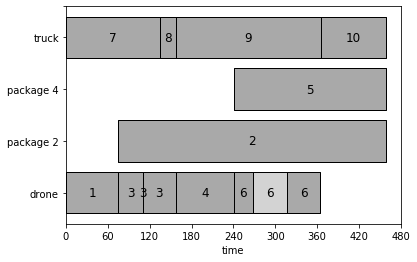

In [22]:
# Create a Gantt chart of the assignments:
vrv.createGantt(assignments=myAssignments, overlayColumn='odID')

In [20]:
# Create a 3D movie of the vehicle routes:
vrv.createCesium(assignments = myAssignments, 
                 nodes       = myNodes, 
                 cesiumDir   = CESIUM_DIR, 
                 problemDir  = 'vrv_demo/addAssignment3D_example2')

Message: File selector was written to /Users/murray/cesium/vrv_demo/addAssignment3D_example2/;vrv_demo;addAssignment3D_example2.vrv ...
Message: Configs were written to /Users/murray/cesium/vrv_demo/addAssignment3D_example2/config.js ...
Message: Nodes were written to /Users/murray/cesium/vrv_demo/addAssignment3D_example2/displayNodes.js ...
Message: Assignments (.js) were written to /Users/murray/cesium/vrv_demo/addAssignment3D_example2/displayPaths.js ...
Message: Assignments (.czml) were written to /Users/murray/cesium/vrv_demo/addAssignment3D_example2/routes.czml ...


### `addStaticAssignment()`
This function adds an "object" to an assignments dataframe.  One use of this function is to add a package or other stationary 3D model to be displayed in Cesium.  This function is also useful for holding a vehicle stationary at a location (e.g., during service or loitering).  

- See https://veroviz.org/docs/veroviz.createAssignments.html#veroviz.createAssignments.addStaticAssignment for full documentation of this function.

In [23]:
# Import veroviz and check the latest version.
>>> import veroviz as vrv
>>> import os

>>> vrv.checkVersion()

'Your current installed version of veroviz is 0.4.0, the latest version available is 0.3.1. To update to the latest version, type `pip install --upgrade veroviz` at a command-line prompt.'

Create two nodes.
- See https://veroviz.org/docs/veroviz.generateNodes.html#veroviz.generateNodes.createNodesFromLocs for more info.

In [24]:
>>> myNodes = vrv.createNodesFromLocs(
...     locs = [[42.1538, -78.4253],
...             [42.6343, -78.1146]])
>>> myNodes

id      lat      lon altMeters nodeName nodeType popupText  \
0  1  42.1538 -78.4253         0     None     None         1   
1  2  42.6343 -78.1146         0     None     None         2   

  leafletIconPrefix leafletIconType leafletColor leafletIconText  \
0         glyphicon       info-sign         blue               1   
1         glyphicon       info-sign         blue               2   

  cesiumIconType cesiumColor cesiumIconText elevMeters  
0            pin        blue              1       None  
1            pin        blue              2       None

Move the truck from one node to the other.
- See https://veroviz.org/docs/veroviz.getShapepoints2D.html for more info.    

In [25]:
>>> myAssignments = vrv.getShapepoints2D(
...     odID           = 0,
...     objectID       = 'truck',
...     modelFile      = 'veroviz/models/ub_truck.gltf',
...     modelScale     = 80, 
...     modelMinPxSize = 20, 
...     startLoc       = list(myNodes.loc[0][['lat', 'lon']].values),
...     endLoc         = list(myNodes.loc[1][['lat', 'lon']].values),
...     routeType      = 'euclidean2D',
...     dataProvider   = None,
...     speedMPS       = vrv.convertSpeed(55, 'miles', 'hr', 'm', 's'))

>>> myAssignments

odID objectID                      modelFile modelScale modelMinPxSize  \
0    0    truck  /veroviz/models/ub_truck.gltf         80             20   

   startTimeSec  startLat  startLon startAltMeters   endTimeSec  ...  \
0           0.0   42.1538  -78.4253              0  2407.290832  ...   

   ganttColor  popupText startElevMeters endElevMeters wayname waycategory  \
0    darkgray       None            None          None    None        None   

   surface waytype steepness tollway  
0     None    None      None    None  

[1 rows x 32 columns]

Make the truck wait at the destination.

In [26]:
>>> myAssignments = vrv.addStaticAssignment(
...     initAssignments = myAssignments, 
...     odID            = 0, 
...     objectID        = 'truck', 
...     modelFile       = 'veroviz/models/ub_truck.gltf', 
...     modelScale      = 80, 
...     modelMinPxSize  = 20, 
...     loc             = list(myAssignments[myAssignments['objectID']=='truck'][['endLat', 'endLon']].values[0]), 
...     startTimeSec    = myAssignments[myAssignments['objectID']=='truck']['endTimeSec'].values[0], 
...     endTimeSec      = myAssignments[myAssignments['objectID']=='truck']['endTimeSec'].values[0] + 30)

>>> myAssignments

odID objectID                      modelFile modelScale modelMinPxSize  \
0    0    truck  /veroviz/models/ub_truck.gltf         80             20   
1    1    truck  /veroviz/models/ub_truck.gltf         80             20   

   startTimeSec  startLat  startLon startAltMeters   endTimeSec  ...  \
0      0.000000   42.1538  -78.4253              0  2407.290832  ...   
1   2407.290832   42.6343  -78.1146              0  2437.290832  ...   

   ganttColor  popupText startElevMeters endElevMeters wayname waycategory  \
0    darkgray       None            None          None    None        None   
1    darkgray       None            None          None    None        None   

  surface waytype steepness tollway  
0    None    None      None    None  
1    None    None      None    None  

[2 rows x 32 columns]

Drop off a package.

In [27]:
>>> myAssignments = vrv.addStaticAssignment(
...     initAssignments = myAssignments, 
...     odID            = 0, 
...     objectID        = 'package', 
...     modelFile       = 'veroviz/models/box_blue.gltf', 
...     modelScale      = 50, 
...     modelMinPxSize  = 10, 
...     loc             = list(myAssignments[myAssignments['objectID']=='truck'][['endLat', 'endLon']].values[0]), 
...     startTimeSec    = myAssignments[myAssignments['objectID']=='truck']['endTimeSec'].values[0] + 30, 
...     endTimeSec      = -1)

>>> myAssignments

odID objectID                      modelFile modelScale modelMinPxSize  \
0    0    truck  /veroviz/models/ub_truck.gltf         80             20   
1    1    truck  /veroviz/models/ub_truck.gltf         80             20   
2    2  package  /veroviz/models/box_blue.gltf         50             10   

   startTimeSec  startLat  startLon startAltMeters endTimeSec  ...  \
0      0.000000   42.1538  -78.4253              0    2407.29  ...   
1   2407.290832   42.6343  -78.1146              0    2437.29  ...   
2   2437.290832   42.6343  -78.1146              0         -1  ...   

   ganttColor  popupText startElevMeters endElevMeters wayname waycategory  \
0    darkgray       None            None          None    None        None   
1    darkgray       None            None          None    None        None   
2    darkgray       None            None          None    None        None   

  surface waytype steepness tollway  
0    None    None      None    None  
1    None    None      None    None  
2    None    None      None    None  

[3 rows x 32 columns]

View in Leaflet.  
- Note that we can't see the truck waiting. Also, the package doesn't show up in Leaflet.
- See https://veroviz.org/docs/veroviz.createLeaflet.html for more info.

In [28]:
vrv.createLeaflet(nodes=myNodes, arcs=myAssignments)

Create Cesium output, so we can observe our truck and package.
- See https://veroviz.org/docs/veroviz.createCesium.html for more info.

In [29]:
>>> vrv.createCesium(
...     assignments = myAssignments, 
...     nodes       = myNodes, 
...     startTime   = '08:00:00', 
...     cesiumDir   = os.environ['CESIUMDIR'],
...     problemDir  = 'vrv_demo/static_object_demo')

Message: File selector was written to /Users/murray/cesium/vrv_demo/static_object_demo/;vrv_demo;static_object_demo.vrv ...
Message: Configs were written to /Users/murray/cesium/vrv_demo/static_object_demo/config.js ...
Message: Nodes were written to /Users/murray/cesium/vrv_demo/static_object_demo/displayNodes.js ...
Message: Assignments (.js) were written to /Users/murray/cesium/vrv_demo/static_object_demo/displayPaths.js ...
Message: Assignments (.czml) were written to /Users/murray/cesium/vrv_demo/static_object_demo/routes.czml ...


### `createAssignmentsFromArcs2D()`
This function generates an "assignments" dataframe containing all of the "shapepoints" between successive arcs, including timestamps indicating the departure and arrival times for each shapepoint. Shapepoints are pairs of GPS coordinates that are connected by straight lines.  For a particular origin and destination, numerous individual shapepoints can be combined to define a travel route along a road network. 

- This function is for vehicles traveling on a ground plane (2-dimensional).  For vehicles requiring an altitude component (e.g., drones), a 3D version of this function is provided by `createAssignmentsFromArcs3D()`.
	
- This function creates an assignments dataframe from an arcs dataframe.  Similar functions are available to create an assignments dataframe from a sequence of nodes (`createShapepointsFromNodeSeq2D()`) or from a sequence of locations (`createShapepointsFromLocSeq2D()`).

- See https://veroviz.org/docs/veroviz.createAssignments.html#veroviz.createAssignments.createAssignmentsFromArcs2D for full documentation of this function.

In [1]:
# First import veroviz and check if it is the latest version
import veroviz as vrv
vrv.checkVersion()

'Your current installed version of veroviz is 0.4.0, the latest version available is 0.3.1. To update to the latest version, type `pip install --upgrade veroviz` at a command-line prompt.'

In [7]:
# Generate arcs from a given ordered list of coordinates:
arcs = vrv.createArcsFromLocSeq(
    locSeq=[[42.3561, -78.4279, 30],
            [42.3465, -78.4235, 30],
            [42.3431, -78.4186, 40]])
arcs

odID objectID  startLat  startLon   endLat   endLon leafletColor  \
0    1     None   42.3561  -78.4279  42.3465 -78.4235       orange   
1    2     None   42.3465  -78.4235  42.3431 -78.4186       orange   

  leafletWeight leafletStyle  leafletOpacity useArrows cesiumColor  \
0             3        solid             0.8      True      orange   
1             3        solid             0.8      True      orange   

  cesiumWeight cesiumStyle  cesiumOpacity popupText startElevMeters  \
0            3       solid            0.8      None            None   
1            3       solid            0.8      None            None   

  endElevMeters  
0          None  
1          None

In [8]:
# Display the arcs on a Leaflet map:
vrv.createLeaflet(arcs=arcs)

In [9]:
# The following examples assume the use of ORS as the data provider. 
# If you have saved your API key as an environment variable, 
# you may use `os.environ` to access it:
import os
ORS_API_KEY = os.environ['ORSKEY']
# Otherwise, you may specify your key here:
# ORS_API_KEY = 'YOUR_ORS_KEY_GOES_HERE'

In [12]:
# Generate an assignments dataframe from the arcs dataframe:
myAssignments = vrv.createAssignmentsFromArcs2D(
    arcs             = arcs, 
    modelFile        = 'veroviz/models/car_blue.gltf', 
    routeType        = 'fastest', 
    dataProvider     = 'ors-online',
    dataProviderArgs = {'APIkey': ORS_API_KEY},
    leafletColor     = 'blue')
myAssignments

odID   startLat   startLon     endLat     endLon
0     1  42.356104 -78.427904  42.355231 -78.429280
1     1  42.355231 -78.429280  42.354231 -78.430788
2     1  42.354231 -78.430788  42.351094 -78.435754
3     1  42.351094 -78.435754  42.350515 -78.436640
4     1  42.350515 -78.436640  42.348942 -78.439148
5     1  42.348942 -78.439148  42.348414 -78.440050
6     1  42.348414 -78.440050  42.348043 -78.440648
7     1  42.348043 -78.440648  42.347696 -78.441173
8     1  42.347696 -78.441173  42.345221 -78.445089
9     1  42.345221 -78.445089  42.344865 -78.445682
10    1  42.344865 -78.445682  42.344055 -78.446969
11    1  42.344055 -78.446969  42.344009 -78.446557
12    1  42.344009 -78.446557  42.343891 -78.445748
13    1  42.343891 -78.445748  42.343811 -78.445318
14    1  42.343811 -78.445318  42.343623 -78.443784
15    1  42.343623 -78.443784  42.343542 -78.442826
16    1  42.343542 -78.442826  42.343415 -78.441315
17    1  42.343415 -78.441315  42.343423 -78.440856
18    1  42.343423 -78.440856  42.343481 -78.440444
19    1  42.343481 -78.440444  42.343568 -78.440116
20    1  42.343568 -78.440116  42.343960 -78.438820
21    1  42.343960 -78.438820  42.344098 -78.438271
22    1  42.344098 -78.438271  42.344115 -78.438113
23    1  42.344115 -78.438113  42.344106 -78.437571
24    1  42.344106 -78.437571  42.344001 -78.436993
25    1  42.344001 -78.436993  42.343696 -78.435069
26    1  42.343696 -78.435069  42.343609 -78.434388
27    1  42.343609 -78.434388  42.343561 -78.433724
28    1  42.343561 -78.433724  42.343587 -78.432947
29    1  42.343587 -78.432947  42.343700 -78.431795
30    1  42.343700 -78.431795  42.343773 -78.430394
31    1  42.343773 -78.430394  42.343791 -78.430151
32    1  42.343791 -78.430151  42.343765 -78.427052
33    1  42.343765 -78.427052  42.343782 -78.426904
34    1  42.343782 -78.426904  42.343845 -78.426658
35    1  42.343845 -78.426658  42.343916 -78.426437
36    1  42.343916 -78.426437  42.343995 -78.426236
37    1  42.343995 -78.426236  42.344178 -78.425922
38    1  42.344178 -78.425922  42.344359 -78.425697
39    1  42.344359 -78.425697  42.346143 -78.423838
40    1  42.346143 -78.423838  42.346497 -78.423495
41    2  42.346497 -78.423495  42.346143 -78.423838
42    2  42.346143 -78.423838  42.344359 -78.425697
43    2  42.344359 -78.425697  42.344178 -78.425922
44    2  42.344178 -78.425922  42.343995 -78.426236
45    2  42.343995 -78.426236  42.343916 -78.426437
46    2  42.343916 -78.426437  42.343807 -78.425835
47    2  42.343807 -78.425835  42.343670 -78.424928
48    2  42.343670 -78.424928  42.343561 -78.424560
49    2  42.343561 -78.424560  42.343353 -78.423991
50    2  42.343353 -78.423991  42.343258 -78.423649
51    2  42.343258 -78.423649  42.343098 -78.422686
52    2  42.343098 -78.422686  42.342726 -78.421111
53    2  42.342726 -78.421111  42.342701 -78.420702
54    2  42.342701 -78.420702  42.342737 -78.420323
55    2  42.342737 -78.420323  42.342781 -78.420108
56    2  42.342781 -78.420108  42.343025 -78.419226
57    2  42.343025 -78.419226  42.343149 -78.418618

In [15]:
# Display the assignments on a map:
vrv.createLeaflet(arcs=myAssignments)

### `createAssignmentsFromLocSeq2D()`
This function generates an "assignments" dataframe containing all of the "shapepoints" between successive locations, including timestamps indicating the departure and arrival times for each shapepoint. Shapepoints are pairs of GPS coordinates that are connected by straight lines.  For a particular origin and destination, numerous individual shapepoints can be combined to define a travel route along a road network.  

- This function is for vehicles traveling on a ground plane (2-dimensional).  For vehicles requiring an altitude component (e.g., drones), a 3D version of this function is provided by `createAssignmentsFromLocSeq3D()`.
	
- This function creates an assignments dataframe from a sequence of [lat, lon] locations.  Similar functions are available to create an assignments dataframe from an arcs dataframe (`createShapepointsFromArcs2D()`) or from a sequence of nodes (`createShapepointsFromNodeSeq2D()`).

- See https://veroviz.org/docs/veroviz.createAssignments.html#veroviz.createAssignments.createAssignmentsFromLocSeq2D for full documentation of this function.

In [16]:
# Import veroviz and check the latest version.
>>> import veroviz as vrv

>>> vrv.checkVersion()

'Your current installed version of veroviz is 0.4.0, the latest version available is 0.3.1. To update to the latest version, type `pip install --upgrade veroviz` at a command-line prompt.'

In [17]:
# The following examples assume the use of ORS as the data provider. If you have saved your API key as an environment variable, you may use `os.environ` to access it:
>>> import os
>>> ORS_API_KEY = os.environ['ORSKEY']
>>> # Otherwise, you may specify your key here:
>>> # ORS_API_KEY = 'YOUR_ORS_KEY_GOES_HERE'

In [18]:
# Specify a sequence of [lat, lon] or [lat, lon, alt] locations. 
>>> locs = [
...     [42.1538, -78.4253, 30], 
...     [42.3465, -78.6234, 30], 
...     [42.6343, -78.1146, 40],
...     [42.1538, -78.4253, 30]] 

Example 1 - A simple example using Euclidean travel, and no service times.  The assignments dataframe will have 3 rows.

In [19]:
>>> assignmentsDF = vrv.createAssignmentsFromLocSeq2D(
...     locSeq         = locs, 
...     serviceTimeSec = 0.0, 
...     objectID       = 'Blue Car', 
...     modelFile      = 'veroviz/models/car_blue.gltf', 
...     routeType      = 'euclidean2D',
...     speedMPS       = 10)
>>> assignmentsDF

odID  objectID                      modelFile modelScale modelMinPxSize  \
0    1  Blue Car  /veroviz/models/car_blue.gltf        100             75   
1    2  Blue Car  /veroviz/models/car_blue.gltf        100             75   
2    3  Blue Car  /veroviz/models/car_blue.gltf        100             75   

   startTimeSec  startLat  startLon startAltMeters    endTimeSec  ...  \
0      0.000000   42.1538  -78.4253             30   2693.379882  ...   
1   2693.379882   42.3465  -78.6234             30   7958.098133  ...   
2   7958.098133   42.6343  -78.1146             40  13876.937537  ...   

   ganttColor  popupText startElevMeters endElevMeters wayname waycategory  \
0    darkgray       None            None          None    None        None   
1    darkgray       None            None          None    None        None   
2    darkgray       None            None          None    None        None   

   surface waytype steepness tollway  
0     None    None      None    None  
1     None    None      None    None  
2     None    None      None    None  

[3 rows x 32 columns]

Example 2 - The vehicle will follow the road network, resulting in an assignments dataframe with significantly more than 3 rows.  The vehicle will remain stationary at the destination locations.  The travel time for each origin/destination pair will be calculated separately.

In [20]:
>>> # Make our car wait for 65 seconds before starting:
>>> assignmentsDF = vrv.addStaticAssignment(
...     odID         = 0, 
...     objectID     = 'Blue Car', 
...     modelFile    = 'veroviz/models/car_blue.gltf', 
...     loc          = locs[0], 
...     startTimeSec = 0.0, 
...     endTimeSec   = 65.0)

In [21]:
>>> # This example includes all of the available input arguments:
>>> newAssignmentsDF = vrv.createAssignmentsFromLocSeq2D(
...     initAssignments  = assignmentsDF, 
...     locSeq           = locs, 
...     serviceTimeSec   = 20.0, 
...     odID             = 1, 
...     objectID         = 'Blue Car', 
...     modelFile        = 'veroviz/models/car_blue.gltf', 
...     modelScale       = 100,
...     modelMinPxSize   = 75,
...     startTimeSec     = 65.0, 
...     expDurationArgs  = {'getTravelTimes': True}, 
...     routeType        = 'fastest',
...     speedMPS         = None,   
...     leafletColor     = 'blue', 
...     leafletWeight    = 3, 
...     leafletStyle     = 'dashed', 
...     leafletOpacity   = 0.8, 
...     useArrows        = True, 
...     cesiumColor      = 'blue', 
...     cesiumWeight     = 3, 
...     cesiumStyle      = 'solid', 
...     cesiumOpacity    = 0.8, 
...     dataProvider     = 'ORS-online',
...     dataProviderArgs = {'APIkey' : ORS_API_KEY})
>>> newAssignmentsDF


Message: The origin point (lat: 42.1538, lon: -78.4253) is 492.9 meters away from the road. You might find a gap between the origin point and the route.
Message: The destination point (lat: 42.3465, lon: -78.6234) is 254.8 meters away from the road. You might find a gap between destination point and the route.
Message: The origin point (lat: 42.3465, lon: -78.6234) is 254.8 meters away from the road. You might find a gap between the origin point and the route.
Message: The destination point (lat: 42.6343, lon: -78.1146) is 343.9 meters away from the road. You might find a gap between destination point and the route.
Message: The origin point (lat: 42.6343, lon: -78.1146) is 343.9 meters away from the road. You might find a gap between the origin point and the route.
Message: The destination point (lat: 42.1538, lon: -78.4253) is 492.9 meters away from the road. You might find a gap between destination point and the route.


odID  objectID                      modelFile modelScale modelMinPxSize  \
0       0  Blue Car  /veroviz/models/car_blue.gltf        100             75   
1       1  Blue Car  /veroviz/models/car_blue.gltf        100             75   
2       1  Blue Car  /veroviz/models/car_blue.gltf        100             75   
3       1  Blue Car  /veroviz/models/car_blue.gltf        100             75   
4       1  Blue Car  /veroviz/models/car_blue.gltf        100             75   
...   ...       ...                            ...        ...            ...   
2010    5  Blue Car  /veroviz/models/car_blue.gltf        100             75   
2011    5  Blue Car  /veroviz/models/car_blue.gltf        100             75   
2012    5  Blue Car  /veroviz/models/car_blue.gltf        100             75   
2013    5  Blue Car  /veroviz/models/car_blue.gltf        100             75   
2014    6  Blue Car  /veroviz/models/car_blue.gltf        100             75   

      startTimeSec   startLat   startLon startAltMeters    endTimeSec  ...  \
0         0.000000  42.153800 -78.425300             30     65.000000  ...   
1        65.000000  42.157210 -78.421483              0     79.346516  ...   
2        79.346516  42.158075 -78.422889              0     81.888900  ...   
3        81.888900  42.158237 -78.423128              0     90.136052  ...   
4        90.136052  42.158812 -78.423837              0     98.799661  ...   
...            ...        ...        ...            ...           ...  ...   
2010  14590.396376  42.155856 -78.419619              0  14592.560848  ...   
2011  14592.560848  42.156079 -78.419919              0  14594.111739  ...   
2012  14594.111739  42.156253 -78.420113              0  14601.221180  ...   
2013  14601.221180  42.156979 -78.421107              0  14603.710000  ...   
2014  14603.710000  42.153800 -78.425300             30  14623.710000  ...   

      ganttColor  popupText startElevMeters endElevMeters          wayname  \
0       darkgray       None            None          None             None   
1       darkgray       None             492           494  Fay Hollow Road   
2       darkgray       None             494         494.2  Fay Hollow Road   
3       darkgray       None           494.2           495  Fay Hollow Road   
4       darkgray       None             495         495.9  Fay Hollow Road   
...          ...        ...             ...           ...              ...   
2010    darkgray       None           477.2           478  Fay Hollow Road   
2011    darkgray       None             478         478.9  Fay Hollow Road   
2012    darkgray       None           478.9         483.7  Fay Hollow Road   
2013    darkgray       None           483.7         485.6  Fay Hollow Road   
2014   lightgray       None            None          None             None   

      waycategory  surface waytype steepness tollway  
0            None     None    None      None    None  
1     No category  Asphalt  Street         1   False  
2     No category  Asphalt  Street         1   False  
3     No category  Asphalt  Street         1   False  
4     No category  Asphalt  Street         1   False  
...           ...      ...     ...       ...     ...  
2010  No category  Asphalt  Street         1   False  
2011  No category  Asphalt  Street         1   False  
2012  No category  Asphalt  Street         2   False  
2013  No category  Asphalt  Street         2   False  
2014         None     None    None      None    None  

[2015 rows x 32 columns]

In [22]:
# Generate a `Nodes` dataframe from our first three locations 
# (the fourth location is a duplicate of the first).  
exampleNodes = vrv.createNodesFromLocs(locs=locs[0:3])

In [23]:
# View the assignments in Leaflet:  
>>> vrv.createLeaflet(arcs=newAssignmentsDF, nodes=exampleNodes)

In [24]:
# View the assignments in Cesium:
>>> vrv.createCesium(
...     assignments = newAssignmentsDF, 
...     nodes       = exampleNodes, 
...     startTime   = '08:00:00', 
...     cesiumDir   = os.environ['CESIUMDIR'],
...     problemDir  = 'vrv_demo/createAssignmentsLocSeq_example')

Message: File selector was written to /Users/murray/cesium/vrv_demo/createAssignmentsLocSeq_example/;vrv_demo;createAssignmentsLocSeq_example.vrv ...
Message: Configs were written to /Users/murray/cesium/vrv_demo/createAssignmentsLocSeq_example/config.js ...
Message: Nodes were written to /Users/murray/cesium/vrv_demo/createAssignmentsLocSeq_example/displayNodes.js ...
Message: Assignments (.js) were written to /Users/murray/cesium/vrv_demo/createAssignmentsLocSeq_example/displayPaths.js ...
Message: Assignments (.czml) were written to /Users/murray/cesium/vrv_demo/createAssignmentsLocSeq_example/routes.czml ...


### `createAssignmentsFromNodeSeq2D()`
This function generates an "assignments" dataframe containing all of the "shapepoints" between successive node locations, including timestamps indicating the departure and arrival times for each shapepoint. Shapepoints are pairs of GPS coordinates that are connected by straight lines.  For a particular origin and destination, numerous individual shapepoints can be combined to define a travel route along a road network. 

- This function is for vehicles traveling on a ground plane (2-dimensional).  For vehicles requiring an altitude component (e.g., drones), a 3D version of this function is provided by `createAssignmentsFromLocSeq3D()`.
	
- This function creates an assignments dataframe from a sequence of nodes.  Similar functions are available to create an assignments dataframe from an arcs dataframe (`createShapepointsFromArcs2D()`) or from a sequence of locations (`createShapepointsFromLocSeq2D()`).

- See https://veroviz.org/docs/veroviz.createAssignments.html#veroviz.createAssignments.createAssignmentsFromNodeSeq2D for full documentation of this function.

In [25]:
# Import veroviz and check the latest version.
>>> import veroviz as vrv

>>> vrv.checkVersion()

'Your current installed version of veroviz is 0.4.0, the latest version available is 0.3.1. To update to the latest version, type `pip install --upgrade veroviz` at a command-line prompt.'

In [26]:
# The following examples assume the use of ORS as the data provider. If you have saved your API key as an environment variable, you may use `os.environ` to access it:
>>> import os
>>> ORS_API_KEY = os.environ['ORSKEY']
>>> # Otherwise, you may specify your key here:
>>> # ORS_API_KEY = 'YOUR_ORS_KEY_GOES_HERE'

In [27]:
# Generate a `Nodes` dataframe from a list of coordinates.  
>>> locs = [
...     [42.1538, -78.4253], 
...     [42.3465, -78.6234], 
...     [42.6343, -78.1146]]
>>> exampleNodes = vrv.createNodesFromLocs(locs=locs)

Example 1 - A simple example using Euclidean travel, and no service times.  The assignments dataframe will have 3 rows.

In [28]:
>>> assignmentsDF = vrv.createAssignmentsFromNodeSeq2D(
...     nodeSeq        = [1, 3, 2, 1], 
...     nodes          = exampleNodes, 
...     serviceTimeSec = 0.0, 
...     objectID       = 'Blue Car', 
...     modelFile      = 'veroviz/models/car_blue.gltf', 
...     routeType      = 'euclidean2D',
...     speedMPS       = 10)
>>> assignmentsDF

odID  objectID                      modelFile modelScale modelMinPxSize  \
0    1  Blue Car  /veroviz/models/car_blue.gltf        100             75   
1    2  Blue Car  /veroviz/models/car_blue.gltf        100             75   
2    3  Blue Car  /veroviz/models/car_blue.gltf        100             75   

   startTimeSec  startLat  startLon startAltMeters    endTimeSec  ...  \
0      0.000000   42.1538  -78.4253              0   5918.839403  ...   
1   5918.839403   42.6343  -78.1146              0  11183.557655  ...   
2  11183.557655   42.3465  -78.6234              0  13876.937537  ...   

   ganttColor  popupText startElevMeters endElevMeters wayname waycategory  \
0    darkgray       None            None          None    None        None   
1    darkgray       None            None          None    None        None   
2    darkgray       None            None          None    None        None   

   surface waytype steepness tollway  
0     None    None      None    None  
1     None    None      None    None  
2     None    None      None    None  

[3 rows x 32 columns]

Example 2 - The vehicle will follow the road network, resulting in an assignments dataframe with significantly more than 3 rows.  The vehicle will remain stationary at nodes 3, 2, and 1 (the destination nodes).  The travel time for each origin/destination pair will be calculated separately.

In [29]:
>>> assignmentsDF = vrv.createAssignmentsFromNodeSeq2D(
...     initAssignments  = None, 
...     nodeSeq          = [1, 3, 2, 1], 
...     nodes            = exampleNodes, 
...     serviceTimeSec   = 20.0, 
...     odID             = 1, 
...     objectID         = 'Blue Car', 
...     modelFile        = 'veroviz/models/car_blue.gltf', 
...     expDurationArgs  = {'getTravelTimes': True}, 
...     routeType        = 'fastest',
...     dataProvider     = 'ORS-online',
...     dataProviderArgs = {'APIkey' : ORS_API_KEY})
>>> assignmentsDF


Message: The origin point (lat: 42.1538, lon: -78.4253) is 492.9 meters away from the road. You might find a gap between the origin point and the route.
Message: The destination point (lat: 42.6343, lon: -78.1146) is 343.9 meters away from the road. You might find a gap between destination point and the route.
Message: The origin point (lat: 42.6343, lon: -78.1146) is 343.9 meters away from the road. You might find a gap between the origin point and the route.
Message: The destination point (lat: 42.3465, lon: -78.6234) is 254.8 meters away from the road. You might find a gap between destination point and the route.
Message: The origin point (lat: 42.3465, lon: -78.6234) is 254.8 meters away from the road. You might find a gap between the origin point and the route.
Message: The destination point (lat: 42.1538, lon: -78.4253) is 492.9 meters away from the road. You might find a gap between destination point and the route.


odID  objectID                      modelFile modelScale modelMinPxSize  \
0       1  Blue Car  /veroviz/models/car_blue.gltf        100             75   
1       1  Blue Car  /veroviz/models/car_blue.gltf        100             75   
2       1  Blue Car  /veroviz/models/car_blue.gltf        100             75   
3       1  Blue Car  /veroviz/models/car_blue.gltf        100             75   
4       1  Blue Car  /veroviz/models/car_blue.gltf        100             75   
...   ...       ...                            ...        ...            ...   
2015    5  Blue Car  /veroviz/models/car_blue.gltf        100             75   
2016    5  Blue Car  /veroviz/models/car_blue.gltf        100             75   
2017    5  Blue Car  /veroviz/models/car_blue.gltf        100             75   
2018    5  Blue Car  /veroviz/models/car_blue.gltf        100             75   
2019    6  Blue Car  /veroviz/models/car_blue.gltf        100             75   

      startTimeSec   startLat   startLon startAltMeters    endTimeSec  ...  \
0         0.000000  42.157210 -78.421483              0      2.490166  ...   
1         2.490166  42.156979 -78.421107              0      9.603449  ...   
2         9.603449  42.156253 -78.420113              0     11.155179  ...   
3        11.155179  42.156079 -78.419919              0     13.320820  ...   
4        13.320820  42.155856 -78.419619              0     15.247837  ...   
...            ...        ...        ...            ...           ...  ...   
2015  14507.220339  42.159465 -78.424503              0  14515.883948  ...   
2016  14515.883948  42.158812 -78.423837              0  14524.131100  ...   
2017  14524.131100  42.158237 -78.423128              0  14526.673484  ...   
2018  14526.673484  42.158075 -78.422889              0  14541.020000  ...   
2019  14541.020000  42.153800 -78.425300              0  14561.020000  ...   

      ganttColor  popupText startElevMeters endElevMeters          wayname  \
0       darkgray       None             492           490  Fay Hollow Road   
1       darkgray       None             490         487.1  Fay Hollow Road   
2       darkgray       None           487.1         486.4  Fay Hollow Road   
3       darkgray       None           486.4           485  Fay Hollow Road   
4       darkgray       None             485         483.7  Fay Hollow Road   
...          ...        ...             ...           ...              ...   
2015    darkgray       None           498.5         497.6  Fay Hollow Road   
2016    darkgray       None           497.6         496.2  Fay Hollow Road   
2017    darkgray       None           496.2         495.9  Fay Hollow Road   
2018    darkgray       None           495.9         494.4  Fay Hollow Road   
2019   lightgray       None            None          None             None   

      waycategory  surface waytype steepness tollway  
0     No category  Asphalt  Street        -1   False  
1     No category  Asphalt  Street        -1   False  
2     No category  Asphalt  Street        -1   False  
3     No category  Asphalt  Street        -1   False  
4     No category  Asphalt  Street        -1   False  
...           ...      ...     ...       ...     ...  
2015  No category  Asphalt  Street        -1   False  
2016  No category  Asphalt  Street        -1   False  
2017  No category  Asphalt  Street        -1   False  
2018  No category  Asphalt  Street        -1   False  
2019         None     None    None      None    None  

[2020 rows x 32 columns]

Example 3 - The vehicle will first wait at the starting location (node 1) for 65 seconds.  It will then visit nodes 3 and 2 before returning to node 1.  At each of those nodes, the vehicle will remain stationary for a 20-second service time.  The travel time between each pair of nodes will be determined by the times in the `timeSec` matrix.

In [30]:
# Generate a matrix of travel times:
>>> [timeSec, distMeters] = vrv.getTimeDist2D(
...     nodes            = exampleNodes,
...     matrixType       = 'all2all',
...     outputDistUnits  = 'meters',
...     outputTimeUnits  = 'seconds',
...     routeType        = 'fastest',
...     speedMPS         = None,   
...     dataProvider     = 'ORS-online',
...     dataProviderArgs = {'APIkey' : ORS_API_KEY})

In [31]:
# Make our car wait for 65 seconds before starting:
>>> assignmentsDF = vrv.addStaticAssignment(
...     odID         = 0, 
...     objectID     = 'Blue Car', 
...     modelFile    = 'veroviz/models/car_blue.gltf', 
...     loc          = [exampleNodes.loc[exampleNodes['id'] == 1]['lat'].values[0],
...                     exampleNodes.loc[exampleNodes['id'] == 1]['lon'].values[0]], 
...     startTimeSec = 0.0, 
...     endTimeSec   = 65.0)

In [32]:
# This example includes all of the available input arguments:
>>> newAssignmentsDF = vrv.createAssignmentsFromNodeSeq2D(
...     initAssignments  = assignmentsDF, 
...     nodeSeq          = [1, 3, 2, 1], 
...     nodes            = exampleNodes, 
...     serviceTimeSec   = 20.0, 
...     odID             = 1, 
...     objectID         = 'Blue Car', 
...     modelFile        = 'veroviz/models/car_blue.gltf', 
...     modelScale       = 100,
...     modelMinPxSize   = 75,
...     startTimeSec     = 65.0, 
...     expDurationArgs  = {'timeSecDict': timeSec}, 
...     routeType        = 'fastest',
...     speedMPS         = None,   
...     leafletColor     = 'blue', 
...     leafletWeight    = 3, 
...     leafletStyle     = 'dashed', 
...     leafletOpacity   = 0.8, 
...     useArrows        = True, 
...     cesiumColor      = 'blue', 
...     cesiumWeight     = 3, 
...     cesiumStyle      = 'solid', 
...     cesiumOpacity    = 0.8, 
...     dataProvider     = 'ORS-online',
...     dataProviderArgs = {'APIkey' : ORS_API_KEY})
>>> newAssignmentsDF


Message: The origin point (lat: 42.1538, lon: -78.4253) is 492.9 meters away from the road. You might find a gap between the origin point and the route.
Message: The destination point (lat: 42.6343, lon: -78.1146) is 343.9 meters away from the road. You might find a gap between destination point and the route.
Message: The origin point (lat: 42.6343, lon: -78.1146) is 343.9 meters away from the road. You might find a gap between the origin point and the route.
Message: The destination point (lat: 42.3465, lon: -78.6234) is 254.8 meters away from the road. You might find a gap between destination point and the route.
Message: The origin point (lat: 42.3465, lon: -78.6234) is 254.8 meters away from the road. You might find a gap between the origin point and the route.
Message: The destination point (lat: 42.1538, lon: -78.4253) is 492.9 meters away from the road. You might find a gap between destination point and the route.


odID  objectID                      modelFile modelScale modelMinPxSize  \
0       0  Blue Car  /veroviz/models/car_blue.gltf        100             75   
1       1  Blue Car  /veroviz/models/car_blue.gltf        100             75   
2       1  Blue Car  /veroviz/models/car_blue.gltf        100             75   
3       1  Blue Car  /veroviz/models/car_blue.gltf        100             75   
4       1  Blue Car  /veroviz/models/car_blue.gltf        100             75   
...   ...       ...                            ...        ...            ...   
2016    5  Blue Car  /veroviz/models/car_blue.gltf        100             75   
2017    5  Blue Car  /veroviz/models/car_blue.gltf        100             75   
2018    5  Blue Car  /veroviz/models/car_blue.gltf        100             75   
2019    5  Blue Car  /veroviz/models/car_blue.gltf        100             75   
2020    6  Blue Car  /veroviz/models/car_blue.gltf        100             75   

      startTimeSec   startLat   startLon startAltMeters    endTimeSec  ...  \
0         0.000000  42.153800 -78.425300              0     65.000000  ...   
1        65.000000  42.157210 -78.421483              0     67.490166  ...   
2        67.490166  42.156979 -78.421107              0     74.603449  ...   
3        74.603449  42.156253 -78.420113              0     76.155179  ...   
4        76.155179  42.156079 -78.419919              0     78.320820  ...   
...            ...        ...        ...            ...           ...  ...   
2016  14572.220339  42.159465 -78.424503              0  14580.883948  ...   
2017  14580.883948  42.158812 -78.423837              0  14589.131100  ...   
2018  14589.131100  42.158237 -78.423128              0  14591.673484  ...   
2019  14591.673484  42.158075 -78.422889              0  14606.020000  ...   
2020  14606.020000  42.153800 -78.425300              0  14626.020000  ...   

      ganttColor  popupText startElevMeters endElevMeters          wayname  \
0       darkgray       None            None          None             None   
1       darkgray       None             492           490  Fay Hollow Road   
2       darkgray       None             490         487.1  Fay Hollow Road   
3       darkgray       None           487.1         486.4  Fay Hollow Road   
4       darkgray       None           486.4           485  Fay Hollow Road   
...          ...        ...             ...           ...              ...   
2016    darkgray       None           498.5         497.6  Fay Hollow Road   
2017    darkgray       None           497.6         496.2  Fay Hollow Road   
2018    darkgray       None           496.2         495.9  Fay Hollow Road   
2019    darkgray       None           495.9         494.4  Fay Hollow Road   
2020   lightgray       None            None          None             None   

      waycategory  surface waytype steepness tollway  
0            None     None    None      None    None  
1     No category  Asphalt  Street        -1   False  
2     No category  Asphalt  Street        -1   False  
3     No category  Asphalt  Street        -1   False  
4     No category  Asphalt  Street        -1   False  
...           ...      ...     ...       ...     ...  
2016  No category  Asphalt  Street        -1   False  
2017  No category  Asphalt  Street        -1   False  
2018  No category  Asphalt  Street        -1   False  
2019  No category  Asphalt  Street        -1   False  
2020         None     None    None      None    None  

[2021 rows x 32 columns]

In [33]:
# View the assignments in Leaflet:  
>>> vrv.createLeaflet(arcs=newAssignmentsDF, nodes=exampleNodes)

In [34]:
# View the assignments in Cesium:
>>> vrv.createCesium(
...     assignments = newAssignmentsDF, 
...     nodes       = exampleNodes, 
...     startTime   = '08:00:00', 
...     cesiumDir   = os.environ['CESIUMDIR'],
...     problemDir  = 'vrv_demo/createAssignmentsNodeSeq_example')

Message: File selector was written to /Users/murray/cesium/vrv_demo/createAssignmentsNodeSeq_example/;vrv_demo;createAssignmentsNodeSeq_example.vrv ...
Message: Configs were written to /Users/murray/cesium/vrv_demo/createAssignmentsNodeSeq_example/config.js ...
Message: Nodes were written to /Users/murray/cesium/vrv_demo/createAssignmentsNodeSeq_example/displayNodes.js ...
Message: Assignments (.js) were written to /Users/murray/cesium/vrv_demo/createAssignmentsNodeSeq_example/displayPaths.js ...
Message: Assignments (.czml) were written to /Users/murray/cesium/vrv_demo/createAssignmentsNodeSeq_example/routes.czml ...


--- 

## createCesium Module

This module includes the following function:
- `createCesium()`

### `createCesium()`

This function generates several files required to view a solution in Cesium. The function requires assignments and/or nodes dataframes as input.

- See https://veroviz.org/docs/veroviz.createCesium.html#module-veroviz.createCesium for complete function documentation.
- See https://veroviz.org/downloads/cesium_demo.ipynb.zip for a downloadable example.

In [35]:
# Import veroviz and check the latest version.
>>> import veroviz as vrv
>>> import os

>>> vrv.checkVersion()

'Your current installed version of veroviz is 0.4.0, the latest version available is 0.3.1. To update to the latest version, type `pip install --upgrade veroviz` at a command-line prompt.'

In [36]:
# Create two nodes.
>>> myNodes = vrv.createNodesFromLocs(
...     locs = [[42.1538, -78.4253],
...             [42.6343, -78.1146]])
>>> myNodes

id      lat      lon altMeters nodeName nodeType popupText  \
0  1  42.1538 -78.4253         0     None     None         1   
1  2  42.6343 -78.1146         0     None     None         2   

  leafletIconPrefix leafletIconType leafletColor leafletIconText  \
0         glyphicon       info-sign         blue               1   
1         glyphicon       info-sign         blue               2   

  cesiumIconType cesiumColor cesiumIconText elevMeters  
0            pin        blue              1       None  
1            pin        blue              2       None

In [37]:
# Move the truck from one node to the other.
>>> myAssignments = vrv.getShapepoints2D(
...     odID           = 0,
...     objectID       = 'truck',
...     modelFile      = 'veroviz/models/ub_truck.gltf',
...     modelScale     = 80, 
...     modelMinPxSize = 20, 
...     startLoc       = list(myNodes.loc[0][['lat', 'lon']].values),
...     endLoc         = list(myNodes.loc[1][['lat', 'lon']].values),
...     routeType      = 'euclidean2D',
...     dataProvider   = None,
...     speedMPS       = vrv.convertSpeed(55, 'miles', 'hr', 'm', 's'))

In [38]:
# Create Cesium output.
>>> vrv.createCesium(
...     assignments = myAssignments, 
...     nodes       = myNodes, 
...     startTime   = '08:00:00', 
...     cesiumDir   = os.environ['CESIUMDIR'],
...     problemDir  = 'vrv_demo/createCesium_example')

Message: File selector was written to /Users/murray/cesium/vrv_demo/createCesium_example/;vrv_demo;createCesium_example.vrv ...
Message: Configs were written to /Users/murray/cesium/vrv_demo/createCesium_example/config.js ...
Message: Nodes were written to /Users/murray/cesium/vrv_demo/createCesium_example/displayNodes.js ...
Message: Assignments (.js) were written to /Users/murray/cesium/vrv_demo/createCesium_example/displayPaths.js ...
Message: Assignments (.czml) were written to /Users/murray/cesium/vrv_demo/createCesium_example/routes.czml ...


--- 

## createLeaflet Module

This module includes the following functions:
- `addLeafletCircle()`
- `addLeafletMarker()`
- `addLeafletPolygon()`
- `addLeafletPolyline()`
- `addLeafletText()`
- `createLeaflet()`

### `addLeafletCircle()`
Add a circle, with a radius specified in [meters], to a Leaflet map.

- See https://veroviz.org/docs/veroviz.createLeaflet.html#veroviz.createLeaflet.addLeafletCircle for complete function documentation.

In [39]:
>>> # Draw a circle of radius 10 meters, centered on the Univ. at Buffalo campus.
>>> # Save this as "a_circle.html".
>>> import veroviz as vrv
>>> myMap = vrv.addLeafletCircle(
...     zoomStart=18,
...     center=[43.00154, -78.7871],
...     radius=100,
...     mapFilename="a_circle.html")
>>> myMap

Message: Map page written to a_circle.html.


In [44]:
>>> # Draw a circle of radius 2000 meters, centered on the Univ. at Buffalo campus.
>>> # This example includes all of the available function arguments.
>>> import veroviz as vrv
>>> myMap = vrv.addLeafletCircle(
...     mapObject     = None,
...     mapFilename   = None,
...     mapBackground = 'OpenStreetMap',
...     mapBoundary   = None,
...     zoomStart     = 13,
...     center        = [43.00154, -78.7871],
...     radius        = 2000,
...     text          = 'UB',
...     fontSize      = 24,
...     fontColor     = 'white',
...     popupText     = 'click circle to see this text',
...     lineWeight    = 6,
...     lineColor     = '#ff66ff',
...     lineOpacity   = 0.7,
...     lineStyle     = 'dotted',
...     fillColor     = 'green',
...     fillOpacity   = 0.4)
>>> myMap

### `addLeafletMarker()`
Add a circle-shaped marker, with a radius specified in [pixels], to a Leaflet map.

- See https://veroviz.org/docs/veroviz.createLeaflet.html#veroviz.createLeaflet.addLeafletMarker for complete function documentation.

In [45]:
>>> # Draw a circle of radius 10 pixels, centered on the Univ. at Buffalo campus.
>>> # Save this as "a_marker.html".
>>> import veroviz as vrv
>>> myMap = vrv.addLeafletMarker(
...     center=[43.00154, -78.7871],
...     radius=10,
...     mapFilename="a_marker.html")
>>> myMap

Message: Map page written to a_marker.html.


In [48]:
>>> # Draw a circle of radius 30 pixels, centered on the Univ. at Buffalo campus.
>>> # This example includes all of the available function arguments.
>>> import veroviz as vrv
>>> myMap = vrv.addLeafletMarker(
...     mapObject     = None, 
...     mapFilename   = None, 
...     mapBackground = 'CartoDB positron', 
...     mapBoundary   = None, 
...     zoomStart     = 11, 
...     center        = [43.00154, -78.7871],
...     radius        = 30, 
...     text          = 'UB',
...     fontSize      = 24,
...     fontColor     = 'white',
...     popupText     = 'click marker to see this text',
...     lineWeight    = 3, 
...     lineColor     = 'orange', 
...     lineOpacity   = 0.6, 
...     lineStyle     = 'dashed',
...     fillColor     = 'blue', 
...     fillOpacity   = 0.3)
>>> myMap

### `addLeafletPolygon()`
Add a polygon, as defined by an ordered collection of lat/lon coordinates, to a Leaflet map.

- See https://veroviz.org/docs/veroviz.createLeaflet.html#veroviz.createLeaflet.addLeafletPolygon for complete function documentation.

In [49]:
>>> # Draw a polygon around the Univ. at Buffalo campus.
>>> # Save this as "a_polygon.html".
>>> import veroviz as vrv
>>> campusPoints = [[43.0121, -78.7858],
...                 [43.0024, -78.7977],
...                 [42.9967, -78.7921],
...                 [42.9988, -78.7790]]
>>> myMap = vrv.addLeafletPolygon(
...     points=campusPoints,
...     mapFilename="a_polygon.html")
>>> myMap

Message: Map page written to a_polygon.html.


In [52]:
>>> # Draw a filled polygon around the Univ. at Buffalo campus.
>>> # This example includes all of the available function arguments.
>>> import veroviz as vrv
>>> campusPoints = [[43.0121, -78.7858],
...                 [43.0024, -78.7977],
...                 [42.9967, -78.7921],
...                 [42.9988, -78.7790]]
>>> myMap = vrv.addLeafletPolygon(
...     mapObject     = None, 
...     mapFilename   = None, 
...     mapBackground = 'OpenStreetMap', 
...     mapBoundary   = vrv.getMapBoundary(locs=campusPoints), 
...     zoomStart     = 15, 
...     points        = campusPoints, 
...     popupText     = 'click polygon to see this',    
...     lineWeight    = 7, 
...     lineColor     = '#ff00ff', 
...     lineOpacity   = 0.9, 
...     lineStyle     = 'solid', 
...     fillColor     = '#ff66ff', 
...     fillOpacity   = 0.3)    
>>> myMap

### `addLeafletPolyline()`
Add a polyline, as described by an ordered collection of lat/lon coordinates, to a Leaflet map.  The polyline is an "open" shape, in the sense that there's nothing connecting the first and last locations.  By contrast, the "polygon" shape will automatically connect the first and last locations.

- See https://veroviz.org/docs/veroviz.createLeaflet.html#veroviz.createLeaflet.addLeafletPolyline for complete function documentation.

In [85]:
>>> # Draw a polyline around the northern portion of the Univ. at Buffalo campus.
>>> # Save this as "a_polyline.html".
>>> import veroviz as vrv
>>> campusPoints = [[43.0024, -78.7977],
...                 [43.0121, -78.7858],
...                 [42.9988, -78.7790]]
>>> myMap = vrv.addLeafletPolyline(
...     points=campusPoints,
...     mapFilename="a_polyline.html")
>>> myMap

Message: Map page written to a_polyline.html.


In [54]:
>>> # Draw a polyline around the northern portion of the Univ. at Buffalo campus.
>>> # This example includes all of the available function arguments.
>>> import veroviz as vrv
>>> campusPoints = [[43.0024, -78.7977],
...                 [43.0121, -78.7858],
...                 [42.9988, -78.7790]]
>>> myMap = vrv.addLeafletPolyline(
...     mapObject     = None, 
...     mapFilename   = None, 
...     mapBackground = 'CartoDB positron', 
...     mapBoundary   = vrv.getMapBoundary(locs=campusPoints),
...     zoomStart     = 14, 
...     points        = campusPoints,
...     popupText     = 'click line to see this text',
...     lineWeight    = 13, 
...     lineColor     = '#0055ff', 
...     lineOpacity   = 0.8, 
...     lineStyle     = 'solid')
>>> myMap

### `addLeafletText()`
Add a text label to a Leaflet map. 

- See https://veroviz.org/docs/veroviz.createLeaflet.html#veroviz.createLeaflet.addLeafletText for complete function documentation.

In [87]:
>>> # Draw a text label at the location of Bell Hall on the
>>> # Univ. at Buffalo campus.
>>> # Save this as "a_text_label.html".
>>> import veroviz as vrv
>>> myMap = vrv.addLeafletText(
...     anchorPoint=[43.00154, -78.7871],
...     text="Bell Hall",
...     mapFilename="a_text_label.html")
>>> myMap

Message: Map page written to a_text_label.html.


In [56]:
>>> # Draw a text label at the location of Bell Hall on the
>>> # Univ. at Buffalo campus.
>>> # This example includes all of the available function arguments.
>>> import veroviz as vrv
>>> myMap = vrv.addLeafletText(
...     mapObject     = None, 
...     mapFilename   = None, 
...     mapBackground = 'CartoDB positron', 
...     mapBoundary   = None, 
...     zoomStart     = 10, 
...     anchorPoint   = [43.00154, -78.7871],
...     text          = "Bell Hall",
...     fontSize      = 34, 
...     fontColor     = 'black', 
...     horizAlign    = 'left')
>>> myMap

### `createLeaflet()`
This function is used to generate Leaflet objects using folium. The function takes a boundingRegion polygon, `Nodes`, `Arcs`, and `Assignments` dataframes as inputs, and creates a folium/leaflet map showing boundings, nodes and/or arcs.

- See https://veroviz.org/docs/veroviz.createLeaflet.html#veroviz.createLeaflet.createLeaflet for complete function documentation.

In [89]:
# First, import veroviz and check the latest version
>>> import veroviz as vrv
>>> vrv.checkVersion()

'Your current installed version of veroviz is 0.3.1. You are up-to-date with the latest available version.'

In [90]:
# Now, generate some example nodes inside a bounding region
>>> bounding = [
...     [42.98355351219673, -78.90518188476564],
...     [43.04731443361136, -78.83857727050783],
...     [43.02221961002041, -78.7108612060547],
...     [42.92777124914475, -78.68957519531251],
...     [42.866402688514626, -78.75343322753908],
...     [42.874957707517865, -78.82415771484375],
...     [42.90111863978987, -78.86878967285158],
...     [42.92224052343343, -78.8921356201172]]

>>> exampleNodes = vrv.generateNodes(
...     nodeType         = 'customer', 
...     nodeDistrib      = 'normalBB', 
...     nodeDistribArgs  = {
...         'center' : [42.90, -78.80], 
...         'stdDev' : 10000,
...         'boundingRegion' : bounding
...     },
...     numNodes         = 3,
...     leafletColor = 'orange')

>>> exampleNodes

id        lat        lon  altMeters nodeName  nodeType leafletIconPrefix  \
0  1  42.930598 -78.786640        0.0     None  customer         glyphicon   
1  2  42.931294 -78.842375        0.0     None  customer         glyphicon   
2  3  42.889479 -78.783865        0.0     None  customer         glyphicon   

  leafletIconType leafletColor leafletIconText cesiumIconType  \
0       info-sign       orange               1            pin   
1       info-sign       orange               2            pin   
2       info-sign       orange               3            pin   

         cesiumColor cesiumIconText  
0  Cesium.Color.BLUE              1  
1  Cesium.Color.BLUE              2  
2  Cesium.Color.BLUE              3

The first example is using all default values for creating a Leaflet map of the nodes in the `exampleNodes` dataframe.

In [91]:
>>> vrv.createLeaflet(nodes=exampleNodes)

In [92]:
# Define some arcs based on the nodes we just generated:
>>> exampleArcs = vrv.createArcsFromNodeSeq(
...     nodes=exampleNodes,
...     nodeSeq=[1, 2, 3])
>>> exampleArcs

odID objectID   startLat   startLon     endLat     endLon leafletColor  \
0    1     None  42.930598 -78.786640  42.931294 -78.842375       orange   
1    2     None  42.931294 -78.842375  42.889479 -78.783865       orange   

  leafletWeight leafletStyle  leafletOpacity useArrows          cesiumColor  \
0             3        solid             0.8      True  Cesium.Color.ORANGE   
1             3        solid             0.8      True  Cesium.Color.ORANGE   

  cesiumWeight cesiumStyle  cesiumOpacity  
0            3       solid            0.8  
1            3       solid            0.8

In [93]:
# Display the nodes, arcs, and bounding region simultaneously:
>>> vrv.createLeaflet(
...     nodes          = exampleNodes,
...     arcs           = exampleArcs,
...     boundingRegion = bounding)

In [94]:
# The createLeaflet function provides options to override styles
# that were defined in the input nodes and/or arcs dataframes.
# Note:  These overrides will not change the contents in the dataframes.
nodesAndArcsMap = vrv.createLeaflet(nodes      = exampleNodes,
                                    iconPrefix = 'fa',
                                    iconType   = 'car',
                                    iconColor  = 'blue',
                                    arcs       = exampleArcs,
                                    arcStyle   = 'dotted')
nodesAndArcsMap

In [95]:
# If you already have a folium map object, you can add more into it.
# Here, we add a bounding region to the `nodesAndArcsMap` object defined above.
nodesAndArcsMap = vrv.createLeaflet(mapObject      = nodesAndArcsMap,
                                    boundingRegion = bounding)
nodesAndArcsMap

In [96]:
# A new collection of nodes is defined here:
>>> newNodes = vrv.generateNodes(
...     nodeType        = 'customer', 
...     nodeDistrib     = 'uniformBB', 
...     nodeDistribArgs = {
...         'boundingRegion' : bounding
...     },
...     numNodes        = 4,
...     leafletColor    = 'red')
>>> newNodes

id        lat        lon altMeters nodeName  nodeType leafletIconPrefix  \
0  1  42.891299 -78.741540         0     None  customer         glyphicon   
1  2  43.012031 -78.842618         0     None  customer         glyphicon   
2  3  43.017820 -78.827262         0     None  customer         glyphicon   
3  4  42.919711 -78.750003         0     None  customer         glyphicon   

  leafletIconType leafletColor leafletIconText cesiumIconType  \
0       info-sign          red               1            pin   
1       info-sign          red               2            pin   
2       info-sign          red               3            pin   
3       info-sign          red               4            pin   

         cesiumColor cesiumIconText  
0  Cesium.Color.BLUE              1  
1  Cesium.Color.BLUE              2  
2  Cesium.Color.BLUE              3  
3  Cesium.Color.BLUE              4

In [97]:
# We will add these nodes to our existing map,
# but we're overriding these new nodes with a green color.
# Notice that the addition of new entities will not change 
# the style of previous entities that were already added into the map.
newMapWithArcsAndMoreNodes = vrv.createLeaflet(
     mapObject = nodesAndArcsMap,
     nodes     = newNodes,
     iconColor = 'green')
newMapWithArcsAndMoreNodes

### All functional arguments

In [98]:
>>> # This example includes all of the available function arguments.
>>> import veroviz as vrv
>>> vrv.createLeaflet(
...     mapObject       = None, 
...     mapFilename     = 'example.html', 
...     mapBackground   = 'CartoDB positron', 
...     mapBoundary     = None, 
...     zoomStart       = 10, 
...     nodes           = exampleNodes, 
...     iconPrefix      = 'fa', 
...     iconType        = 'flag', 
...     iconColor       = 'red', 
...     iconText        = 'Here are some nodes', 
...     arcs            = exampleArcs, 
...     arcWeight       = 5, 
...     arcStyle        = 'dashed', 
...     arcOpacity      = 1, 
...     arcColor        = 'green', 
...     useArrows       = True, 
...     boundingRegion  = bounding, 
...     boundingWeight  = 1, 
...     boundingOpacity = 0.8, 
...     boundingStyle   = 'dotted', 
...     boundingColor   = 'black')

Message: Map page written to example.html.


## generateArcs Module

This module includes the following functions:
- `createArcsFromLocSeq()`
- `createArcsFromNodeSeq()`

### `createArcsFromLocSeq()`
Create an "arcs" dataframe from an ordered list of coordinates.

- See https://veroviz.org/docs/veroviz.generateArcs.html#veroviz.generateArcs.createArcsFromLocSeq for complete function documentation.

In [99]:
# Generate arcs from a given ordered list of coordinates:
>>> import veroviz as vrv
>>> vrv.checkVersion()

>>> arcs = vrv.createArcsFromLocSeq(
...     locSeq=[
...         [42.1325, -78.2134],
...         [42.5341, -78.3252],
...         [42.3424, -78.6424]
...     ])

>>> arcs

odID objectID  startLat  startLon   endLat   endLon leafletColor  \
0    1     None   42.1325  -78.2134  42.5341 -78.3252       orange   
1    2     None   42.5341  -78.3252  42.3424 -78.6424       orange   

  leafletWeight leafletStyle  leafletOpacity useArrows          cesiumColor  \
0             3        solid             0.8      True  Cesium.Color.ORANGE   
1             3        solid             0.8      True  Cesium.Color.ORANGE   

  cesiumWeight cesiumStyle  cesiumOpacity  
0            3       solid            0.8  
1            3       solid            0.8

In [100]:
# Display the arcs on a Leaflet map:
>>> vrv.createLeaflet(arcs=arcs)

In [101]:
>>> # This example includes all of the available function arguments.
>>> arcs = vrv.createArcsFromLocSeq(
...     locSeq         = [[42.1325, -78.2134],
...                       [42.5341, -78.3252],
...                       [42.3424, -78.6424]],
...     initArcs       = None, 
...     startArc       = 1, 
...     objectID       = 'car', 
...     leafletColor   = 'orange', 
...     leafletWeight  = 5, 
...     leafletStyle   = 'dashed', 
...     leafletOpacity = 0.6, 
...     useArrows      = False, 
...     cesiumColor    = 'orange', 
...     cesiumWeight   = 5, 
...     cesiumStyle    = 'dashed', 
...     cesiumOpacity  = 0.6)
>>> vrv.createLeaflet(arcs=arcs)

### `createArcsFromNodeSeq()`
Create an "arcs" dataframe from an ordered list of node IDs.  The "nodes" dataframe from which these node IDs are drawn must also be specified.

- See https://veroviz.org/docs/veroviz.generateArcs.html#veroviz.generateArcs.createArcsFromNodeSeq for complete function documentation.

In [102]:
# Import veroviz and check if it is the latest version
>>> import veroviz as vrv
>>> vrv.checkVersion()

'Your current installed version of veroviz is 0.3.1. You are up-to-date with the latest available version.'

In [103]:
# Create a collection of 20 nodes:
>>> myNodes = vrv.generateNodes(
...     numNodes        = 20,
...     nodeType        = 'depot', 
...     nodeDistrib     = 'normal', 
...     nodeDistribArgs = {
...         'center' : [42.30, 78.00], 
...         'stdDev' : 1000
...     })
>>> myNodes

id        lat        lon  altMeters nodeName nodeType leafletIconPrefix  \
0    1  42.298431  77.998920        0.0     None    depot         glyphicon   
1    2  42.299158  77.997648        0.0     None    depot         glyphicon   
2    3  42.318038  78.005635        0.0     None    depot         glyphicon   
3    4  42.302143  78.000042        0.0     None    depot         glyphicon   
4    5  42.300611  78.005598        0.0     None    depot         glyphicon   
5    6  42.297913  77.993023        0.0     None    depot         glyphicon   
6    7  42.298399  78.004280        0.0     None    depot         glyphicon   
7    8  42.302130  77.999807        0.0     None    depot         glyphicon   
8    9  42.301818  78.003933        0.0     None    depot         glyphicon   
9   10  42.285382  77.988740        0.0     None    depot         glyphicon   
10  11  42.299802  77.999800        0.0     None    depot         glyphicon   
11  12  42.295330  78.012081        0.0     None    depot         glyphicon   
12  13  42.298791  78.002147        0.0     None    depot         glyphicon   
13  14  42.301039  77.995891        0.0     None    depot         glyphicon   
14  15  42.290458  78.012986        0.0     None    depot         glyphicon   
15  16  42.301525  78.001071        0.0     None    depot         glyphicon   
16  17  42.285298  77.993514        0.0     None    depot         glyphicon   
17  18  42.301947  77.984999        0.0     None    depot         glyphicon   
18  19  42.313347  77.997401        0.0     None    depot         glyphicon   
19  20  42.305697  78.010100        0.0     None    depot         glyphicon   

   leafletIconType leafletColor leafletIconText cesiumIconType  \
0        info-sign         blue               1            pin   
1        info-sign         blue               2            pin   
2        info-sign         blue               3            pin   
3        info-sign         blue               4            pin   
4        info-sign         blue               5            pin   
5        info-sign         blue               6            pin   
6        info-sign         blue               7            pin   
7        info-sign         blue               8            pin   
8        info-sign         blue               9            pin   
9        info-sign         blue              10            pin   
10       info-sign         blue              11            pin   
11       info-sign         blue              12            pin   
12       info-sign         blue              13            pin   
13       info-sign         blue              14            pin   
14       info-sign         blue              15            pin   
15       info-sign         blue              16            pin   
16       info-sign         blue              17            pin   
17       info-sign         blue              18            pin   
18       info-sign         blue              19            pin   
19       info-sign         blue              20            pin   

          cesiumColor cesiumIconText  
0   Cesium.Color.BLUE              1  
1   Cesium.Color.BLUE              2  
2   Cesium.Color.BLUE              3  
3   Cesium.Color.BLUE              4  
4   Cesium.Color.BLUE              5  
5   Cesium.Color.BLUE              6  
6   Cesium.Color.BLUE              7  
7   Cesium.Color.BLUE              8  
8   Cesium.Color.BLUE              9  
9   Cesium.Color.BLUE             10  
10  Cesium.Color.BLUE             11  
11  Cesium.Color.BLUE             12  
12  Cesium.Color.BLUE             13  
13  Cesium.Color.BLUE             14  
14  Cesium.Color.BLUE             15  
15  Cesium.Color.BLUE             16  
16  Cesium.Color.BLUE             17  
17  Cesium.Color.BLUE             18  
18  Cesium.Color.BLUE             19  
19  Cesium.Color.BLUE             20

In [104]:
# Generate arcs from nodes 2-to-15 and from 15-to-8.  
# These node IDs are found in the `id` column of the given Nodes dataframe.
myArcs = vrv.createArcsFromNodeSeq(
            nodeSeq = [2, 15, 8],
            nodes   = myNodes)
myArcs

odID objectID   startLat   startLon     endLat     endLon leafletColor  \
0    1     None  42.299158  77.997648  42.290458  78.012986       orange   
1    2     None  42.290458  78.012986  42.302130  77.999807       orange   

  leafletWeight leafletStyle  leafletOpacity useArrows          cesiumColor  \
0             3        solid             0.8      True  Cesium.Color.ORANGE   
1             3        solid             0.8      True  Cesium.Color.ORANGE   

  cesiumWeight cesiumStyle  cesiumOpacity  
0            3       solid            0.8  
1            3       solid            0.8

In [105]:
# Display the nodes and arcs on a Leaflet map:
>>> myMap = vrv.createLeaflet(arcs=myArcs, nodes=myNodes)
>>> myMap

In [106]:
# This example includes all of the available function arguments:
>>> moreArcs = vrv.createArcsFromNodeSeq(
...     nodeSeq        = [3, 16, 9],
...     nodes          = myNodes, 
...     initArcs       = myArcs, 
...     startArc       = 7, 
...     objectID       = 'car',
...     leafletColor   = 'cadetblue', 
...     leafletWeight  = 3, 
...     leafletStyle   = 'dotted', 
...     leafletOpacity = 0.8, 
...     useArrows      = False, 
...     cesiumColor    = 'cadetblue', 
...     cesiumWeight   = 3, 
...     cesiumStyle    = 'dotted', 
...     cesiumOpacity  = 0.8)
>>> moreArcs

odID objectID   startLat   startLon     endLat     endLon leafletColor  \
0    1     None  42.299158  77.997648  42.290458  78.012986       orange   
1    2     None  42.290458  78.012986  42.302130  77.999807       orange   
2    7      car  42.318038  78.005635  42.301525  78.001071    cadetblue   
3    8      car  42.301525  78.001071  42.301818  78.003933    cadetblue   

  leafletWeight leafletStyle  leafletOpacity useArrows  \
0             3        solid             0.8      True   
1             3        solid             0.8      True   
2             3       dotted             0.8     False   
3             3       dotted             0.8     False   

              cesiumColor cesiumWeight cesiumStyle  cesiumOpacity  
0     Cesium.Color.ORANGE            3       solid            0.8  
1     Cesium.Color.ORANGE            3       solid            0.8  
2  Cesium.Color.CADETBLUE            3      dotted            0.8  
3  Cesium.Color.CADETBLUE            3      dotted            0.8

In [107]:
# Display the nodes and arcs on a Leaflet map:
>>> vrv.createLeaflet(mapObject=myMap, arcs=moreArcs)

---
## generateNodes Module

This module includes the following functions:
- `generateNodes()`
- `createNodesFromLocs()`

### `generateNodes()`
This function generates a collection of nodes (locations).

- See https://veroviz.org/docs/veroviz.generateNodes.html#veroviz.generateNodes.generateNodes for complete function documentation.

In [108]:
# Import veroviz and check if it is the latest version:
>>> import veroviz as vrv
>>> vrv.checkVersion()

'Your current installed version of veroviz is 0.3.1. You are up-to-date with the latest available version.'

In [109]:
# This first example will generate 20 nodes, normally distributed. 
# The distribution is centered at lat 42.30, lon 78.00. 
# The distribution has a standard deviation of 1000 meters.
myNodes = vrv.generateNodes(
    numNodes        = 20,
    nodeType        = 'depot', 
    nodeDistrib     = 'normal', 
    nodeDistribArgs = {
        'center' : [42.30, -78.00], 
        'stdDev' : 1000
    })
myNodes

id        lat        lon  altMeters nodeName nodeType leafletIconPrefix  \
0    1  42.293849 -77.999253        0.0     None    depot         glyphicon   
1    2  42.299557 -78.007743        0.0     None    depot         glyphicon   
2    3  42.299815 -78.000785        0.0     None    depot         glyphicon   
3    4  42.298455 -77.998042        0.0     None    depot         glyphicon   
4    5  42.301078 -78.005045        0.0     None    depot         glyphicon   
5    6  42.308318 -77.999355        0.0     None    depot         glyphicon   
6    7  42.296833 -77.983767        0.0     None    depot         glyphicon   
7    8  42.303042 -78.001093        0.0     None    depot         glyphicon   
8    9  42.306565 -77.981157        0.0     None    depot         glyphicon   
9   10  42.301372 -77.988788        0.0     None    depot         glyphicon   
10  11  42.293271 -78.000146        0.0     None    depot         glyphicon   
11  12  42.298811 -78.000643        0.0     None    depot         glyphicon   
12  13  42.304044 -78.001624        0.0     None    depot         glyphicon   
13  14  42.306285 -78.013061        0.0     None    depot         glyphicon   
14  15  42.301516 -78.013770        0.0     None    depot         glyphicon   
15  16  42.304235 -77.997255        0.0     None    depot         glyphicon   
16  17  42.305720 -77.999258        0.0     None    depot         glyphicon   
17  18  42.299801 -77.999208        0.0     None    depot         glyphicon   
18  19  42.304105 -78.003327        0.0     None    depot         glyphicon   
19  20  42.302424 -78.009938        0.0     None    depot         glyphicon   

   leafletIconType leafletColor leafletIconText cesiumIconType  \
0        info-sign         blue               1            pin   
1        info-sign         blue               2            pin   
2        info-sign         blue               3            pin   
3        info-sign         blue               4            pin   
4        info-sign         blue               5            pin   
5        info-sign         blue               6            pin   
6        info-sign         blue               7            pin   
7        info-sign         blue               8            pin   
8        info-sign         blue               9            pin   
9        info-sign         blue              10            pin   
10       info-sign         blue              11            pin   
11       info-sign         blue              12            pin   
12       info-sign         blue              13            pin   
13       info-sign         blue              14            pin   
14       info-sign         blue              15            pin   
15       info-sign         blue              16            pin   
16       info-sign         blue              17            pin   
17       info-sign         blue              18            pin   
18       info-sign         blue              19            pin   
19       info-sign         blue              20            pin   

          cesiumColor cesiumIconText  
0   Cesium.Color.BLUE              1  
1   Cesium.Color.BLUE              2  
2   Cesium.Color.BLUE              3  
3   Cesium.Color.BLUE              4  
4   Cesium.Color.BLUE              5  
5   Cesium.Color.BLUE              6  
6   Cesium.Color.BLUE              7  
7   Cesium.Color.BLUE              8  
8   Cesium.Color.BLUE              9  
9   Cesium.Color.BLUE             10  
10  Cesium.Color.BLUE             11  
11  Cesium.Color.BLUE             12  
12  Cesium.Color.BLUE             13  
13  Cesium.Color.BLUE             14  
14  Cesium.Color.BLUE             15  
15  Cesium.Color.BLUE             16  
16  Cesium.Color.BLUE             17  
17  Cesium.Color.BLUE             18  
18  Cesium.Color.BLUE             19  
19  Cesium.Color.BLUE             20

In [110]:
# View the center point, 1 std dev, 3 std devs, and resulting nodes on a Leaflet map:
>>> myMap = vrv.addLeafletMarker(center      = [42.30, -78.00], 
...                              fillOpacity = 1)
>>> myMap = vrv.addLeafletCircle(mapObject = myMap, 
...                              center    = [42.30, -78.00], 
...                              radius    = 1000, 
...                              fillColor = 'green')
>>> myMap = vrv.addLeafletCircle(mapObject = myMap, 
...                              center    = [42.30, -78.00], 
...                              radius    = 3*1000)
>>> myMap = vrv.createLeaflet(mapObject = myMap, 
...                           nodes     = myNodes)
>>> myMap

In [111]:
# The following examples require a bounding region. For example:
>>> bounding = [
...     [42.98355351219673, -78.90518188476564], 
...     [43.04731443361136, -78.83857727050783], 
...     [43.02221961002041, -78.7108612060547], 
...     [42.92777124914475, -78.68957519531251], 
...     [42.866402688514626, -78.75343322753908], 
...     [42.874957707517865, -78.82415771484375], 
...     [42.90111863978987, -78.86878967285158], 
...     [42.92224052343343, -78.8921356201172]]

In [112]:
# The second example will give us 20 nodes, normally-distributed, 
# centered at [42.30, 78.00], with a standard deviation of 4000 meters 
# about the center.  However, the nodes must also fall within the bounding region.
myNodes2 = vrv.generateNodes(
    numNodes        = 200,
    nodeType        = 'depot', 
    nodeDistrib     = 'normal', 
    nodeDistribArgs = {
        'center' : [42.90, -78.80], 
        'stdDev' : 4000,
        'boundingRegion' : bounding
    })

myNodes2

id        lat        lon  altMeters nodeName nodeType leafletIconPrefix  \
0      1  42.902321 -78.806927        0.0     None    depot         glyphicon   
1      2  42.912780 -78.782684        0.0     None    depot         glyphicon   
2      3  42.892130 -78.798236        0.0     None    depot         glyphicon   
3      4  42.928630 -78.747580        0.0     None    depot         glyphicon   
4      5  42.909036 -78.798535        0.0     None    depot         glyphicon   
..   ...        ...        ...        ...      ...      ...               ...   
195  196  42.879243 -78.805783        0.0     None    depot         glyphicon   
196  197  42.924136 -78.850234        0.0     None    depot         glyphicon   
197  198  42.924430 -78.811826        0.0     None    depot         glyphicon   
198  199  42.889880 -78.834825        0.0     None    depot         glyphicon   
199  200  42.895717 -78.803372        0.0     None    depot         glyphicon   

    leafletIconType leafletColor leafletIconText cesiumIconType  \
0         info-sign         blue               1            pin   
1         info-sign         blue               2            pin   
2         info-sign         blue               3            pin   
3         info-sign         blue               4            pin   
4         info-sign         blue               5            pin   
..              ...          ...             ...            ...   
195       info-sign         blue             196            pin   
196       info-sign         blue             197            pin   
197       info-sign         blue             198            pin   
198       info-sign         blue             199            pin   
199       info-sign         blue             200            pin   

           cesiumColor cesiumIconText  
0    Cesium.Color.BLUE              1  
1    Cesium.Color.BLUE              2  
2    Cesium.Color.BLUE              3  
3    Cesium.Color.BLUE              4  
4    Cesium.Color.BLUE              5  
..                 ...            ...  
195  Cesium.Color.BLUE            196  
196  Cesium.Color.BLUE            197  
197  Cesium.Color.BLUE            198  
198  Cesium.Color.BLUE            199  
199  Cesium.Color.BLUE            200  

[200 rows x 13 columns]

In [113]:
# View the center point, 1 std dev, 3 std devs, bounding region, and resulting nodes on a Leaflet map:
>>> myMap2 = vrv.addLeafletMarker(center      = [42.90, -78.80], 
...                               fillOpacity = 1)
>>> myMap2 = vrv.addLeafletCircle(mapObject = myMap2, 
...                               center    = [42.90, -78.80], 
...                               radius    = 4000, 
...                               fillColor = 'green')
>>> myMap2 = vrv.addLeafletCircle(mapObject = myMap2, 
...                               center    = [42.90, -78.80], 
...                               radius    = 3*4000)
>>> myMap2 = vrv.createLeaflet(mapObject      = myMap2, 
...                            nodes          = myNodes2,
...                            boundingRegion = bounding)
>>> myMap2

In [114]:
# The third example will generate 20 nodes uniformly distributed in a given bounding region:
>>> myNodes3 = vrv.generateNodes(
...     numNodes        = 20, 
...     nodeDistrib     = 'uniformBB', 
...     nodeDistribArgs = {
...         'boundingRegion' : bounding
...     })
>>> myNodes3

id        lat        lon altMeters nodeName nodeType leafletIconPrefix  \
0    1  42.962741 -78.758606         0     None     None         glyphicon   
1    2  42.978771 -78.793678         0     None     None         glyphicon   
2    3  42.887022 -78.765306         0     None     None         glyphicon   
3    4  42.961777 -78.741877         0     None     None         glyphicon   
4    5  42.963113 -78.795135         0     None     None         glyphicon   
5    6  43.024445 -78.754686         0     None     None         glyphicon   
6    7  42.913328 -78.723776         0     None     None         glyphicon   
7    8  42.875620 -78.767419         0     None     None         glyphicon   
8    9  43.006609 -78.880294         0     None     None         glyphicon   
9   10  43.014300 -78.748263         0     None     None         glyphicon   
10  11  43.032948 -78.792072         0     None     None         glyphicon   
11  12  42.987317 -78.803685         0     None     None         glyphicon   
12  13  42.976006 -78.724522         0     None     None         glyphicon   
13  14  42.930700 -78.752606         0     None     None         glyphicon   
14  15  42.959946 -78.705043         0     None     None         glyphicon   
15  16  43.022707 -78.769683         0     None     None         glyphicon   
16  17  42.974738 -78.767036         0     None     None         glyphicon   
17  18  43.017967 -78.790029         0     None     None         glyphicon   
18  19  42.919371 -78.718584         0     None     None         glyphicon   
19  20  42.960982 -78.873961         0     None     None         glyphicon   

   leafletIconType leafletColor leafletIconText cesiumIconType  \
0        info-sign         blue               1            pin   
1        info-sign         blue               2            pin   
2        info-sign         blue               3            pin   
3        info-sign         blue               4            pin   
4        info-sign         blue               5            pin   
5        info-sign         blue               6            pin   
6        info-sign         blue               7            pin   
7        info-sign         blue               8            pin   
8        info-sign         blue               9            pin   
9        info-sign         blue              10            pin   
10       info-sign         blue              11            pin   
11       info-sign         blue              12            pin   
12       info-sign         blue              13            pin   
13       info-sign         blue              14            pin   
14       info-sign         blue              15            pin   
15       info-sign         blue              16            pin   
16       info-sign         blue              17            pin   
17       info-sign         blue              18            pin   
18       info-sign         blue              19            pin   
19       info-sign         blue              20            pin   

          cesiumColor cesiumIconText  
0   Cesium.Color.BLUE              1  
1   Cesium.Color.BLUE              2  
2   Cesium.Color.BLUE              3  
3   Cesium.Color.BLUE              4  
4   Cesium.Color.BLUE              5  
5   Cesium.Color.BLUE              6  
6   Cesium.Color.BLUE              7  
7   Cesium.Color.BLUE              8  
8   Cesium.Color.BLUE              9  
9   Cesium.Color.BLUE             10  
10  Cesium.Color.BLUE             11  
11  Cesium.Color.BLUE             12  
12  Cesium.Color.BLUE             13  
13  Cesium.Color.BLUE             14  
14  Cesium.Color.BLUE             15  
15  Cesium.Color.BLUE             16  
16  Cesium.Color.BLUE             17  
17  Cesium.Color.BLUE             18  
18  Cesium.Color.BLUE             19  
19  Cesium.Color.BLUE             20

In [115]:
# View the bounding region and generated nodes on a Leaflet map:
>>> myMap3 = vrv.createLeaflet(nodes          = myNodes3,
...                            boundingRegion = bounding)
>>> myMap3

In [116]:
# The final example includes all available function arguments:
>>> myNodes4 = vrv.generateNodes(
...     initNodes         = None,
...     nodeType          = 'warehouse',
...     nodeName          = 'WH ',  
...     numNodes          = 5,
...     startNode         = 101,
...     incrementName     = True,
...     incrementStart    = 1,
...     nodeDistrib       = 'uniformBB',
...     nodeDistribArgs   = {
...         'boundingRegion' : bounding
...     },
...     snapToRoad        = True,
...     leafletIconPrefix = 'fa',
...     leafletIconType   = 'star',
...     leafletColor      = 'darkred',
...     leafletIconText   = 'These nodes are used for demo',
...     cesiumIconType    = 'pin',
...     cesiumColor       = 'darkred',
...     cesiumIconText    = None,
...     dataProvider      = 'OSRM-online',
...     dataProviderArgs  = None)

>>> myNodes4

id        lat        lon altMeters nodeName   nodeType leafletIconPrefix  \
0  101  42.928309 -78.812614         0     WH 1  warehouse                fa   
1  102  42.882016 -78.826169         0     WH 2  warehouse                fa   
2  103  42.903409 -78.722715         0     WH 3  warehouse                fa   
3  104  42.920099 -78.803407         0     WH 4  warehouse                fa   
4  105  42.980699 -78.750140         0     WH 5  warehouse                fa   

  leafletIconType leafletColor                leafletIconText cesiumIconType  \
0            star      darkred  These nodes are used for demo            pin   
1            star      darkred  These nodes are used for demo            pin   
2            star      darkred  These nodes are used for demo            pin   
3            star      darkred  These nodes are used for demo            pin   
4            star      darkred  These nodes are used for demo            pin   

            cesiumColor cesiumIconText  
0  Cesium.Color.DARKRED            101  
1  Cesium.Color.DARKRED            102  
2  Cesium.Color.DARKRED            103  
3  Cesium.Color.DARKRED            104  
4  Cesium.Color.DARKRED            105

In [117]:
# View the bounding region and generated nodes on a Leaflet map:
>>> myMap4 = vrv.createLeaflet(nodes          = myNodes4,
...                            boundingRegion = bounding)
>>> myMap4

### `createNodesFromLocs()`
This function generates a "nodes" dataframe from a given collection of [lat, lon], or [lat, lon, alt],  coordinates. 

- See https://veroviz.org/docs/veroviz.generateNodes.html#veroviz.generateNodes.createNodesFromLocs for complete function documentation.

In [118]:
# Import veroviz and check if it is the latest version:
>>> import veroviz as vrv
>>> vrv.checkVersion()

'Your current installed version of veroviz is 0.3.1. You are up-to-date with the latest available version.'

In [119]:
# Generate nodes from a list of [lat, lon] pairs (no altitude specified):
>>> nodes2D = vrv.createNodesFromLocs(
...     locs=[
...         [42.1538, -78.4253],
...         [42.3465, -78.6234],
...         [42.6343, -78.1146]])
>>> nodes2D

id      lat      lon altMeters nodeName nodeType leafletIconPrefix  \
0  1  42.1538 -78.4253         0     None     None         glyphicon   
1  2  42.3465 -78.6234         0     None     None         glyphicon   
2  3  42.6343 -78.1146         0     None     None         glyphicon   

  leafletIconType leafletColor leafletIconText cesiumIconType  \
0       info-sign         blue               1            pin   
1       info-sign         blue               2            pin   
2       info-sign         blue               3            pin   

         cesiumColor cesiumIconText  
0  Cesium.Color.BLUE              1  
1  Cesium.Color.BLUE              2  
2  Cesium.Color.BLUE              3

In [120]:
# Generate nodes from a list of [lat, lon, alt] pairs:
>>> nodes3D = vrv.createNodesFromLocs(
...     locs=[
...         [42.1538, -78.4253, 200],
...         [42.3465, -78.6234, 400],
...         [42.6343, -78.1146, 200]])
>>> nodes3D

id      lat      lon altMeters nodeName nodeType leafletIconPrefix  \
0  1  42.1538 -78.4253       200     None     None         glyphicon   
1  2  42.3465 -78.6234       400     None     None         glyphicon   
2  3  42.6343 -78.1146       200     None     None         glyphicon   

  leafletIconType leafletColor leafletIconText cesiumIconType  \
0       info-sign         blue               1            pin   
1       info-sign         blue               2            pin   
2       info-sign         blue               3            pin   

         cesiumColor cesiumIconText  
0  Cesium.Color.BLUE              1  
1  Cesium.Color.BLUE              2  
2  Cesium.Color.BLUE              3

In [121]:
# This example includes all function arguments:
>>> myLocs = [[42.1538, -78.4253],
...           [42.3465, -78.6234],
...           [42.6343, -78.1146]]

>>> myNodes = vrv.createNodesFromLocs(
...     locs              = myLocs, 
...     initNodes         = None, 
...     nodeType          = 'customers', 
...     nodeName          = 'cust', 
...     startNode         = 1, 
...     incrementName     = True, 
...     incrementStart    = 7, 
...     snapToRoad        = False, 
...     dataProvider      = None, 
...     dataProviderArgs  = None,
...     leafletIconPrefix = 'fa', 
...     leafletIconType   = 'user', 
...     leafletColor      = 'lightgreen', 
...     leafletIconText   = None, 
...     cesiumIconType    = 'pin', 
...     cesiumColor       = 'lightgreen', 
...     cesiumIconText    = None)
>>> myNodes

id      lat      lon altMeters nodeName   nodeType leafletIconPrefix  \
0  1  42.1538 -78.4253         0    cust7  customers                fa   
1  2  42.3465 -78.6234         0    cust8  customers                fa   
2  3  42.6343 -78.1146         0    cust9  customers                fa   

  leafletIconType leafletColor leafletIconText cesiumIconType  \
0            user   lightgreen               1            pin   
1            user   lightgreen               2            pin   
2            user   lightgreen               3            pin   

               cesiumColor cesiumIconText  
0  Cesium.Color.LIGHTGREEN              1  
1  Cesium.Color.LIGHTGREEN              2  
2  Cesium.Color.LIGHTGREEN              3

In [122]:
# Display the nodes on a Leaflet map:
>>> vrv.createLeaflet(nodes = myNodes)

## getShapepoints2D Module

This module contains the following function:
- `getShapepoints2D()`

### `getShapepoints2D()`
This function generates all of the "shapepoints" between two given GPS coordinates, including timestamps indicating the departure and arrival times for each shapepoint. Shapepoints are pairs of GPS coordinates that are connected by  straight lines.  For a given origin and destination, numerous individual shapepoints can be combined to define a travel route along a road network.

- See https://veroviz.org/docs/veroviz.getShapepoints2D.html#veroviz.getShapepoints2D.getShapepoints2D for complete function documentation.

In [123]:
# Import veroviz and check if it's the latest version:
>>> import veroviz as vrv
>>> vrv.checkVersion()

'Your current installed version of veroviz is 0.3.1. You are up-to-date with the latest available version.'

In [124]:
# The following examples assume the use of ORS as the data provider.
# If you have saved your API key as an environment variable,
# you may use `os.environ` to access it:
import os
ORS_API_KEY = os.environ['ORSKEY']

# Otherwise, you may specify your key here:
# ORS_API_KEY = 'YOUR_ORS_KEY_GOES_HERE'

In [125]:
# Example 1 - A minimal example, using the fastest car route.  
# The ORS-online data provider requires an API key.
shapepoints2D = vrv.getShapepoints2D(
     odID             = 1,
     startLoc         = [42.80, -78.80],
     endLoc           = [42.90, -78.80],
     routeType        = 'fastest',
     dataProvider     = 'ORS-online',
     dataProviderArgs = {'APIkey': ORS_API_KEY})
shapepoints2D


Message: The origin point (lat: 42.8, lon: -78.8) is 266.2 meters away from the road. You might find a gap between the origin point and the route.
Message: The destination point (lat: 42.9, lon: -78.8) is 145.1 meters away from the road. You might find a gap between destination point and the route.


odID objectID modelFile modelScale modelMinPxSize  startTimeSec  \
0      1     None      None        100             75      0.000000   
1      1     None      None        100             75      0.000000   
2      1     None      None        100             75      6.478416   
3      1     None      None        100             75     12.110697   
4      1     None      None        100             75     24.129894   
..   ...      ...       ...        ...            ...           ...   
179    1     None      None        100             75   1118.300000   
180    1     None      None        100             75   1119.839389   
181    1     None      None        100             75   1121.829021   
182    1     None      None        100             75   1126.666742   
183    1     None      None        100             75   1133.806588   

      startLat   startLon startAltMeters   endTimeSec  ...  endAltMeters  \
0    42.801336 -78.802702              0     0.000000  ...             0   
1    42.801336 -78.802702              0     6.478416  ...             0   
2    42.801209 -78.803107              0    12.110697  ...             0   
3    42.801465 -78.803267              0    24.129894  ...             0   
4    42.801217 -78.804011              0    44.644651  ...             0   
..         ...        ...            ...          ...  ...           ...   
179  42.898290 -78.802425              0  1119.839389  ...             0   
180  42.898371 -78.802187              0  1121.829021  ...             0   
181  42.898431 -78.801858              0  1126.666742  ...             0   
182  42.898539 -78.801047              0  1133.806588  ...             0   
183  42.898694 -78.799849              0  1134.700000  ...             0   

     leafletColor leafletWeight leafletStyle leafletOpacity useArrows  \
0          orange             3        solid            0.8      True   
1          orange             3        solid            0.8      True   
2          orange             3        solid            0.8      True   
3          orange             3        solid            0.8      True   
4          orange             3        solid            0.8      True   
..            ...           ...          ...            ...       ...   
179        orange             3        solid            0.8      True   
180        orange             3        solid            0.8      True   
181        orange             3        solid            0.8      True   
182        orange             3        solid            0.8      True   
183        orange             3        solid            0.8      True   

             cesiumColor cesiumWeight cesiumStyle cesiumOpacity  
0    Cesium.Color.ORANGE            3       solid           0.8  
1    Cesium.Color.ORANGE            3       solid           0.8  
2    Cesium.Color.ORANGE            3       solid           0.8  
3    Cesium.Color.ORANGE            3       solid           0.8  
4    Cesium.Color.ORANGE            3       solid           0.8  
..                   ...          ...         ...           ...  
179  Cesium.Color.ORANGE            3       solid           0.8  
180  Cesium.Color.ORANGE            3       solid           0.8  
181  Cesium.Color.ORANGE            3       solid           0.8  
182  Cesium.Color.ORANGE            3       solid           0.8  
183  Cesium.Color.ORANGE            3       solid           0.8  

[184 rows x 22 columns]

In [126]:
# View the route in Leaflet.  The green marker is the start, the red marker is the end:
>>> myMap = vrv.createLeaflet(arcs=shapepoints2D)
>>> myMap = vrv.addLeafletMarker(mapObject=myMap, center=[42.80, -78.80], fillColor='green')
>>> myMap = vrv.addLeafletMarker(mapObject=myMap, center=[42.90, -78.80], fillColor='red')
>>> myMap

In [127]:
# Example 2 - Shapepoints with Euclidean travel can also be generated:
shapepoints2D = vrv.getShapepoints2D(
     odID             = 1,
     startLoc         = [42.80, -78.80],
     endLoc           = [42.90, -78.80],
     routeType        = 'euclidean2D',
     speedMPS         = vrv.convertSpeed(55, 'mi', 'hr', 'm', 's'),
     dataProvider     = None,
     dataProviderArgs = None)
shapepoints2D

odID objectID modelFile modelScale modelMinPxSize  startTimeSec  startLat  \
0    1     None      None        100             75           0.0      42.8   

   startLon startAltMeters  endTimeSec  ...  endAltMeters  leafletColor  \
0     -78.8              0  451.820827  ...             0        orange   

  leafletWeight leafletStyle leafletOpacity useArrows          cesiumColor  \
0             3        solid            0.8      True  Cesium.Color.ORANGE   

  cesiumWeight cesiumStyle cesiumOpacity  
0            3       solid           0.8  

[1 rows x 22 columns]

In [128]:
# View the route in Leaflet.  The green marker is the start, the red marker is the end:
>>> myMap = vrv.createLeaflet(arcs=shapepoints2D)
>>> myMap = vrv.addLeafletMarker(mapObject=myMap, center=[42.80, -78.80], fillColor='green')
>>> myMap = vrv.addLeafletMarker(mapObject=myMap, center=[42.90, -78.80], fillColor='red')
>>> myMap

In [131]:
# Example 3 - Generate an Assignments dataframe that starts from 520 seconds and 
# assumes the vehicle is driving at a constant constant speed of 16 m/s (or 35.8 mph).  
# The OSRM-online data provider does not require an API key.
shapepoints2D = vrv.getShapepoints2D(
     odID         = 1, 
     startLoc     = [42.80, -78.80], 
     endLoc       = [42.90, -78.80], 
     startTimeSec = 520,
     routeType    = 'fastest',
     dataProvider = 'OSRM-online',
     speedMPS     = 16)
shapepoints2D


Message: The origin point (lat: 42.8, lon: -78.8) is 266.2 meters away from the road. You might find a gap between the origin point and the route.
Message: The destination point (lat: 42.9, lon: -78.8) is 144.9 meters away from the road. You might find a gap between destination point and the route.


odID objectID modelFile modelScale modelMinPxSize startTimeSec   startLat  \
0     1     None      None        100             75          520  42.801336   
1     1     None      None        100             75      523.024  42.801465   
2     1     None      None        100             75      545.986  42.804540   
3     1     None      None        100             75      585.163  42.804378   
4     1     None      None        100             75      591.966  42.805334   
..  ...      ...       ...        ...            ...          ...        ...   
62    1     None      None        100             75      1368.04  42.895016   
63    1     None      None        100             75       1372.1  42.895601   
64    1     None      None        100             75      1390.78  42.898290   
65    1     None      None        100             75      1398.03  42.898540   
66    1     None      None        100             75      1404.24  42.898695   

     startLon startAltMeters   endTimeSec  ...  endAltMeters  leafletColor  \
0  -78.802702              0   523.024338  ...             0        orange   
1  -78.803267              0   545.986015  ...             0        orange   
2  -78.804920              0   585.163466  ...             0        orange   
3  -78.797260              0   591.965711  ...             0        orange   
4  -78.797551              0   597.975689  ...             0        orange   
..        ...            ...          ...  ...           ...           ...   
62 -78.802318              0  1372.102442  ...             0        orange   
63 -78.802312              0  1390.781537  ...             0        orange   
64 -78.802425              0  1398.026810  ...             0        orange   
65 -78.801047              0  1404.236191  ...             0        orange   
66 -78.799849              0  1405.008143  ...             0        orange   

   leafletWeight leafletStyle leafletOpacity useArrows          cesiumColor  \
0              3        solid            0.8      True  Cesium.Color.ORANGE   
1              3        solid            0.8      True  Cesium.Color.ORANGE   
2              3        solid            0.8      True  Cesium.Color.ORANGE   
3              3        solid            0.8      True  Cesium.Color.ORANGE   
4              3        solid            0.8      True  Cesium.Color.ORANGE   
..           ...          ...            ...       ...                  ...   
62             3        solid            0.8      True  Cesium.Color.ORANGE   
63             3        solid            0.8      True  Cesium.Color.ORANGE   
64             3        solid            0.8      True  Cesium.Color.ORANGE   
65             3        solid            0.8      True  Cesium.Color.ORANGE   
66             3        solid            0.8      True  Cesium.Color.ORANGE   

   cesiumWeight cesiumStyle cesiumOpacity  
0             3       solid           0.8  
1             3       solid           0.8  
2             3       solid           0.8  
3             3       solid           0.8  
4             3       solid           0.8  
..          ...         ...           ...  
62            3       solid           0.8  
63            3       solid           0.8  
64            3       solid           0.8  
65            3       solid           0.8  
66            3       solid           0.8  

[67 rows x 22 columns]

In [132]:
# View the route in Leaflet.  The green marker is the start, the red marker is the end:
>>> myMap = vrv.createLeaflet(arcs=shapepoints2D)
>>> myMap = vrv.addLeafletMarker(mapObject=myMap, center=[42.80, -78.80], fillColor='green')
>>> myMap = vrv.addLeafletMarker(mapObject=myMap, center=[42.90, -78.80], fillColor='red')
>>> myMap

In [133]:
# Example 4 - The `expDurationSec` argument ensures that the vehicle reaches 
# the ending location at time `startTimeSec + expDurationSec`. This is useful 
# when you are using data from different sources (e.g., time matrix data from 
# pgRouting and shapepoints created by ORS) and you want to maintain consistency 
# in timing. If `expDurationSec` and `speedMPS` are both provided, 
# `expDurationSec` will override the `speedMPS`.
[travelTimeSec, travelDistMeters]  = vrv.getTimeDistScalar2D(
     startLoc         = [42.80, -78.80],
     endLoc           = [42.90, -78.80],
     outputDistUnits  = 'meters',
     outputTimeUnits  = 'seconds',
     routeType        = 'fastest',
     dataProvider     = 'ORS-online',
     dataProviderArgs = {'APIkey' : ORS_API_KEY})
shapepoints2D = vrv.getShapepoints2D(
     odID             = 1, 
     startLoc         = [42.80, -78.80], 
     endLoc           = [42.90, -78.80], 
     startTimeSec     = 520,
     routeType        = 'fastest',
     dataProvider     = 'ORS-online',
     dataProviderArgs = {'APIkey' : ORS_API_KEY},
     expDurationSec   = travelTimeSec)
shapepoints2D


Message: The origin point (lat: 42.8, lon: -78.8) is 266.2 meters away from the road. You might find a gap between the origin point and the route.
Message: The destination point (lat: 42.9, lon: -78.8) is 145.1 meters away from the road. You might find a gap between destination point and the route.


odID objectID modelFile modelScale modelMinPxSize startTimeSec   startLat  \
0      1     None      None        100             75          520  42.801336   
1      1     None      None        100             75          520  42.801336   
2      1     None      None        100             75      522.941  42.801209   
3      1     None      None        100             75      525.498  42.801465   
4      1     None      None        100             75      530.955  42.801217   
..   ...      ...       ...        ...            ...          ...        ...   
179    1     None      None        100             75       1636.1  42.898290   
180    1     None      None        100             75      1637.85  42.898371   
181    1     None      None        100             75      1640.11  42.898431   
182    1     None      None        100             75      1645.61  42.898539   
183    1     None      None        100             75      1653.72  42.898694   

      startLon startAltMeters   endTimeSec  ...  endAltMeters  leafletColor  \
0   -78.802702              0   520.000000  ...             0        orange   
1   -78.802702              0   522.941209  ...             0        orange   
2   -78.803107              0   525.498272  ...             0        orange   
3   -78.803267              0   530.955001  ...             0        orange   
4   -78.804011              0   540.268727  ...             0        orange   
..         ...            ...          ...  ...           ...           ...   
179 -78.802425              0  1637.850042  ...             0        orange   
180 -78.802187              0  1640.111376  ...             0        orange   
181 -78.801858              0  1645.609730  ...             0        orange   
182 -78.801047              0  1653.724585  ...             0        orange   
183 -78.799849              0  1654.740000  ...             0        orange   

    leafletWeight leafletStyle leafletOpacity useArrows          cesiumColor  \
0               3        solid            0.8      True  Cesium.Color.ORANGE   
1               3        solid            0.8      True  Cesium.Color.ORANGE   
2               3        solid            0.8      True  Cesium.Color.ORANGE   
3               3        solid            0.8      True  Cesium.Color.ORANGE   
4               3        solid            0.8      True  Cesium.Color.ORANGE   
..            ...          ...            ...       ...                  ...   
179             3        solid            0.8      True  Cesium.Color.ORANGE   
180             3        solid            0.8      True  Cesium.Color.ORANGE   
181             3        solid            0.8      True  Cesium.Color.ORANGE   
182             3        solid            0.8      True  Cesium.Color.ORANGE   
183             3        solid            0.8      True  Cesium.Color.ORANGE   

    cesiumWeight cesiumStyle cesiumOpacity  
0              3       solid           0.8  
1              3       solid           0.8  
2              3       solid           0.8  
3              3       solid           0.8  
4              3       solid           0.8  
..           ...         ...           ...  
179            3       solid           0.8  
180            3       solid           0.8  
181            3       solid           0.8  
182            3       solid           0.8  
183            3       solid           0.8  

[184 rows x 22 columns]

In [134]:
# Example 5 - Note that `getShapepoints2D()` sometimes displays messages like 
# "The origin/destination point is XXX meters away from the road".  
# This occurs if the start and/or end location provided is too far away from 
# the nearest road.  VeRoViz does not attempt to find a path from an arbitrary l
# ocation to the nearest road.  To avoid these warnings, one option is to snap 
# the start/end locations to the road network before attempting to get the 
# shapepoints.  In this case, it is highly recommended to use the same data provider
# for both the snapping and shapepoint activities.
startLoc = vrv.getSnapLoc(loc              = [42.80, -78.80], 
                          dataProvider     = 'ORS-online',
                          dataProviderArgs = {'APIkey': ORS_API_KEY})
endLoc   = vrv.getSnapLoc(loc              = [42.90, -78.80], 
                          dataProvider     = 'ORS-online',
                          dataProviderArgs = {'APIkey': ORS_API_KEY})

shapepoints2D = vrv.getShapepoints2D(
     odID             = 1, 
     startLoc         = startLoc,
     endLoc           = endLoc,
     startTimeSec     = 520,
     routeType        = 'fastest',
     dataProvider     = 'ORS-online',
     dataProviderArgs = {'APIkey': ORS_API_KEY})

shapepoints2D

odID objectID modelFile modelScale modelMinPxSize startTimeSec   startLat  \
0      1     None      None        100             75          520  42.801336   
1      1     None      None        100             75          520  42.801336   
2      1     None      None        100             75      526.478  42.801209   
3      1     None      None        100             75      532.111  42.801465   
4      1     None      None        100             75       544.13  42.801217   
..   ...      ...       ...        ...            ...          ...        ...   
179    1     None      None        100             75       1638.3  42.898290   
180    1     None      None        100             75      1639.84  42.898371   
181    1     None      None        100             75      1641.83  42.898431   
182    1     None      None        100             75      1646.67  42.898539   
183    1     None      None        100             75      1653.81  42.898694   

      startLon startAltMeters   endTimeSec  ...  endAltMeters  leafletColor  \
0   -78.802702              0   520.000000  ...             0        orange   
1   -78.802702              0   526.478416  ...             0        orange   
2   -78.803107              0   532.110697  ...             0        orange   
3   -78.803267              0   544.129894  ...             0        orange   
4   -78.804011              0   564.644651  ...             0        orange   
..         ...            ...          ...  ...           ...           ...   
179 -78.802425              0  1639.839389  ...             0        orange   
180 -78.802187              0  1641.829021  ...             0        orange   
181 -78.801858              0  1646.666742  ...             0        orange   
182 -78.801047              0  1653.806588  ...             0        orange   
183 -78.799849              0  1654.700000  ...             0        orange   

    leafletWeight leafletStyle leafletOpacity useArrows          cesiumColor  \
0               3        solid            0.8      True  Cesium.Color.ORANGE   
1               3        solid            0.8      True  Cesium.Color.ORANGE   
2               3        solid            0.8      True  Cesium.Color.ORANGE   
3               3        solid            0.8      True  Cesium.Color.ORANGE   
4               3        solid            0.8      True  Cesium.Color.ORANGE   
..            ...          ...            ...       ...                  ...   
179             3        solid            0.8      True  Cesium.Color.ORANGE   
180             3        solid            0.8      True  Cesium.Color.ORANGE   
181             3        solid            0.8      True  Cesium.Color.ORANGE   
182             3        solid            0.8      True  Cesium.Color.ORANGE   
183             3        solid            0.8      True  Cesium.Color.ORANGE   

    cesiumWeight cesiumStyle cesiumOpacity  
0              3       solid           0.8  
1              3       solid           0.8  
2              3       solid           0.8  
3              3       solid           0.8  
4              3       solid           0.8  
..           ...         ...           ...  
179            3       solid           0.8  
180            3       solid           0.8  
181            3       solid           0.8  
182            3       solid           0.8  
183            3       solid           0.8  

[184 rows x 22 columns]

In [135]:
# View the route in Leaflet.  
# The green filled marker is the original start, 
# the green outlined marker is the snapped start.
# The red filled marker is the original end,
# the red outlined marker is the snapped end.
myMap = vrv.createLeaflet(arcs=shapepoints2D)
myMap = vrv.addLeafletMarker(mapObject=myMap, center=[42.80, -78.80], 
                             fillColor='green')
myMap = vrv.addLeafletMarker(mapObject=myMap, center=[42.90, -78.80], 
                             fillColor='red')
myMap = vrv.addLeafletMarker(mapObject=myMap, center=startLoc, 
                             fillColor=None, lineColor='green')
myMap = vrv.addLeafletMarker(mapObject=myMap, center=endLoc, 
                             fillColor=None, lineColor='red')
myMap

In [136]:
# Example 6 - If you are constructing the Assignments dataframe for use 
# with Cesium, then the `objectID` and `modelFile` arguments are required. 
# If you are just using it to generate Leaflet maps, those arguments can 
# be left as default (None).
shapepoints2D = vrv.getShapepoints2D(
    odID             = 1, 
    objectID         = 'Blue Car',
    modelFile        = '/veroviz/models/car_blue.gltf',
    startLoc         = vrv.getSnapLoc(
                         loc          = [42.80, -78.80], 
                         dataProvider = 'OSRM-online'),
    endLoc           = vrv.getSnapLoc(
                         loc          = [42.90, -78.80], 
                         dataProvider = 'OSRM-online'),
    startTimeSec     = 520,
    routeType        = 'shortest',
    dataProvider     = 'MapQuest',
    dataProviderArgs = {'APIkey': os.environ['MAPQUESTKEY']},
    expDurationSec   = 1500)
shapepoints2D


Message: The origin point (lat: 42.801336, lon: -78.802702) is 94.0 meters away from the road. You might find a gap between the origin point and the route.
Message: The destination point (lat: 42.898714, lon: -78.7997) is 14.1 meters away from the road. You might find a gap between destination point and the route.


odID  objectID                      modelFile modelScale modelMinPxSize  \
0      1  Blue Car  /veroviz/models/car_blue.gltf        100             75   
1      1  Blue Car  /veroviz/models/car_blue.gltf        100             75   
2      1  Blue Car  /veroviz/models/car_blue.gltf        100             75   
3      1  Blue Car  /veroviz/models/car_blue.gltf        100             75   
4      1  Blue Car  /veroviz/models/car_blue.gltf        100             75   
..   ...       ...                            ...        ...            ...   
231    1  Blue Car  /veroviz/models/car_blue.gltf        100             75   
232    1  Blue Car  /veroviz/models/car_blue.gltf        100             75   
233    1  Blue Car  /veroviz/models/car_blue.gltf        100             75   
234    1  Blue Car  /veroviz/models/car_blue.gltf        100             75   
235    1  Blue Car  /veroviz/models/car_blue.gltf        100             75   

    startTimeSec   startLat   startLon startAltMeters   endTimeSec  ...  \
0            520  42.801113 -78.803810              0   522.124430  ...   
1        522.124  42.801224 -78.803986              0   526.786827  ...   
2        526.787  42.801495 -78.804337              0   530.256110  ...   
3        530.256  42.801708 -78.804581              0   533.094421  ...   
4        533.094  42.801888 -78.804771              0   535.217293  ...   
..           ...        ...        ...            ...          ...  ...   
231      1995.92  42.898228 -78.802414              0  1997.148893  ...   
232      1997.15  42.898270 -78.802292              0  1997.983141  ...   
233      1997.98  42.898296 -78.802208              0  2000.934940  ...   
234      2000.93  42.898373 -78.801903              0  2008.638747  ...   
235      2008.64  42.898499 -78.801079              0  2020.000000  ...   

     endAltMeters  leafletColor leafletWeight leafletStyle leafletOpacity  \
0               0        orange             3        solid            0.8   
1               0        orange             3        solid            0.8   
2               0        orange             3        solid            0.8   
3               0        orange             3        solid            0.8   
4               0        orange             3        solid            0.8   
..            ...           ...           ...          ...            ...   
231             0        orange             3        solid            0.8   
232             0        orange             3        solid            0.8   
233             0        orange             3        solid            0.8   
234             0        orange             3        solid            0.8   
235             0        orange             3        solid            0.8   

    useArrows          cesiumColor cesiumWeight cesiumStyle cesiumOpacity  
0        True  Cesium.Color.ORANGE            3       solid           0.8  
1        True  Cesium.Color.ORANGE            3       solid           0.8  
2        True  Cesium.Color.ORANGE            3       solid           0.8  
3        True  Cesium.Color.ORANGE            3       solid           0.8  
4        True  Cesium.Color.ORANGE            3       solid           0.8  
..        ...                  ...          ...         ...           ...  
231      True  Cesium.Color.ORANGE            3       solid           0.8  
232      True  Cesium.Color.ORANGE            3       solid           0.8  
233      True  Cesium.Color.ORANGE            3       solid           0.8  
234      True  Cesium.Color.ORANGE            3       solid           0.8  
235      True  Cesium.Color.ORANGE            3       solid           0.8  

[236 rows x 22 columns]

In [137]:
# Example 7 - This example includes all of the functional arguments:
>>> start = [42.80, -78.80]
>>> end   = [42.90, -78.80]

>>> shapepoints2D = vrv.getShapepoints2D(
...     odID             = 1, 
...     objectID         = 'Blue Car', 
...     modelFile        = 'veroviz/models/car_blue.gltf', 
...     modelScale       = 100,
...     modelMinPxSize   = 75,
...     startLoc         = start, 
...     endLoc           = end, 
...     startTimeSec     = 30.0, 
...     expDurationSec   = 90, 
...     routeType        = 'shortest', 
...     speedMPS         = 5.2, 
...     leafletColor     = 'blue', 
...     leafletWeight    = 3, 
...     leafletStyle     = 'dashed', 
...     leafletOpacity   = 0.8, 
...     useArrows        = True, 
...     cesiumColor      = 'blue', 
...     cesiumWeight     = 3, 
...     cesiumStyle      = 'solid', 
...     cesiumOpacity    = 0.8, 
...     dataProvider     = 'MapQuest',
...     dataProviderArgs = {'APIkey': os.environ['MAPQUESTKEY']})
 
>>> myMap = vrv.createLeaflet(arcs = shapepoints2D)
>>> myMap = vrv.addLeafletMarker(mapObject=myMap, center=start, fillColor='green', lineColor='green')
>>> myMap = vrv.addLeafletMarker(mapObject=myMap, center=end, fillColor='red', lineColor='red')
>>> myMap


Message: The origin point (lat: 42.8, lon: -78.8) is 332.2 meters away from the road. You might find a gap between the origin point and the route.
Message: The destination point (lat: 42.9, lon: -78.8) is 141.1 meters away from the road. You might find a gap between destination point and the route.


In [138]:
# Generate a Cesium movie:
>>> vrv.createCesium(
...     assignments = shapepoints2D, 
...     cesiumDir   = os.environ['CESIUMDIR'],
...     problemDir  = 'vrv_demo/shapepoints_examples')

Message: File selector was written to /Users/murray/cesium/examples/shapepoints/;examples;shapepoints.vrv ...
Message: Configs were written to /Users/murray/cesium/examples/shapepoints/config.js ...
Message: Assignments (.js) were written to /Users/murray/cesium/examples/shapepoints/displayPaths.js ...
Message: Assignments (.czml) were written to /Users/murray/cesium/examples/shapepoints/routes.czml ...


## getShapepoints3D Module
This module contains the following function:
- `getShapepoints3D()`

### `getShapepoints3D()`
This function generates 3-dimensional "shapepoints" between two given GPS coordinates, including timestamps indicating the departure and arrival times for each shapepoint. Shapepoints are pairs of GPS coordinates (and altitudes) that are connected by  straight lines.  For a given origin and destination, numerous individual shapepoints can be combined to define movement in three dimensions.

- See https://veroviz.org/docs/veroviz.getShapepoints3D.html#module-veroviz.getShapepoints3D for complete function documentation.

In [139]:
# Import veroviz and check if a newer version exists:
>>> import veroviz as vrv
>>> vrv.checkVersion()

'Your current installed version of veroviz is 0.3.1. You are up-to-date with the latest available version.'

In [140]:
# Example 1 - Square profile (takeoff and land vertically, like a quadcopter).
>>> shapepoints3D_1 = vrv.getShapepoints3D(
...     odID               = 1,
...     objectID           = 'square flight', 
...     modelFile          = '/veroviz/models/drone.gltf',
...     startLoc           = [42.80, -78.80],
...     endLoc             = [42.80, -78.77],
...     cruiseAltMetersAGL = 220,
...     takeoffSpeedMPS    = 15,
...     cruiseSpeedMPS     = 20,
...     landSpeedMPS       = 10,
...     climbRateMPS       = None,
...     descentRateMPS     = None,    
...     routeType          = 'square',
...     cesiumColor        = 'red')
>>> shapepoints3D_1

odID       objectID                   modelFile modelScale modelMinPxSize  \
0    1  square flight  /veroviz/models/drone.gltf        100             75   
1    1  square flight  /veroviz/models/drone.gltf        100             75   
2    1  square flight  /veroviz/models/drone.gltf        100             75   

   startTimeSec  startLat  startLon startAltMeters  endTimeSec  ...  \
0      0.000000      42.8    -78.80              0   14.666667  ...   
1     14.666667      42.8    -78.80            220  137.374072  ...   
2    137.374072      42.8    -78.77            220  159.374072  ...   

   endAltMeters  leafletColor leafletWeight leafletStyle leafletOpacity  \
0           220        orange             3        solid            0.8   
1           220        orange             3        solid            0.8   
2             0        orange             3        solid            0.8   

  useArrows       cesiumColor cesiumWeight cesiumStyle cesiumOpacity  
0      True  Cesium.Color.RED            3       solid           0.8  
1      True  Cesium.Color.RED            3       solid           0.8  
2      True  Cesium.Color.RED            3       solid           0.8  

[3 rows x 22 columns]

In [141]:
# Example 2 - Straight profile (fly directly from start to end).
>>> shapepoints3D_2 = vrv.getShapepoints3D(
...     odID               = 2,
...     objectID           = 'straight flight', 
...     modelFile          = '/veroviz/models/drone.gltf',
...     startLoc           = [42.80, -78.80],
...     endLoc             = [42.80, -78.77, 219],
...     cruiseAltMetersAGL = None, 
...     takeoffSpeedMPS    = None, 
...     cruiseSpeedMPS     = 20,
...     landSpeedMPS       = None, 
...     climbRateMPS       = None,
...     descentRateMPS     = None,    
...     routeType          = 'straight',
...     cesiumColor        = 'green')
>>> shapepoints3D_2

odID         objectID                   modelFile modelScale modelMinPxSize  \
0    2  straight flight  /veroviz/models/drone.gltf        100             75   

   startTimeSec  startLat  startLon startAltMeters  endTimeSec  ...  \
0           0.0      42.8     -78.8              0  123.195008  ...   

   endAltMeters  leafletColor leafletWeight leafletStyle leafletOpacity  \
0           219        orange             3        solid            0.8   

  useArrows         cesiumColor cesiumWeight cesiumStyle cesiumOpacity  
0      True  Cesium.Color.GREEN            3       solid           0.8  

[1 rows x 22 columns]

In [142]:
# Example 3 - Trapezoidal profiles (with different climb/descent rates).
>>> shapepoints3D_3a = vrv.getShapepoints3D(
...     odID               = 3,
...     objectID           = 'trapezoid a', 
...     modelFile          = '/veroviz/models/drone.gltf',
...     startLoc           = [42.80, -78.80],
...     endLoc             = [42.80, -78.77],
...     cruiseAltMetersAGL = 220,
...     takeoffSpeedMPS    = 15,
...     cruiseSpeedMPS     = 20,
...     landSpeedMPS       = 10,
...     climbRateMPS       = 10,
...     descentRateMPS     = 5,    
...     routeType          = 'trapezoidal',
...     cesiumColor        = 'black')
>>> shapepoints3D_3a

odID     objectID                   modelFile modelScale modelMinPxSize  \
0    3  trapezoid a  /veroviz/models/drone.gltf        100             75   
1    3  trapezoid a  /veroviz/models/drone.gltf        100             75   
2    3  trapezoid a  /veroviz/models/drone.gltf        100             75   

   startTimeSec  startLat   startLon startAltMeters  endTimeSec  ...  \
0      0.000000      42.8 -78.800000              0   22.000000  ...   
1     22.000000      42.8 -78.796993            220  113.356473  ...   
2    113.356473      42.8 -78.774658            220  157.356473  ...   

   endAltMeters  leafletColor leafletWeight leafletStyle leafletOpacity  \
0           220        orange             3        solid            0.8   
1           220        orange             3        solid            0.8   
2             0        orange             3        solid            0.8   

  useArrows         cesiumColor cesiumWeight cesiumStyle cesiumOpacity  
0      True  Cesium.Color.BLACK            3       solid           0.8  
1      True  Cesium.Color.BLACK            3       solid           0.8  
2      True  Cesium.Color.BLACK            3       solid           0.8  

[3 rows x 22 columns]

In [143]:
>>> shapepoints3D_3b = vrv.getShapepoints3D(
...     odID               = 4,
...     objectID           = 'trapezoid b', 
...     modelFile          = '/veroviz/models/drone.gltf',
...     startLoc           = [42.80, -78.80],
...     endLoc             = [42.80, -78.77],
...     cruiseAltMetersAGL = 220,
...     takeoffSpeedMPS    = 15,
...     cruiseSpeedMPS     = 20,
...     landSpeedMPS       = 10,
...     climbRateMPS       = 5,
...     descentRateMPS     = 1,    
...     routeType          = 'trapezoidal',
...     cesiumColor        = 'black',
...     cesiumStyle        = 'dashed')
>>> shapepoints3D_3b

odID     objectID                   modelFile modelScale modelMinPxSize  \
0    4  trapezoid b  /veroviz/models/drone.gltf        100             75   
1    4  trapezoid b  /veroviz/models/drone.gltf        100             75   

   startTimeSec  startLat  startLon startAltMeters  endTimeSec  ...  \
0      0.000000      42.8    -78.80              0  245.414811  ...   
1    245.414811      42.8    -78.77              0  319.703048  ...   

   endAltMeters  leafletColor leafletWeight leafletStyle leafletOpacity  \
0             0        orange             3        solid            0.8   
1       1114.32        orange             3        solid            0.8   

  useArrows         cesiumColor cesiumWeight cesiumStyle cesiumOpacity  
0      True  Cesium.Color.BLACK            3      dashed           0.8  
1      True  Cesium.Color.BLACK            3      dashed           0.8  

[2 rows x 22 columns]

In [144]:
# Example 4 - Triangular profile
>>> shapepoints3D_4 = vrv.getShapepoints3D(
...     odID               = 5,
...     objectID           = 'triangle', 
...     modelFile          = '/veroviz/models/drone.gltf',
...     startLoc           = [42.80, -78.80],
...     endLoc             = [42.80, -78.77],
...     cruiseAltMetersAGL = 220,
...     takeoffSpeedMPS    = None,
...     cruiseSpeedMPS     = 20,
...     landSpeedMPS       = None,
...     climbRateMPS       = None,
...     descentRateMPS     = None,    
...     routeType          = 'triangular',
...     cesiumColor        = 'lightpink')
>>> shapepoints3D_4

odID  objectID                   modelFile modelScale modelMinPxSize  \
0    5  triangle  /veroviz/models/drone.gltf        100             75   
1    5  triangle  /veroviz/models/drone.gltf        100             75   

   startTimeSec  startLat  startLon startAltMeters  endTimeSec  ...  \
0      0.000000      42.8   -78.800              0   62.331989  ...   
1     62.331989      42.8   -78.785            220  186.995968  ...   

   endAltMeters  leafletColor leafletWeight leafletStyle leafletOpacity  \
0           220        orange             3        solid            0.8   
1             0        orange             3        solid            0.8   

  useArrows             cesiumColor cesiumWeight cesiumStyle cesiumOpacity  
0      True  Cesium.Color.LIGHTPINK            3       solid           0.8  
1      True  Cesium.Color.LIGHTPINK            3       solid           0.8  

[2 rows x 22 columns]

In [145]:
# Example 5 - Compare the profiles from Examples 1-4.

# We'll need pandas to concatenate all of our dataframes.
import pandas as pd

# Initialize an empty "assignments" dataframe:
assignmentsDF = vrv.initDataframe('assignments')

# Append to the assignments dataframe.
# The assignments dataframe will hold all shapepoints for all vehicles.
assignmentsDF = pd.concat([assignmentsDF, shapepoints3D_1], ignore_index=True, sort=False)
assignmentsDF = pd.concat([assignmentsDF, shapepoints3D_2], ignore_index=True, sort=False)
assignmentsDF = pd.concat([assignmentsDF, shapepoints3D_3a], ignore_index=True, sort=False)
assignmentsDF = pd.concat([assignmentsDF, shapepoints3D_3b], ignore_index=True, sort=False)
assignmentsDF = pd.concat([assignmentsDF, shapepoints3D_4], ignore_index=True, sort=False)
assignmentsDF

odID         objectID                   modelFile modelScale  \
0     1    square flight  /veroviz/models/drone.gltf        100   
1     1    square flight  /veroviz/models/drone.gltf        100   
2     1    square flight  /veroviz/models/drone.gltf        100   
3     2  straight flight  /veroviz/models/drone.gltf        100   
4     3      trapezoid a  /veroviz/models/drone.gltf        100   
5     3      trapezoid a  /veroviz/models/drone.gltf        100   
6     3      trapezoid a  /veroviz/models/drone.gltf        100   
7     4      trapezoid b  /veroviz/models/drone.gltf        100   
8     4      trapezoid b  /veroviz/models/drone.gltf        100   
9     5         triangle  /veroviz/models/drone.gltf        100   
10    5         triangle  /veroviz/models/drone.gltf        100   

   modelMinPxSize  startTimeSec  startLat   startLon startAltMeters  \
0              75      0.000000      42.8 -78.800000              0   
1              75     14.666667      42.8 -78.800000            220   
2              75    137.374072      42.8 -78.770000            220   
3              75      0.000000      42.8 -78.800000              0   
4              75      0.000000      42.8 -78.800000              0   
5              75     22.000000      42.8 -78.796993            220   
6              75    113.356473      42.8 -78.774658            220   
7              75      0.000000      42.8 -78.800000              0   
8              75    245.414811      42.8 -78.770000              0   
9              75      0.000000      42.8 -78.800000              0   
10             75     62.331989      42.8 -78.785000            220   

    endTimeSec  ...  endAltMeters  leafletColor leafletWeight leafletStyle  \
0    14.666667  ...           220        orange             3        solid   
1   137.374072  ...           220        orange             3        solid   
2   159.374072  ...             0        orange             3        solid   
3   123.195008  ...           219        orange             3        solid   
4    22.000000  ...           220        orange             3        solid   
5   113.356473  ...           220        orange             3        solid   
6   157.356473  ...             0        orange             3        solid   
7   245.414811  ...             0        orange             3        solid   
8   319.703048  ...       1114.32        orange             3        solid   
9    62.331989  ...           220        orange             3        solid   
10  186.995968  ...             0        orange             3        solid   

   leafletOpacity useArrows             cesiumColor cesiumWeight cesiumStyle  \
0             0.8      True        Cesium.Color.RED            3       solid   
1             0.8      True        Cesium.Color.RED            3       solid   
2             0.8      True        Cesium.Color.RED            3       solid   
3             0.8      True      Cesium.Color.GREEN            3       solid   
4             0.8      True      Cesium.Color.BLACK            3       solid   
5             0.8      True      Cesium.Color.BLACK            3       solid   
6             0.8      True      Cesium.Color.BLACK            3       solid   
7             0.8      True      Cesium.Color.BLACK            3      dashed   
8             0.8      True      Cesium.Color.BLACK            3      dashed   
9             0.8      True  Cesium.Color.LIGHTPINK            3       solid   
10            0.8      True  Cesium.Color.LIGHTPINK            3       solid   

   cesiumOpacity  
0            0.8  
1            0.8  
2            0.8  
3            0.8  
4            0.8  
5            0.8  
6            0.8  
7            0.8  
8            0.8  
9            0.8  
10           0.8  

[11 rows x 22 columns]

In [146]:
# Generate Cesium materials to view all flight profiles:
>>> vrv.createCesium(
...     assignments = assignmentsDF, 
...     cesiumDir   = os.environ['CESIUMDIR'],
...     problemDir  = 'vrv_demo/shapepoints3D_example')

Message: File selector was written to /Users/murray/cesium/examples/shapepoints3D/;examples;shapepoints3D.vrv ...
Message: Configs were written to /Users/murray/cesium/examples/shapepoints3D/config.js ...
Message: Assignments (.js) were written to /Users/murray/cesium/examples/shapepoints3D/displayPaths.js ...
Message: Assignments (.czml) were written to /Users/murray/cesium/examples/shapepoints3D/routes.czml ...


In [147]:
# Example 6 - This example includes all of the functional arguments.

shapepoints3D = vrv.getShapepoints3D(
    odID               = 1,
    objectID           = 'drone', 
    modelFile          = '/veroviz/models/drone.gltf', 
    startTimeSec       = 120.0, 
    startLoc           = [42.80, -78.90], 
    endLoc             = [42.85, -78.95], 
    takeoffSpeedMPS    = 25, 
    cruiseSpeedMPS     = 25, 
    landSpeedMPS       = 25, 
    cruiseAltMetersAGL = 120, 
    routeType          = 'trapezoidal', 
    climbRateMPS       = 6, 
    descentRateMPS     = 6, 
    earliestLandTime   = 500, 
    loiterPosition     = 'arrivalAtAlt', 
    leafletColor       = 'orange', 
    leafletWeight      = 3, 
    leafletStyle       = 'solid', 
    leafletOpacity     = 0.8, 
    useArrows          = True, 
    cesiumColor        = 'orange', 
    cesiumWeight       = 3, 
    cesiumStyle        = 'solid', 
    cesiumOpacity      = 0.8)

vrv.createCesium(
    assignments = shapepoints3D, 
    cesiumDir   = os.environ['CESIUMDIR'],
    problemDir  = 'vrv_demo/shapepoints3D_ex6')

Message: File selector was written to /Users/murray/cesium/examples/shapepoints3D/ex6/;examples;shapepoints3D;ex6.vrv ...
Message: Configs were written to /Users/murray/cesium/examples/shapepoints3D/ex6/config.js ...
Message: Assignments (.js) were written to /Users/murray/cesium/examples/shapepoints3D/ex6/displayPaths.js ...
Message: Assignments (.czml) were written to /Users/murray/cesium/examples/shapepoints3D/ex6/routes.czml ...


### 3D Shapepoints Demo
This final example combines several VeRoViz functions.

In this example, a truck and a drone start at the same location (node 1).  The drone will travel to nodes 2 and 3; the truck will travel directly to node 3.  The drone cannot land at node 3 until the truck arrives.

In [148]:
# Define 3 nodes
nodes = vrv.createNodesFromLocs(
    locs             = [[42.80, -78.80], 
                        [42.83, -78.75], 
                        [42.80, -78.70]], 
    snapToRoad       = True, 
    dataProvider     = 'ORS-online',
    dataProviderArgs = {'APIkey': os.environ['ORSKEY']})
nodes

id        lat        lon altMeters nodeName nodeType leafletIconPrefix  \
0  1  42.801336 -78.802702         0     None     None         glyphicon   
1  2  42.830042 -78.749774         0     None     None         glyphicon   
2  3  42.801278 -78.700006         0     None     None         glyphicon   

  leafletIconType leafletColor leafletIconText cesiumIconType  \
0       info-sign         blue               1            pin   
1       info-sign         blue               2            pin   
2       info-sign         blue               3            pin   

         cesiumColor cesiumIconText  
0  Cesium.Color.BLUE              1  
1  Cesium.Color.BLUE              2  
2  Cesium.Color.BLUE              3

In [149]:
# Find the truck's travel time from node 1 to node 3
[truckTimeSec, truckDistMeters] = vrv.getTimeDistScalar2D(
            startLoc         = list(nodes[nodes['id']==1][['lat', 'lon']].values[0]),
            endLoc           = list(nodes[nodes['id']==3][['lat', 'lon']].values[0]),
            routeType        = 'fastest',
            dataProvider     = 'ORS-online',
            dataProviderArgs = {'APIkey': os.environ['ORSKEY']})
truckTimeSec

833.21

In [150]:
# Get the truck shapepoints, using expected duration
truckShapepoints = vrv.getShapepoints2D(
        odID             = 1,
        objectID         = 'truck', 
        modelFile        = 'veroviz/models/ub_truck.gltf', 
        modelScale       = 100,
        modelMinPxSize   = 75,
        startTimeSec     = 0,
        startLoc         = list(nodes[nodes['id']==1][['lat', 'lon']].values[0]),
        endLoc           = list(nodes[nodes['id']==3][['lat', 'lon']].values[0]),
        expDurationSec   = truckTimeSec, 
        routeType        = 'fastest', 
        dataProvider     = 'ORS-online',
        dataProviderArgs = {'APIkey': os.environ['ORSKEY']}, 
        leafletColor     = 'blue', 
        cesiumColor      = 'blue')

# Make the truck stay idle when it arrives at node 3:
truckShapepoints = vrv.addStaticAssignment(
    initAssignments = truckShapepoints, 
    odID            = 1, 
    objectID        = 'truck', 
    modelFile       = 'veroviz/models/ub_truck.gltf', 
    modelScale      = 100,
    modelMinPxSize  = 75,
    loc             = list(nodes[nodes['id']==3][['lat', 'lon']].values[0]), 
    startTimeSec    = max(truckShapepoints['endTimeSec']),
    endTimeSec      = -1)

In [151]:
# Route the drone from 1 to 2:
droneShapepoints_1 = vrv.getShapepoints3D(
        odID               = 2,
        objectID           = 'drone', 
        modelFile          = '/veroviz/models/drone.gltf',
        startTimeSec       = 0,
        startLoc           = list(nodes[nodes['id']==1][['lat', 'lon']].values[0]),
        endLoc             = list(nodes[nodes['id']==2][['lat', 'lon']].values[0]),
        cruiseAltMetersAGL = 220,
        takeoffSpeedMPS    = 15,
        cruiseSpeedMPS     = 20,
        landSpeedMPS       = 10,
        climbRateMPS       = None,
        descentRateMPS     = None,    
        routeType          = 'square',
        earliestLandTime   = -1,      # Can land as soon as it arrives.
        cesiumColor        = 'orange')

# Route the drone from 2 to 3, but wait for the truck before landing:
droneShapepoints_2 = vrv.getShapepoints3D(
        odID               = 2,
        objectID           = 'drone', 
        modelFile          = '/veroviz/models/drone.gltf',
        startTimeSec       = max(droneShapepoints_1['endTimeSec']),
        startLoc           = list(nodes[nodes['id']==2][['lat', 'lon']].values[0]),
        endLoc             = list(nodes[nodes['id']==3][['lat', 'lon']].values[0]),
        cruiseAltMetersAGL = 220,
        takeoffSpeedMPS    = 15,
        cruiseSpeedMPS     = 20,
        landSpeedMPS       = 10,
        climbRateMPS       = None,
        descentRateMPS     = None,    
        routeType          = 'square',
        earliestLandTime   = truckTimeSec,    # Must wait for truck to arrive.
        loiterPosition     = 'arrivalAtAlt',
        cesiumColor        = 'orange')

In [152]:
# Initialize an empty "assignments" dataframe:
assignmentsDF = vrv.initDataframe('assignments')

# Append to the assignments dataframe.
# The assignments dataframe will hold all shapepoints for both vehicles.
assignmentsDF = pd.concat([truckShapepoints, droneShapepoints_1, droneShapepoints_2], 
                          ignore_index=True, sort=False)
assignmentsDF

odID objectID                      modelFile modelScale modelMinPxSize  \
0      1    truck  /veroviz/models/ub_truck.gltf        100             75   
1      1    truck  /veroviz/models/ub_truck.gltf        100             75   
2      1    truck  /veroviz/models/ub_truck.gltf        100             75   
3      1    truck  /veroviz/models/ub_truck.gltf        100             75   
4      1    truck  /veroviz/models/ub_truck.gltf        100             75   
..   ...      ...                            ...        ...            ...   
107    2    drone     /veroviz/models/drone.gltf        100             75   
108    2    drone     /veroviz/models/drone.gltf        100             75   
109    2    drone     /veroviz/models/drone.gltf        100             75   
110    2    drone     /veroviz/models/drone.gltf        100             75   
111    2    drone     /veroviz/models/drone.gltf        100             75   

    startTimeSec   startLat   startLon startAltMeters endTimeSec  ...  \
0              0  42.801336 -78.802702              0          0  ...   
1              0  42.801336 -78.802702              0    2.47573  ...   
2        2.47573  42.801209 -78.803107              0    4.62812  ...   
3        4.62812  42.801465 -78.803267              0    9.22126  ...   
4        9.22126  42.801217 -78.804011              0     17.061  ...   
..           ...        ...        ...            ...        ...  ...   
107      283.491  42.830042 -78.749774            220    305.491  ...   
108      305.491  42.830042 -78.749774              0    320.158  ...   
109      320.158  42.830042 -78.749774            220    578.892  ...   
110      578.892  42.801278 -78.700006            220     811.21  ...   
111       811.21  42.801278 -78.700006            220     833.21  ...   

     endAltMeters  leafletColor leafletWeight leafletStyle leafletOpacity  \
0               0          blue             3        solid            0.8   
1               0          blue             3        solid            0.8   
2               0          blue             3        solid            0.8   
3               0          blue             3        solid            0.8   
4               0          blue             3        solid            0.8   
..            ...           ...           ...          ...            ...   
107             0        orange             3        solid            0.8   
108           220        orange             3        solid            0.8   
109           220        orange             3        solid            0.8   
110           220        orange             3        solid            0.8   
111             0        orange             3        solid            0.8   

    useArrows          cesiumColor cesiumWeight cesiumStyle cesiumOpacity  
0        True    Cesium.Color.BLUE            3       solid           0.8  
1        True    Cesium.Color.BLUE            3       solid           0.8  
2        True    Cesium.Color.BLUE            3       solid           0.8  
3        True    Cesium.Color.BLUE            3       solid           0.8  
4        True    Cesium.Color.BLUE            3       solid           0.8  
..        ...                  ...          ...         ...           ...  
107      True  Cesium.Color.ORANGE            3       solid           0.8  
108      True  Cesium.Color.ORANGE            3       solid           0.8  
109      True  Cesium.Color.ORANGE            3       solid           0.8  
110      True  Cesium.Color.ORANGE            3       solid           0.8  
111      True  Cesium.Color.ORANGE            3       solid           0.8  

[112 rows x 22 columns]

In [153]:
# Look at the routes in Leaflet.
# We can't see timing or altitude changes here.
vrv.createLeaflet(nodes=nodes, arcs=assignmentsDF)

In [154]:
# Generate Cesium materials so we can watch the vehicle movements:
>>> vrv.createCesium(
...     assignments = assignmentsDF, 
...     cesiumDir   = os.environ['CESIUMDIR'],
...     problemDir  = 'vrv_demo/shapepoints3D_example')

Message: File selector was written to /Users/murray/cesium/examples/shapepoints3D/demo/;examples;shapepoints3D;demo.vrv ...
Message: Configs were written to /Users/murray/cesium/examples/shapepoints3D/demo/config.js ...
Message: Assignments (.js) were written to /Users/murray/cesium/examples/shapepoints3D/demo/displayPaths.js ...
Message: Assignments (.czml) were written to /Users/murray/cesium/examples/shapepoints3D/demo/routes.czml ...


## getTimeDist2D Module

This module contains the following function:
- `getTimeDist2D()`

### `getTimeDist2D()`
Generates two dictionaries; one for distance, one for time.  This is for vehicles that travel only on the ground (2-dimensional movement).

- See https://veroviz.org/docs/veroviz.getTimeDist2D.html#veroviz.getTimeDist2D.getTimeDist2D for complete function documentation.

In [158]:
# Import veroviz and check if the version is up-to-date
>>> import veroviz as vrv
>>> vrv.checkVersion()

'Your current installed version of veroviz is 0.3.1. You are up-to-date with the latest available version.'

In [159]:
# Generate a "nodes" dataframe from a collection of locations:
>>> locs = [
...     [42.1538, -78.4253],
...     [42.3465, -78.6234],
...     [42.6343, -78.1146]]
>>> exampleNodes = vrv.createNodesFromLocs(locs=locs)

In [160]:
# Example 1 - Generate time and distance matrices that only 
# consider Euclidean travel (default), 
# and assume the speed is a constant at 15 m/s. 
# No data provider is required/used in this case.
[timeSec, distMeters] = vrv.getTimeDist2D(
     nodes        = exampleNodes,
     routeType    = 'euclidean2D',
     speedMPS     = 15)
print("Travel time from node 1 to 2 is %.2f seconds" % (timeSec[1, 2]))
print("Travel distance from node 1 to 2 is %.2f meters" % (distMeters[1, 2]))

Travel time from node 1 to 2 is 1795.59 seconds
Travel distance from node 1 to 2 is 26933.80 meters


In [161]:
>>> # Example 2 - Use a data provider to find the time and distance matrices
>>> # according to the 'fastest' travel time metric. 
>>> import os
>>> ORS_API_KEY = os.environ['ORSKEY']   
>>> # If you don't have environment variables configured, uncomment and try the following line:   
>>> # ORS_API_KEY = 'YOUR_ORS_KEY_GOES_HERE'
>>> [timeSec, distMeters] = vrv.getTimeDist2D(
...     nodes        = exampleNodes,
...     routeType    = 'fastest',
...     dataProvider = 'ORS-online',
...     dataProviderArgs = { 'APIkey' : ORS_API_KEY })
>>> print("Travel time from node 1 to 2 is %.2f seconds" % (timeSec[1, 2]))
>>> print("Travel distance from node 1 to 2 is %.2f meters" % (distMeters[1, 2]))

Travel time from node 1 to 2 is 4326.08 seconds
Travel distance from node 1 to 2 is 45440.25 meters


In [162]:
>>> # Example 3 - Sometimes you don't need the full square matrix of travel data.  
>>> # Here, we find the time/distance information associated with traveling 
>>> # from node 3 to all other nodes:
>>> [timeSec, distMeters] = vrv.getTimeDist2D(
...     nodes            = exampleNodes,
...     matrixType       = 'one2many',
...     fromNodeID       = 3,
...     toNodeID         = None,
...     routeType        = 'fastest',
...     dataProvider     = 'ORS-online',
...     dataProviderArgs = { 'APIkey' : ORS_API_KEY })
>>> [timeSec, distMeters]

[{(3, 1): 4906.26, (3, 2): 5266.07, (3, 3): 0.0},
 {(3, 1): 79412.62, (3, 2): 77391.46, (3, 3): 0.0}]

In [163]:
>>> # Example 4 - Similarly, we can find the time/distance information 
>>> # for travel from all nodes to node 3:
>>> [timeSec, distMeters] = vrv.getTimeDist2D(
...     nodes            = exampleNodes,
...     matrixType       = 'many2one',
...     fromNodeID       = None,
...     toNodeID         = 3,
...     routeType        = 'fastest',
...     dataProvider     = 'ORS-online',
...     dataProviderArgs = { 'APIkey' : ORS_API_KEY })
>>> [timeSec, distMeters]

[{(1, 3): 4908.58, (2, 3): 5266.07, (3, 3): 0.0},
 {(1, 3): 79407.15, (2, 3): 77391.46, (3, 3): 0.0}]

In [164]:
>>> # Example 5 - As with the `getShapepoints2D()` function, you can 
>>> # provide the speed of the vehicle to override the speed data from a data provider.  
>>> # Here, we set a constant vehicle speed of 35 MPH (and convert to meters per second).
>>> # We also specify that we want time and distance outputs to be in Hours and Miles, respectively.
>>> # This example includes all functional arguments:
>>> [timeHours, distMiles] = vrv.getTimeDist2D(
...     nodes            = exampleNodes, 
...     matrixType       = 'all2all',
...     fromNodeID       = None, 
...     toNodeID         = None, 
...     outputTimeUnits  = 'hours',
...     outputDistUnits  = 'miles',
...     routeType        = 'fastest',
...     speedMPS         = vrv.convertSpeed(35, 'miles', 'hour', 'meters', 'second'),   # (MPH to m/s)
...     dataProvider     = 'ORS-online',
...     dataProviderArgs = {
...         'APIkey': ORS_API_KEY})
>>> [timeHours, distMiles]

[{(1, 1): 0.0,
  (1, 2): 0.8067237856157538,
  (1, 3): 1.4097553744303344,
  (2, 1): 0.8067184595637253,
  (2, 2): 0.0,
  (2, 3): 1.3739698083864018,
  (3, 1): 1.4098524861123194,
  (3, 2): 1.3739698083864018,
  (3, 3): 0.0},
 {(1, 1): 0.0,
  (1, 2): 28.235332496551386,
  (1, 3): 49.341438105061705,
  (2, 1): 28.23514608473039,
  (2, 2): 0.0,
  (2, 3): 48.08894329352406,
  (3, 1): 49.344837013931176,
  (3, 2): 48.08894329352406,
  (3, 3): 0.0}]

## getTimeDist3D Module
This module contains the following function:
- `getTimeDist3D()`

### `getTimeDist3D()`
This function calculates travel time and distance for vehicles that travel in 3-dimensional space (e.g., drones).  The function returns three dictionaries; one for time, one for ground distance, and one for overall (3D) travel distance.

- See https://veroviz.org/docs/veroviz.getTimeDist3D.html#veroviz.getTimeDist3D.getTimeDist3D for complete function documentation.

In [165]:
# Import veroviz and check if the version is up-to-date
>>> import veroviz as vrv
>>> vrv.checkVersion()

'Your current installed version of veroviz is 0.3.1. You are up-to-date with the latest available version.'

In [166]:
# Generate a "nodes" dataframe from a collection of locations:
>>> locs = [
...     [42.1538, -78.4253],
...     [42.3465, -78.6234],
...     [42.6343, -78.1146]]
>>> exampleNodes = vrv.createNodesFromLocs(locs=locs)

In [167]:
>>> # Example 1 - Calculate 'all2all' travel matrices for a drone with a 
>>> # 'square' flight profile.  There are 3 nodes, so the matrices will be 3x3.  
>>> [totalTime, totalGroundDistance, totalFlightDistance] = vrv.getTimeDist3D(
...     nodes              = exampleNodes,
...     routeType          = 'square',
...     cruiseAltMetersAGL = 120,
...     takeoffSpeedMPS    = 5,
...     cruiseSpeedMPS     = 12,
...     landSpeedMPS       = 2, 
...     outputDistUnits    = 'meters', 
...     outputTimeUnits    = 'seconds')
>>> print("Travel time from node 2 to node 3 is %.2f seconds" % (totalTime[2, 3]))
>>> print("Ground distance from node 2 to node 3 is %.2f meters" % (totalGroundDistance[2, 3]))
>>> print("Total flight distance from node 2 to node 3 is %.2f meters" % (totalFlightDistance[2, 3]))

Travel time from node 2 to node 3 is 4471.27 seconds
Ground distance from node 2 to node 3 is 52647.18 meters
Total flight distance from node 2 to node 3 is 52887.18 meters


In [168]:
>>> # Example 2 - Calculate 'one2many' travel matrices for a drone with a 
>>> # 'trapezoidal' flight profile, starting from node 2.  All functional 
>>> # arguments are included in this example.
>>> [timeSec, groundDist, totalDist] = vrv.getTimeDist3D(
...     nodes              = exampleNodes,
...     matrixType         = 'one2many', 
...     fromNodeID         = 2, 
...     toNodeID           = None, 
...     takeoffSpeedMPS    = 5, 
...     cruiseSpeedMPS     = 12, 
...     landSpeedMPS       = 5, 
...     cruiseAltMetersAGL = 120, 
...     routeType          = 'trapezoidal', 
...     climbRateMPS       = 1, 
...     descentRateMPS     = 1, 
...     outputDistUnits    = 'meters', 
...     outputTimeUnits    = 'seconds')
>>> print("Travel time from node 2 to node 3 is %.2f seconds" % (timeSec[2, 3]))
>>> print("Ground distance from node 2 to node 3 is %.2f meters" % (groundDist[2, 3]))
>>> print("Total flight distance from node 2 to node 3 is %.2f meters" % (totalDist[2, 3]))

Travel time from node 2 to node 3 is 4529.29 seconds
Ground distance from node 2 to node 3 is 52647.18 meters
Total flight distance from node 2 to node 3 is 52671.44 meters


---
## getTimeDistScalar2D Module
This module contains the following function:
- `getTimeDistScalar2D()`

### `getTimeDistScalar2D()`
Returns scalar values of time and distance between 2 points in 2 dimensions.

- See https://veroviz.org/docs/veroviz.getTimeDistScalar2D.html#veroviz.getTimeDistScalar2D.getTimeDistScalar2D for complete function documentation.

In [169]:
# Import veroviz and check if the version is up-to-date
>>> import veroviz as vrv
>>> vrv.checkVersion()

'Your current installed version of veroviz is 0.3.1. You are up-to-date with the latest available version.'

In [170]:
# Example 1 
>>> import os
>>>
>>> [timeSec, distMeters] = vrv.getTimeDistScalar2D(
...     startLoc         = [42.80, -78.80],
...     endLoc           = [42.90, -78.80],
...     routeType        = 'fastest',
...     dataProvider     = 'ORS-online',
...     dataProviderArgs = {'APIkey': os.environ['ORSKEY']})
>>> print("Travel time in seconds: %.2f" % (timeSec))
>>> print("Distance in meters: %.2f" % (distMeters))

Travel time in seconds: 1134.74
Distance in meters: 13891.61


In [171]:
# Example 2 - This example includes all functional arguments:
>>> [timeMin, distMiles] = vrv.getTimeDistScalar2D(
...     startLoc        = [42.80, -78.80], 
...     endLoc          = [42.90, -78.80],
...     outputTimeUnits = 'minutes',
...     outputDistUnits = 'miles',
...     routeType       = 'fastest',
...     speedMPS        = None,
...     dataProvider    = 'ORS-online',
...     dataProviderArgs = {'APIkey': os.environ['ORSKEY']})
>>> [timeMin, distMiles]

[18.912333333333333, 8.631867722171823]

---
## getTimeDistScalar3D Module
This module contains the following function:
- `getTimeDistScalar3D()`

### `getTimeDistScalar3D()`
Returns scalar values of time, ground distance, and total distance between 2 points in 3 dimensions.

- See https://veroviz.org/docs/veroviz.getTimeDistScalar3D.html#veroviz.getTimeDistScalar3D.getTimeDistScalar3D for complete function documentation.

In [172]:
>>> import veroviz as vrv
>>> vrv.checkVersion()

'Your current installed version of veroviz is 0.3.1. You are up-to-date with the latest available version.'

In [173]:
# Example 1 
>>> [timeSec, grndDistMeters, totalDistMeters] = vrv.getTimeDistScalar3D(
...     startLoc           = [42.80, -78.90],
...     endLoc             = [42.85, -78.95],
...     cruiseAltMetersAGL = 120,
...     takeoffSpeedMPS    = 15,
...     cruiseSpeedMPS     = 20,
...     landSpeedMPS       = 10,
...     routeType          = 'square')
>>> [timeSec, grndDistMeters, totalDistMeters]

[364.85047765232866, 6897.009553046573, 7137.009553046573]

In [174]:
# Example 2 - This example includes all functional arguments:
>>> [timeMin, grndDistMiles, totalDistMiles] = vrv.getTimeDistScalar3D(
...     startLoc           = [42.80, -78.90],
...     endLoc             = [42.85, -78.95],
...     routeType          = 'trapezoidal',
...     cruiseAltMetersAGL = 120,
...     takeoffSpeedMPS    = 25,
...     climbRateMPS       = 6,
...     cruiseSpeedMPS     = 25,
...     landSpeedMPS       = 25,
...     descentRateMPS     = 6,
...     outputTimeUnits    = 'minutes',
...     outputDistUnits    = 'miles')
>>> [timeMin, grndDistMiles, totalDistMiles]

[4.617491177183978, 4.28561370067641, 4.303774693834719]

---
## snapNodesToRoad Module
This module contains the following functions:
- `snapNodesToRoad()`
- `getSnapLoc()`
- `getSnapLocBatch()`

### `snapNodesToRoad()`
Updates the locations of nodes within a dataframe, such that each node becomes located on a road network.

- See https://veroviz.org/docs/veroviz.snapNodesToRoad.html#veroviz.snapNodesToRoad.snapNodesToRoad for complete function documentation.

In [175]:
# Import veroviz and check if the version is up-to-date:
>>> import veroviz as vrv
>>> vrv.checkVersion()

'Your current installed version of veroviz is 0.3.1. You are up-to-date with the latest available version.'

In [176]:
# Also, import os so we can use environment variables for data provider API keys:
>>> import os

In [177]:
# Create a nodes dataframe with 2 nodes that happen to be off of the road network:
>>> exampleNodes = vrv.createNodesFromLocs(
...     locs = [[42.80, -78.00],
...             [42.81, -78.004]],
...     leafletColor = 'red')

These nodes are not aligned with the road network.  The following examples demonstrate how to move the nodes to lat/lon locations that correspond to roads.

In [180]:
>>> # Use OSRM as data provider, and change node colors to green:
>>> snappedNodesOSRM = vrv.snapNodesToRoad(
...     nodes        = exampleNodes,
...     dataProvider = 'OSRM-online')
>>> snappedNodesOSRM['leafletColor'] = 'green'

In [181]:
# Display the original (red) and OSRM-snapped (green) nodes:
>>> myMap = vrv.createLeaflet(nodes=exampleNodes, mapBackground='Stamen Toner')
>>> myMap = vrv.createLeaflet(nodes=snappedNodesOSRM, mapObject=myMap)
>>> myMap

In [182]:
>>> # Use MapQuest as data provider, and change node colors to purple:
>>> snappedNodesMQ = vrv.snapNodesToRoad(
...     nodes            = exampleNodes,
...     dataProvider     = 'MapQuest',
...     dataProviderArgs = { 'APIkey' : os.environ['MAPQUESTKEY']})
>>> snappedNodesMQ['leafletColor'] = 'purple'

In [183]:
>>> # Add the MapQuest-snapped (purple) nodes to our map:
>>> myMap = vrv.createLeaflet(nodes=snappedNodesMQ, mapObject=myMap)
>>> myMap

In [184]:
>>> # Use ORS as data provider, and change node colors to blue:
>>> snappedNodesORS = vrv.snapNodesToRoad(
...     nodes            = exampleNodes,
...     dataProvider     = 'ORS-online',
...     dataProviderArgs = {'APIkey': os.environ['ORSKEY']})
>>> snappedNodesORS['leafletColor'] = 'blue'

In [185]:
>>> # Add the ORS-snapped (blue) nodes to our map:
>>> myMap = vrv.createLeaflet(nodes=snappedNodesORS, mapObject=myMap)
>>> myMap

### `getSnapLoc()`
Snap a given single location, given by [lat, lon] coordinates, to the nearest location on a road network.

- See https://veroviz.org/docs/veroviz.snapNodesToRoad.html#veroviz.snapNodesToRoad.getSnapLoc for complete function documentation.

In [187]:
# Import veroviz and check if the version is up-to-date:
>>> import veroviz as vrv
>>> vrv.checkVersion()

'Your current installed version of veroviz is 0.3.1. You are up-to-date with the latest available version.'

In [194]:
# Snap a given location to the nearest street:
>>> loc = [42.00, -78.00]
>>> snapLoc = vrv.getSnapLoc(
...     loc          = loc,
...     dataProvider = 'OSRM-online')
>>> snapLoc

[41.999401, -78.003876]

In [195]:
# View the original (red) and snapped (green) locations on a map
>>> myMap = vrv.addLeafletMarker(center=loc, fillColor='red')
>>> myMap = vrv.addLeafletMarker(center=snapLoc, fillColor='green', mapObject=myMap)
>>> myMap

NOTE: This function returns only latitude and longitude.  Any altitude values provided as inputs in the `loc` parameter will be lost in the return.

In [196]:
# Snap a given location, with altitude, to the nearest street:
>>> loc3D = [42.00, -78.00, 100]
>>> snapLoc = vrv.getSnapLoc(
...     loc          = loc3D,
...     dataProvider = 'OSRM-online')
>>> snapLoc

[41.999401, -78.003876, 100]

### `getSnapLocBatch()`
Snap multiple locations, each given by [lat, lon] coordinates, to their nearest locations on a road network.

- See https://veroviz.org/docs/veroviz.snapNodesToRoad.html#veroviz.snapNodesToRoad.getSnapLocBatch for complete function documentation.

In [197]:
# Import veroviz and check if the version is up-to-date:
>>> import veroviz as vrv
>>> vrv.checkVersion()

'Your current installed version of veroviz is 0.3.1. You are up-to-date with the latest available version.'

In [198]:
# Also, import os so we can use environment variables for data provider API keys:
>>> import os

In [199]:
# Snap a given list of location to their nearest streets:
>>> locs = [
...     [42.00, -78.00],
...     [42.10, -78.00],
...     [42.20, -78.00]]
>>> snapLocs = vrv.getSnapLocBatch(
...     locs             = locs,
...     dataProvider     = 'MapQuest',
...     dataProviderArgs = {'APIkey': os.environ['MAPQUESTKEY']})
>>> snapLocs

[[41.998485, -77.998512], [42.100039, -77.995549], [42.199122, -78.000786]]

In [200]:
>>> locs3D = [
...     [42.00, -78.00, 200],
...     [42.10, -78.00, 300],
...     [42.20, -78.00, 400]]
>>> snapLocs = vrv.getSnapLocBatch(
...     locs             = locs3D,
...     dataProvider     = 'MapQuest',
...     dataProviderArgs = {'APIkey': os.environ['MAPQUESTKEY']})
>>> snapLocs

[[41.998485, -77.998512, 200],
 [42.100039, -77.995549, 300],
 [42.199122, -78.000786, 400]]

---
## utilities Module
This module contains the following functions:

- Unit Conversions
    - `convertArea()`
    - `convertDistance()`
    - `convertSpeed()`
    - `convertTime()`
    
- Geometry
    - `distance2D()`
    - `distance3D()`
    - `distancePath2D()`
    - `findLocsAtTime()`
    - `geocode()`
    - `reverseGeocode()`
    - `getHeading()`
    - `getMapBoundary()`
    - `getConvexHull()`
    - `isPointInPoly()`
    - `isPathInPoly()`
    - `isPathCrossPoly()`
    - `isPassPath()`
    - `minDistLoc2Path()`
    - `pointInDistance()`

- Dataframes
    - `initDataframe()`
    - `convertMatricesDataframeToDictionary()` and `convertMatricesDictionaryToDataframe()`

- File Import/Export
    - `exportDataToCSV()` and `importDataFromCSV()`
    - `exportDataframe()` and `importDataframe()`

### `convertArea()`
Convert an area to different units.

- See https://veroviz.org/docs/veroviz.utilities.html#veroviz.utilities.convertArea for complete function documentation.

In [201]:
>>> import veroviz as vrv
>>> areaSQKM = 1.0
>>> areaSqMiles = vrv.convertArea(50, 'sqkm', 'sqmi')
>>> areaSqMiles

19.305

### `convertDistance()`
Convert a distance to different units.

- See https://veroviz.org/docs/veroviz.utilities.html#veroviz.utilities.convertDistance for complete function documentation.

In [202]:
>>> import veroviz as vrv
>>> distanceMiles = 1.0
>>> distanceKilometers = vrv.convertDistance(distanceMiles, 'miles', 'km')
>>> distanceKilometers

1.60934

### `convertSpeed()`
Convert a speed to different units.

- See https://veroviz.org/docs/veroviz.utilities.html#veroviz.utilities.convertSpeed for complete function documentation.

In [203]:
>>> import veroviz as vrv
>>> speedFPS = 10
>>> speedMPH = vrv.convertSpeed(speedFPS, 'ft', 's', 'mi', 'h')
>>> speedMPH

6.818198764711

### `convertTime()`
Convert a time to different units.

- See https://veroviz.org/docs/veroviz.utilities.html#veroviz.utilities.convertTime for complete function documentation.

In [204]:
>>> import veroviz as vrv
>>> timeHours = 1.5
>>> timeMinutes = vrv.convertTime(timeHours, 'h', 'min')
>>> timeMinutes

90.0

### `distance2D()`
Calculates the geodesic distance between two locations, using the geopy library.  Altitude is ignored.

- See https://veroviz.org/docs/veroviz.utilities.html#veroviz.utilities.distance2D for complete function documentation.

In [205]:
>>> import veroviz as vrv
>>> loc1 = [42.80, -78.90]
>>> loc2 = [42.82, -78.92]
>>> dist2D = vrv.distance2D(loc1, loc2)
>>> dist2D

2759.0335974131926

### `distance3D()`
Estimates the distance between two point, including changes in altitude.  The calculation combines geopy's geodesic distance (along the surface of an ellipsoidal model of the earth) with a simple estimate of additional travel distance due to altitude changes.

- See https://veroviz.org/docs/veroviz.utilities.html#veroviz.utilities.distance3D for complete function documentation.

In [206]:
>>> import veroviz as vrv
>>> loc1 = [42.80, -78.90, 0]
>>> loc2 = [42.82, -78.92, 300]
>>> dist3D = vrv.distance3D(loc1, loc2)
>>> dist3D

2775.2957304861734

###  `distancePath2D()`
Calculate the total geodesic distance along a path defined by [lat, lon] coordinates.  

- See https://veroviz.org/docs/veroviz.utilities.html#veroviz.utilities.distancePath2D for complete function documentation.

In [207]:
>>> import veroviz as vrv
>>> locs = [[42.80, -78.90], [42.82, -78.92], [42.84, -78.94]]
>>> path = vrv.distancePath2D(locs)
>>> path

5517.760959358346

###  `findLocsAtTime()`
Finds the estimated location of each unique `objectID` in an input `assignments` dataframe at the given time.  The output is a dictionary, where the keys are unique objectIDs.  The corresponding value for each `objectID` key will be `None` if the object is not defined at the given value of `timeSec`, the value will be a list of the form [lat, lon, alt] if a single match is found, or the value will be a list of lists of the form [[lat1, lon1, alt1], ..., [latn, lonn, altn]] if n matches are found.  In the latter case, this is typically indicative of duplicate entries in the assignments dataframe (as each object should not appear in multiple locations simultaneously).

- See https://veroviz.org/docs/veroviz.utilities.html#veroviz.utilities.findLocsAtTime for complete function documentation.

In [208]:
# Import veroviz and check if it's the latest version:
import veroviz as vrv
vrv.checkVersion()

'Your current installed version of veroviz is 0.3.1. You are up-to-date with the latest available version.'

In [209]:
# Define 5 node locations, as [lat, lon] pairs:
locs = [[42.8871085, -78.8731949],
        [42.8888311, -78.8649649],
        [42.8802158, -78.8660787],
        [42.8845705, -78.8762794],
        [42.8908031, -78.8770140]]

In [210]:
# Generate a nodes dataframe from these locations:
myNodes = vrv.createNodesFromLocs(locs=locs)

In [211]:
# Construct an assignments dataframe for two vehicles, a drone and a truck.
# The truck will visit nodes 1 -> 2 -> 3 -> 1.
# The drone will visit nodes 1 -> 4 -> 5 -> 1.
mySolution = {
    'truck': [[1,2], [2,3], [3,1]],
    'drone': [[1,4], [4,5], [5,1]]
}

In [212]:
# Define some information about our 2 vehicles, for use below:
vehicleProperties = {
    'drone': {'model': 'veroviz/models/drone.gltf',
              'leafletColor': 'red',
              'cesiumColor': 'red'},
    'truck': {'model': 'veroviz/models/ub_truck.gltf',
              'leafletColor': 'blue',
              'cesiumColor': 'blue'}
}

In [213]:
# This example assumes the use of ORS as the data provider. 
# If you have saved your API key as an environment variable, you may use `os.environ` to access it:
import os
ORS_API_KEY = os.environ['ORSKEY']
# Otherwise, you may specify your key here:
# ORS_API_KEY = 'YOUR_ORS_KEY_GOES_HERE'

In [214]:
# Initialize an empty assignments dataframe:
myAssignments = vrv.initDataframe('assignments')

In [215]:
# Build assignments for the truck route:
endTimeSec = 0.0
for arc in mySolution['truck']:
    [myAssignments, endTimeSec] = vrv.addAssignment2D(
            initAssignments  = myAssignments,
            objectID         = 'truck',
            modelFile        = vehicleProperties['truck']['model'],
            startLoc         = list(myNodes[myNodes['id'] == arc[0]][['lat', 'lon']].values[0]),
            endLoc           = list(myNodes[myNodes['id'] == arc[1]][['lat', 'lon']].values[0]),
            startTimeSec     = endTimeSec,
            leafletColor     = vehicleProperties['truck']['leafletColor'],
            cesiumColor      = vehicleProperties['truck']['cesiumColor'], 
            routeType        = 'fastest',
            dataProvider     = 'ORS-online', 
            dataProviderArgs = {'APIkey': ORS_API_KEY})
myAssignments

odID objectID                      modelFile modelScale modelMinPxSize  \
0     1    truck  /veroviz/models/ub_truck.gltf        100             75   
1     1    truck  /veroviz/models/ub_truck.gltf        100             75   
2     1    truck  /veroviz/models/ub_truck.gltf        100             75   
3     1    truck  /veroviz/models/ub_truck.gltf        100             75   
4     1    truck  /veroviz/models/ub_truck.gltf        100             75   
5     1    truck  /veroviz/models/ub_truck.gltf        100             75   
6     1    truck  /veroviz/models/ub_truck.gltf        100             75   
7     1    truck  /veroviz/models/ub_truck.gltf        100             75   
8     1    truck  /veroviz/models/ub_truck.gltf        100             75   
9     1    truck  /veroviz/models/ub_truck.gltf        100             75   
10    1    truck  /veroviz/models/ub_truck.gltf        100             75   
11    1    truck  /veroviz/models/ub_truck.gltf        100             75   
12    1    truck  /veroviz/models/ub_truck.gltf        100             75   
13    1    truck  /veroviz/models/ub_truck.gltf        100             75   
14    1    truck  /veroviz/models/ub_truck.gltf        100             75   
15    1    truck  /veroviz/models/ub_truck.gltf        100             75   
16    1    truck  /veroviz/models/ub_truck.gltf        100             75   
17    1    truck  /veroviz/models/ub_truck.gltf        100             75   
18    2    truck  /veroviz/models/ub_truck.gltf        100             75   
19    2    truck  /veroviz/models/ub_truck.gltf        100             75   
20    2    truck  /veroviz/models/ub_truck.gltf        100             75   
21    2    truck  /veroviz/models/ub_truck.gltf        100             75   
22    2    truck  /veroviz/models/ub_truck.gltf        100             75   
23    2    truck  /veroviz/models/ub_truck.gltf        100             75   
24    2    truck  /veroviz/models/ub_truck.gltf        100             75   
25    2    truck  /veroviz/models/ub_truck.gltf        100             75   
26    2    truck  /veroviz/models/ub_truck.gltf        100             75   
27    2    truck  /veroviz/models/ub_truck.gltf        100             75   
28    2    truck  /veroviz/models/ub_truck.gltf        100             75   
29    2    truck  /veroviz/models/ub_truck.gltf        100             75   
30    2    truck  /veroviz/models/ub_truck.gltf        100             75   
31    3    truck   veroviz/models/ub_truck.gltf        100             75   
32    3    truck   veroviz/models/ub_truck.gltf        100             75   
33    3    truck   veroviz/models/ub_truck.gltf        100             75   
34    3    truck   veroviz/models/ub_truck.gltf        100             75   
35    3    truck   veroviz/models/ub_truck.gltf        100             75   
36    3    truck   veroviz/models/ub_truck.gltf        100             75   
37    3    truck   veroviz/models/ub_truck.gltf        100             75   
38    3    truck   veroviz/models/ub_truck.gltf        100             75   
39    3    truck   veroviz/models/ub_truck.gltf        100             75   
40    3    truck   veroviz/models/ub_truck.gltf        100             75   
41    3    truck   veroviz/models/ub_truck.gltf        100             75   
42    3    truck   veroviz/models/ub_truck.gltf        100             75   
43    3    truck   veroviz/models/ub_truck.gltf        100             75   
44    3    truck   veroviz/models/ub_truck.gltf        100             75   
45    3    truck   veroviz/models/ub_truck.gltf        100             75   
46    3    truck   veroviz/models/ub_truck.gltf        100             75   
47    3    truck   veroviz/models/ub_truck.gltf        100             75   
48    3    truck   veroviz/models/ub_truck.gltf        100             75   
49    3    truck   veroviz/models/ub_truck.gltf        100             75   
50    3    truck   veroviz/models/ub_truck.gltf        100             75   

In [216]:
# Build assignments for the drone deliveries:
endTimeSec = 0.0
for arc in mySolution['drone']:
    [myAssignments, endTimeSec] = vrv.addAssignment3D(
        initAssignments    = myAssignments,
        objectID           = 'drone',
        modelFile          = vehicleProperties['drone']['model'],
        startLoc           = list(myNodes[myNodes['id'] == arc[0]][['lat', 'lon']].values[0]),
        endLoc             = list(myNodes[myNodes['id'] == arc[1]][['lat', 'lon']].values[0]),
        startTimeSec       = endTimeSec,
        takeoffSpeedMPS    = vrv.convertSpeed(30, 'miles', 'hr', 'meters', 'sec'),
        cruiseSpeedMPS     = vrv.convertSpeed(80, 'miles', 'hr', 'meters', 'sec'),
        landSpeedMPS       = vrv.convertSpeed( 5, 'miles', 'hr', 'meters', 'sec'),
        cruiseAltMetersAGL = vrv.convertDistance(350, 'feet', 'meters'),
        routeType          = 'square',
        leafletColor       = vehicleProperties['drone']['leafletColor'],
        cesiumColor        = vehicleProperties['drone']['cesiumColor'])
myAssignments

odID objectID                      modelFile modelScale modelMinPxSize  \
0     1    truck  /veroviz/models/ub_truck.gltf        100             75   
1     1    truck  /veroviz/models/ub_truck.gltf        100             75   
2     1    truck  /veroviz/models/ub_truck.gltf        100             75   
3     1    truck  /veroviz/models/ub_truck.gltf        100             75   
4     1    truck  /veroviz/models/ub_truck.gltf        100             75   
..  ...      ...                            ...        ...            ...   
63    5    drone     /veroviz/models/drone.gltf        100             75   
64    5    drone     /veroviz/models/drone.gltf        100             75   
65    6    drone      veroviz/models/drone.gltf        100             75   
66    6    drone      veroviz/models/drone.gltf        100             75   
67    6    drone      veroviz/models/drone.gltf        100             75   

    startTimeSec   startLat   startLon startAltMeters  endTimeSec  ...  \
0       0.000000  42.887083 -78.873203              0    4.549189  ...   
1       4.549189  42.887044 -78.872978              0    6.800000  ...   
2       6.800000  42.887031 -78.872865              0    7.466153  ...   
3       7.466153  42.887075 -78.872851              0   11.430232  ...   
4      11.430232  42.887336 -78.872763              0   27.616986  ...   
..           ...        ...        ...            ...         ...  ...   
63     74.209901  42.884571 -78.876279         106.68   93.642735  ...   
64     93.642735  42.890803 -78.877014         106.68  141.370126  ...   
65    141.370126  42.890803 -78.877014              0  149.324692  ...   
66    149.324692  42.890803 -78.877014         106.68  163.740184  ...   
67    163.740184  42.887108 -78.873195         106.68  211.467575  ...   

    endAltMeters  leafletColor leafletWeight leafletStyle leafletOpacity  \
0              0          blue             3        solid            0.8   
1              0          blue             3        solid            0.8   
2              0          blue             3        solid            0.8   
3              0          blue             3        solid            0.8   
4              0          blue             3        solid            0.8   
..           ...           ...           ...          ...            ...   
63        106.68           red             3        solid            0.8   
64             0           red             3        solid            0.8   
65        106.68           red             3        solid            0.8   
66        106.68           red             3        solid            0.8   
67             0           red             3        solid            0.8   

   useArrows        cesiumColor cesiumWeight cesiumStyle cesiumOpacity  
0       True  Cesium.Color.BLUE            3       solid           0.8  
1       True  Cesium.Color.BLUE            3       solid           0.8  
2       True  Cesium.Color.BLUE            3       solid           0.8  
3       True  Cesium.Color.BLUE            3       solid           0.8  
4       True  Cesium.Color.BLUE            3       solid           0.8  
..       ...                ...          ...         ...           ...  
63      True   Cesium.Color.RED            3       solid           0.8  
64      True   Cesium.Color.RED            3       solid           0.8  
65      True   Cesium.Color.RED            3       solid           0.8  
66      True   Cesium.Color.RED            3       solid           0.8  
67      True   Cesium.Color.RED            3       solid           0.8  

[68 rows x 22 columns]

In [217]:
# Show the nodes and assignments on a map:
vrv.createLeaflet(nodes=myNodes, arcs=myAssignments)

In [218]:
# Find the location of each vehicle at time 30.0:
currentLocs = vrv.findLocsAtTime(assignments=myAssignments, timeSec=30.0)

# Or, we can just find the location of the drone at time 30.0:
# currentLocs = vrv.findLocsAtTime(
#    assignments=myAssignments[myAssignments['objectID'] == 'drone'], 
#    timeSec=30.0)

currentLocs

{'truck': [42.88841266916824, -78.87219235932218, 0.0],
 'drone': [42.8845705, -78.8762794, 81.03772620847927]}

In [219]:
# Display the estimated locations on a map:
myMap = vrv.createLeaflet(nodes=myNodes, arcs=myAssignments)
for objectID in currentLocs:
    if (type(currentLocs[objectID]) is list):
        # This objectID has at least 1 location at this time:
        if (type(currentLocs[objectID][0]) is list):
            # There were multiple matches for this objectID:
            for i in currentLocs[objectID]:
                myMap = vrv.addLeafletMarker(mapObject=myMap, center=i)
        else:
            # We only have one location for this objectID:
            myMap = vrv.addLeafletMarker(mapObject=myMap, 
                                         center=currentLocs[objectID], 
                                         radius=9, 
                                         fillOpacity=0.7, 
                                         fillColor='black')
myMap

###  `geocode()`
Convert a street address, city, state, or zip code to GPS coordinates ([lat, lon] format).

- See https://veroviz.org/docs/veroviz.utilities.html#veroviz.utilities.geocode for complete function documentation.

In [220]:
# Import veroviz and check if the version is up-to-date:
import veroviz as vrv
vrv.checkVersion()

'Your current installed version of veroviz is 0.3.1. You are up-to-date with the latest available version.'

In [221]:
# The following examples assume the use of ORS or MapQuest as the data provider.  
# If you have saved your API keys as environment variables, you may use `os.environ` to access them:
import os
ORS_API_KEY = os.environ['ORSKEY']
MQ_API_KEY = os.environ['MAPQUESTKEY']

# Otherwise, you may specify your keys here:
# ORS_API_KEY = 'YOUR_ORS_KEY_GOES_HERE'
# MQ_API_KEY = 'YOUR_MAPQUEST_KEY_GOES_HERE'

In [222]:
# Example 1 - Find [lat, lon] of Buckingham Palace, without specifying a data provider:
myLoc = vrv.geocode(location='Westminster, London SW1A 1AA, United Kingdom')
myLoc

[51.5008719, -0.1252387]

In [223]:
# Example 2 - Find [lat, lon] of Buckingham Palace, using ORS-online as the data provider:
myLoc = vrv.geocode(location         ='Westminster, London SW1A 1AA, United Kingdom', 
                    dataProvider     ='ors-online', 
                    dataProviderArgs = {'APIkey': ORS_API_KEY})
myLoc

[51.497991, -0.12875]

In [224]:
# Example 3 - Find [lat, lon] of Seattle, Washington, USA:
myLoc = vrv.geocode(location         ='seattle, wa', 
                    dataProvider     ='mapquest', 
                    dataProviderArgs = {'APIkey': MQ_API_KEY})
myLoc

[47.603229, -122.33028]

In [225]:
# Example 4 - Find [lat, lon] of the state of Florida, USA:
myLoc = vrv.geocode(location         ='florida', 
                    dataProvider     ='ors-ONLINE', 
                    dataProviderArgs = {'APIkey': ORS_API_KEY})
myLoc

[27.97762, -81.769611]

In [226]:
# Example 5 - Find [lat, lon] of the Space Needle (in Seattle, WA):
myLoc = vrv.geocode(location         ='space needle', 
                    dataProvider     ='ors-ONLINE', 
                    dataProviderArgs = {'APIkey': ORS_API_KEY})
myLoc

[47.620336, -122.349314]

In [227]:
# Draw the geocoded location as a red dot on a Leaflet map:
vrv.addLeafletMarker(center=myLoc)

###  `reverseGeocode()`
Convert a GPS coordinate (of the form [lat, lon] or [lat, lon, alt]) to an address.  If altitude is provided it will be ignored.

- See https://veroviz.org/docs/veroviz.utilities.html#veroviz.utilities.reverseGeocode for complete function documentation.

In [228]:
# The following examples assume the use of ORS or MapQuest as the data provider.  
# If you have saved your API keys as environment variables, you may use `os.environ` to access them:
import os
ORS_API_KEY = os.environ['ORSKEY']
MQ_API_KEY = os.environ['MAPQUESTKEY']

# Otherwise, you may specify your keys here:
# ORS_API_KEY = 'YOUR_ORS_KEY_GOES_HERE'
# MQ_API_KEY = 'YOUR_MAPQUEST_KEY_GOES_HERE'

In [229]:
# Example 1 -- Without specifying a dataProvider:
[loc, addr] = vrv.reverseGeocode(location=[47.603229, -122.33028])
loc

[47.6030474, -122.3302567]

In [230]:
addr

{'place_id': 18472401,
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright',
 'osm_type': 'node',
 'osm_id': 1769027877,
 'lat': '47.6030474',
 'lon': '-122.3302567',
 'display_name': 'SDOT, 4th Avenue, West Edge, International District/Chinatown, Seattle, King County, Washington, 98104, United States',
 'address': {'bicycle_parking': 'SDOT',
  'road': '4th Avenue',
  'neighbourhood': 'West Edge',
  'suburb': 'International District/Chinatown',
  'city': 'Seattle',
  'county': 'King County',
  'state': 'Washington',
  'postcode': '98104',
  'country': 'United States',
  'country_code': 'us'},
 'boundingbox': ['47.6029474', '47.6031474', '-122.3303567', '-122.3301567']}

In [231]:
# Example 2 -- Using MapQuest:
[loc, addr] = vrv.reverseGeocode(location         = [47.603229, -122.33028], 
                                 dataProvider     = 'MapQuest', 
                                 dataProviderArgs = {'APIkey': MQ_API_KEY})
loc

[47.603229, -122.33028]

In [232]:
addr

{'street': '431 James St',
 'adminArea6': '',
 'adminArea6Type': 'Neighborhood',
 'adminArea5': 'Seattle',
 'adminArea5Type': 'City',
 'adminArea4': 'King',
 'adminArea4Type': 'County',
 'adminArea3': 'WA',
 'adminArea3Type': 'State',
 'adminArea1': 'US',
 'adminArea1Type': 'Country',
 'postalCode': '98104',
 'geocodeQualityCode': 'L1AAA',
 'geocodeQuality': 'ADDRESS',
 'dragPoint': False,
 'sideOfStreet': 'R',
 'linkId': '0',
 'unknownInput': '',
 'type': 's',
 'latLng': {'lat': 47.603229, 'lng': -122.33028},
 'displayLatLng': {'lat': 47.603229, 'lng': -122.33028},
 'nearestIntersection': {'streetDisplayName': '4th Ave',
  'distanceMeters': '0.0',
  'latLng': {'longitude': -122.33028, 'latitude': 47.603229},
  'label': 'James St & 4th Ave'},
 'roadMetadata': {'speedLimitUnits': 'mph',
  'tollRoad': None,
  'speedLimit': 25}}

In [233]:
# Example 3 -- Using OpenRouteService:
[loc, addr] = vrv.reverseGeocode(location         = [47.603229, -122.33028], 
                                 dataProvider     = 'ORS-online', 
                                 dataProviderArgs = {'APIkey': ORS_API_KEY})
loc

[47.603077, -122.330139]

In [234]:
addr

{'id': 'node/4491511984',
 'gid': 'openstreetmap:venue:node/4491511984',
 'layer': 'venue',
 'source': 'openstreetmap',
 'source_id': 'node/4491511984',
 'name': '4th Ave & James St',
 'confidence': 0.8,
 'distance': 0.02,
 'accuracy': 'point',
 'country': 'United States',
 'country_gid': 'whosonfirst:country:85633793',
 'country_a': 'USA',
 'region': 'Washington',
 'region_gid': 'whosonfirst:region:85688623',
 'region_a': 'WA',
 'county': 'King County',
 'county_gid': 'whosonfirst:county:102086191',
 'county_a': 'KN',
 'locality': 'Seattle',
 'locality_gid': 'whosonfirst:locality:101730401',
 'neighbourhood': 'Pioneer Square',
 'neighbourhood_gid': 'whosonfirst:neighbourhood:85866047',
 'continent': 'North America',
 'continent_gid': 'whosonfirst:continent:102191575',
 'label': '4th Ave & James St, Seattle, WA, USA'}

### `getHeading()`
Finds the heading required to travel from a current location to a goal location.  North is 0-degrees, east is 90-degrees, south is 180-degrees, west is 270-degrees.

- See https://veroviz.org/docs/veroviz.utilities.html#veroviz.utilities.getHeading for complete function documentation.

In [235]:
>>> import veroviz as vrv
>>> locCurrent = [42.80, -78.90]
>>> locGoal    = [42.85, -78.85]
>>> heading = vrv.getHeading(locCurrent, locGoal)
>>> heading

36.24057197338239

In [236]:
>>> # View the arc from the current location to the goal:
>>> arc = vrv.createArcsFromLocSeq(locSeq = [locCurrent, locGoal])
>>> vrv.createLeaflet(arcs=arc)

### `getMapBoundary()`
Find the smallest rectangle that encloses a collection of nodes, arcs, assignments, and/or locations.  This function returns a list of lists, of the form [minLat, maxLon], [maxLat, minLon]].  This is equivalent to finding the southeast and northwest corners of the rectangle.

- See https://veroviz.org/docs/veroviz.utilities.html#veroviz.utilities.getMapBoundary for complete function documentation.

In [237]:
>>> import veroviz as vrv
>>>
>>> # Create 3 nodes, with blue pin markers (default):
>>> myNodes = vrv.createNodesFromLocs(
...     locs = [[42.1343, -78.1234], 
...             [42.5323, -78.2534], 
...             [42.9812, -78.1353]])
>>> 
>>> # Create 1 arc, with orange arrows (default):
>>> myArc = vrv.createArcsFromLocSeq(locSeq = [[42.62, -78.20], 
...                                            [42.92, -78.30]])
>>> 
>>> # Define 2 locations, with altitude.  (We'll color these purple later):
>>> myLocs = [[42.03, -78.26, 100], [42.78, -78.25, 200]] 
>>>
>>> # Find the boundary of these objects:
>>> myBoundary = vrv.getMapBoundary(nodes = myNodes,
...                                 arcs  = myArc,
...                                 locs  = myLocs)
>>> myBoundary

[[42.02, -78.1134], [42.9912, -78.31]]

In [238]:
>>> # Initialize a map with nodes (blue) and an arc (orange):
>>> myMap = vrv.createLeaflet(nodes = myNodes, 
...                           arcs  = myArc)
>>>
>>> # Add red (default) circle markers for the locations:
>>> for i in range(0, len(myLocs)):
...    myMap = vrv.addLeafletMarker(mapObject = myMap, 
...                                 center    = myLocs[i])    
>>>
>>> # Convert myBoundary to a 4-point polygon:
>>> myBoundingRegion = [myBoundary[0], 
...                     [myBoundary[0][0], myBoundary[1][1]], 
...                     myBoundary[1], 
...                     [myBoundary[1][0], myBoundary[0][1]]]
>>>
>>> # Add the bounding region to the map:
>>> myMap = vrv.createLeaflet(mapObject      = myMap, 
...                           boundingRegion = myBoundingRegion)
>>> # Display the map:
>>> myMap

### `getConvexHull()`
Find the convex hull of a set of points.

- See https://veroviz.org/docs/veroviz.utilities.html#veroviz.utilities.getConvexHull for complete function documentation.

In [239]:
>>> # Find the convex hull of 5 locs that straddle the Prime Meridian:
>>> import veroviz as vrv
>>> locs = [[51.4865,  0.0008], 
...         [51.4777, -0.0002], 
...         [51.4801,  0.0029], 
...         [51.4726, -0.0161], 
...         [51.4752,  0.0158]]
>>> convexHull = vrv.getConvexHull(locs)
>>> convexHull

[[51.4726, -0.0161], [51.4865, 0.0008], [51.4752, 0.0158]]

In [240]:
>>> # Display the 5 locations and the convex hull on a map:
>>> myMap = None
>>> for loc in locs:
...     myMap = vrv.addLeafletMarker(mapObject=myMap, center=loc)
>>> myMap = vrv.addLeafletPolygon(mapObject=myMap, points=convexHull)
>>> myMap

### `isPointInPoly()`
Determine if a point is inside a polygon.  Points that are along the perimeter of the polygon (including vertices) are considered to be "inside".

- See https://veroviz.org/docs/veroviz.utilities.html#veroviz.utilities.isPointInPoly for complete function documentation.

In [241]:
>>> import veroviz as vrv

In [242]:
# Example 1 - Location is inside polygon:
>>> loc = [42.03, -78.05]
>>> poly = [[42.00, -78.00], [42.10, -78.10], [42.00, -78.10]]
>>> vrv.isPointInPoly(loc, poly)

True

In [243]:
>>> myMap = vrv.addLeafletMarker(center = loc)
>>> myMap = vrv.addLeafletPolygon(mapObject = myMap, points = poly)
>>> myMap

In [244]:
# Example 2 - Location is outside polygon:
>>> loc = [42.07, -78.05]
>>> poly = [[42.00, -78.00], [42.10, -78.10], [42.00, -78.10]]
>>> vrv.isPointInPoly(loc, poly)

False

In [245]:
>>> myMap = vrv.addLeafletMarker(center = loc)
>>> myMap = vrv.addLeafletPolygon(mapObject = myMap, points = poly)
>>> myMap

In [246]:
# Example 3 - Location is on the polygon boundary:
>>> loc = [42.05, -78.10]
>>> poly = [[42.00, -78.00], [42.10, -78.10], [42.00, -78.10]]
>>> vrv.isPointInPoly(loc, poly)

True

In [247]:
>>> myMap = vrv.addLeafletMarker(center = loc)
>>> myMap = vrv.addLeafletPolygon(mapObject = myMap, points = poly)
>>> myMap

In [248]:
# Example 4 - Location is on a polygon vertex:
>>> loc = [42.10, -78.10]
>>> poly = [[42.00, -78.00], [42.10, -78.10], [42.00, -78.10]]
>>> vrv.isPointInPoly(loc, poly)

True

In [249]:
>>> myMap = vrv.addLeafletMarker(center = loc)
>>> myMap = vrv.addLeafletPolygon(mapObject = myMap, points = poly)
>>> myMap

In [250]:
# Example 5 - Non-convex poly region:
>>> loc = [42.50, -78.90]
>>> poly = [[42.00, -78.00], [43.00, -78.00], [42.2, -78.5], [43.00, -79.00], [42.00, -79.00]]
>>> vrv.isPointInPoly(loc, poly)

True

In [251]:
>>> myMap = vrv.addLeafletMarker(center = loc)
>>> myMap = vrv.addLeafletPolygon(mapObject = myMap, points = poly)
>>> myMap

In [252]:
# Example 6 - Altitudes are included (but ignored):
>>> loc = [42.05, -78.10, 100]
>>> poly = [[42.00, -78.00, 200], [42.10, -78.10, 300], [42.00, -78.10, 200]]
>>> vrv.isPointInPoly(loc, poly)

True

In [253]:
>>> myMap = vrv.addLeafletMarker(center = loc)
>>> myMap = vrv.addLeafletPolygon(mapObject = myMap, points = poly)
>>> myMap

### `isPathInPoly()`
Determine if a given path is completely within the boundary of a polygon.  

- See https://veroviz.org/docs/veroviz.utilities.html#veroviz.utilities.isPathInPoly for complete function documentation.

In [254]:
>>> import veroviz as vrv

In [255]:
# Example 1 - Entire path is inside polygon:
>>> path = [[42.50, -78.10], [42.50, -78.50], [42.50, -78.90]]
>>> poly = [[42.00, -78.00], [43.00, -78.00], [43.00, -79.00], [42.00, -79.00]]
>>> vrv.isPathInPoly(path, poly)

True

In [256]:
>>> myMap = vrv.addLeafletPolyline(points = path)
>>> myMap = vrv.addLeafletPolygon(mapObject = myMap, points = poly)
>>> myMap

In [257]:
# Example 2 - One of the vertices is on the edge of the polygon:
>>> path = [[42.50, -78.10], [43.00, -78.50], [42.50, -78.90]]
>>> poly = [[42.00, -78.00], [43.00, -78.00], [43.00, -79.00], [42.00, -79.00]]
>>> vrv.isPathInPoly(path, poly)

False

In [258]:
>>> myMap = vrv.addLeafletPolyline(points = path)
>>> myMap = vrv.addLeafletPolygon(mapObject = myMap, points = poly)
>>> myMap

In [259]:
# Example 3 - Part of the path is outside of the polygon:
>>> path = [[42.50, -78.10], [43.10, -78.50], [42.50, -78.90]]
>>> poly = [[42.00, -78.00], [43.00, -78.00], [43.00, -79.00], [42.00, -79.00]]
>>> vrv.isPathInPoly(path, poly)

False

In [260]:
>>> myMap = vrv.addLeafletPolyline(points = path)
>>> myMap = vrv.addLeafletPolygon(mapObject = myMap, points = poly)
>>> myMap

In [261]:
# Example 4 - Endpoints are in the polygon, but the poly isn't convex:
>>> path = [[42.50, -78.10], [42.50, -78.90]]
>>> poly = [[42.00, -78.00], [43.00, -78.00], [42.2, -78.5], [43.00, -79.00], [42.00, -79.00]]
>>> vrv.isPathInPoly(path, poly)

False

In [262]:
>>> myMap = vrv.addLeafletPolyline(points = path)
>>> myMap = vrv.addLeafletPolygon(mapObject = myMap, points = poly)
>>> myMap

In [263]:
# Example 5 - Path and poly coordinates include altitude (which is ignored):
>>> path = [[42.50, -78.10, 100], [42.50, -78.90, 200]]
>>> poly = [[42.00, -78.00, 100], 
...         [43.00, -78.00, 100], 
...         [42.2, -78.5, 100], 
...         [43.00, -79.00, 200], 
...         [42.00, -79.00, 200]]
>>> vrv.isPathInPoly(path, poly)

False

In [264]:
>>> myMap = vrv.addLeafletPolyline(points = path)
>>> myMap = vrv.addLeafletPolygon(mapObject = myMap, points = poly)
>>> myMap

### `isPathCrossPoly()`

Determine if a given path crosses the boundary of a polygon.

- See https://veroviz.org/docs/veroviz.utilities.html#veroviz.utilities.isPathCrossPoly for complete function documentation.

In [265]:
>>> import veroviz as vrv

In [266]:
# Example 1 - Entire path is inside poly:
>>> path = [[42.50, -78.10], [42.50, -78.50], [42.50, -78.90]]
>>> poly = [[42.00, -78.00], [43.00, -78.00], [43.00, -79.00], [42.00, -79.00]]
>>> vrv.isPathCrossPoly(path, poly)

False

In [267]:
>>> myMap = vrv.addLeafletPolyline(points = path)
>>> myMap = vrv.addLeafletPolygon(mapObject = myMap, points = poly)
>>> myMap

In [268]:
# Example 2 - One of the vertices is on the edge of poly:
>>> path = [[42.50, -78.10], [43.00, -78.50], [42.50, -78.90]]
>>> poly = [[42.00, -78.00], [43.00, -78.00], [43.00, -79.00], [42.00, -79.00]]
>>> vrv.isPathCrossPoly(path, poly)

True

In [269]:
>>> myMap = vrv.addLeafletPolyline(points = path)
>>> myMap = vrv.addLeafletPolygon(mapObject = myMap, points = poly)
>>> myMap

In [270]:
# Example 3 - Part of the path is outside of poly:
>>> path = [[42.50, -78.10], [43.10, -78.50], [42.50, -78.90]]
>>> poly = [[42.00, -78.00], [43.00, -78.00], [43.00, -79.00], [42.00, -79.00]]
>>> vrv.isPathCrossPoly(path, poly)

True

In [271]:
>>> myMap = vrv.addLeafletPolyline(points = path)
>>> myMap = vrv.addLeafletPolygon(mapObject = myMap, points = poly)
>>> myMap

In [272]:
# Example 4 - Endpoints are in poly, but poly isn't convex:
>>> path = [[42.50, -78.10], [42.50, -78.90]]
>>> poly = [[42.00, -78.00], 
...         [43.00, -78.00], 
...         [42.2, -78.5], 
...         [43.00, -79.00], 
...         [42.00, -79.00]]
>>> vrv.isPathCrossPoly(path, poly)

True

In [273]:
# Example 5 - Path and poly include altitudes (which are ignored):
>>> path = [[42.50, -78.10, 100], [42.50, -78.90, 300]]
>>> poly = [[42.00, -78.00, 100], 
...         [43.00, -78.00, 200], 
...         [42.2, -78.5, 100], 
...         [43.00, -79.00, 300], 
...         [42.00, -79.00, 100]]
>>> vrv.isPathCrossPoly(path, poly)

True

### `isPassPath()`
Determine if any point along a path is within tolerance meters of a stationary point.  (Did our path pass by the target?)

- See https://veroviz.org/docs/veroviz.utilities.html#veroviz.utilities.isPassPath for complete function documentation.

In [274]:
>>> import veroviz as vrv
>>> path = [[42.50, -78.40], [42.50, -78.60], [42.40, -78.70]]

In [275]:
# Example 1 - The distance from the location to the path exceeds the tolerance.
>>> awayLoc = [42.51, -78.50]
>>> vrv.isPassPath(awayLoc, path, 1000)

False

In [276]:
# Find the minimum distance, in meters, from the location to the path:
vrv.minDistLoc2Path(awayLoc, path)

1105.9845259826711

In [277]:
>>> myMap = vrv.addLeafletMarker(center = awayLoc)
>>> myMap = vrv.addLeafletPolyline(mapObject = myMap, points = path)
>>> myMap

In [278]:
# Example 2 - The distance from the location to the path is within the tolerance.
>>> closeLoc = [42.505, -78.50]
>>> vrv.isPassPath(closeLoc, path, 1000)

True

In [279]:
# Find the minimum distance, in meters, from the location to the path:
vrv.minDistLoc2Path(closeLoc, path)

550.5689415111023

In [280]:
>>> myMap = vrv.addLeafletMarker(center = closeLoc)
>>> myMap = vrv.addLeafletPolyline(mapObject = myMap, points = path)
>>> myMap

In [281]:
# Example 3 - Location and path include altitudes (which are ignored):
>>> loc  = [42.505, -78.50, 100]
>>> path = [[42.50, -78.40, 100], 
...         [42.50, -78.60, 200], 
...         [42.40, -78.70, 100]]
>>> vrv.isPassPath(loc, path, 1000)

True

### `minDistLoc2Path()`
Calculate the minimum distance, in [meters], from a single stationary location (target) to any point along a path.

- See https://veroviz.org/docs/veroviz.utilities.html#veroviz.utilities.minDistLoc2Path for complete function documentation.

In [282]:
>>> import veroviz
>>> path = [[42.50, -78.40], [42.50, -78.60], [42.40, -78.70]]
>>> loc1 = [42.50, -78.50]
>>> loc2 = [42.51, -78.50]
>>> loc3 = [42.51, -78.3]

In [283]:
# Example 1 - The location is on the path:
>>> vrv.minDistLoc2Path(loc1, path)

0.0

In [284]:
# Example 2 - The minimum distance is between points on the path:
>>> vrv.minDistLoc2Path(loc2, path)

1105.9845259826711

In [285]:
# Example 3 - The minimum distance is to an endpoint of the path:
>>> vrv.minDistLoc2Path(loc3, path)

8293.970453010765

In [286]:
>>> myMap = vrv.addLeafletMarker(center=loc1, fillColor='blue')
>>> myMap = vrv.addLeafletMarker(mapObject=myMap, center=loc2, fillColor='green')
>>> myMap = vrv.addLeafletMarker(mapObject=myMap, center=loc3, fillColor='purple')
>>> myMap = vrv.addLeafletPolyline(mapObject=myMap, points=path)
>>> myMap

In [287]:
# Example 4 - The location and path include altitudes (which are ignored):
>>> path2 = [[42.50, -78.40, 100], 
...          [42.50, -78.60, 200], 
...          [42.40, -78.70, 100]]
>>> loc4  = [42.51, -78.3, 300]
>>> vrv.minDistLoc2Path(loc4, path2)

8293.970453010765

### `pointInDistance2D()`
Find the [lat, lon, alt] coordinate of a point that is a given distance away from a current location at a given heading.  This can be useful for determining where a vehicle may be in the future (assuming constant velocity and straight-line travel).

- See https://veroviz.org/docs/veroviz.utilities.html#veroviz.utilities.pointInDistance2D for complete function documentation.

In [288]:
>>> import veroviz as vrv
>>> startPt  = [42.80, -78.30, 200]
>>> heading  = 45 # degrees. travel northeast.
>>> distance = 300 # meters.
>>> 
>>> endPt = vrv.pointInDistance2D(startPt, heading, distance)
>>> endPt

[42.801909541371096, -78.2974067756287, 200]

In [289]:
myArc = vrv.createArcsFromLocSeq(locSeq = [startPt, endPt])
myMap = vrv.createLeaflet(arcs=myArc)
myMap = vrv.addLeafletMarker(mapObject=myMap, center=startPt, fillColor='red')
myMap = vrv.addLeafletMarker(mapObject=myMap, center=endPt, fillColor='green')
myMap

### Dataframes

### `initDataframe()`
Return an empty dataframe of a given type.  The options are 'Nodes', 'Arcs', and 'Assignments'.  These options are case insensitive.

- See https://veroviz.org/docs/veroviz.utilities.html#veroviz.utilities.initDataframe for complete function documentation.

In [290]:
>>> import veroviz as vrv
>>> newNodes = vrv.initDataframe('Nodes')
>>> newNodes

Empty DataFrame
Columns: [id, lat, lon, altMeters, nodeName, nodeType, leafletIconPrefix, leafletIconType, leafletColor, leafletIconText, cesiumIconType, cesiumColor, cesiumIconText]
Index: []

### `convertMatricesDictionaryToDataframe()`
This function is intended for use with time/distance matrices, which are stored in veroviz as Python dictionaries. This function transforms a matrix dictionary into a pandas dataframe.  The dictionary is assumed to have 2-tuple indices (the first index represents the ID of the "from" location, the second index is the ID of the "to" location).  In the resulting pandas dataframe, the row indices will represent the "from" location, the column indices the "to" location.

- See https://veroviz.org/docs/veroviz.utilities.html#veroviz.utilities.convertMatricesDictionaryToDataframe for complete function documentation.

### `convertMatricesDataframeToDictionary()` 
This function is intended for use with time/distance matrices, which are stored in veroviz as Python dictionaries. This function transforms a matrix dataframe into  a dictionary, such that the indices of columns and rows become a tuple key for the dictionary.

- See https://veroviz.org/docs/veroviz.utilities.html#veroviz.utilities.convertMatricesDataframeToDictionary for complete function documentation.

In [300]:
>>> import veroviz as vrv
>>> locs = [
...     [42.1538, -78.4253], 
...     [42.3465, -78.6234], 
...     [42.6343, -78.1146]]
>>> exampleNodes = vrv.createNodesFromLocs(locs=locs)
>>> [timeDict, distDict] = vrv.getTimeDist2D(
...     nodes        = exampleNodes, 
...     routeType    = 'fastest', 
...     dataProvider = 'OSRM-online')
>>> [timeDict]

[{(1, 1): 0.0,
  (1, 2): 3195.5,
  (1, 3): 4117.0,
  (2, 1): 3159.8,
  (2, 2): 0.0,
  (2, 3): 4336.5,
  (3, 1): 4064.1,
  (3, 2): 4153.3,
  (3, 3): 0.0}]

In [301]:
>>> print("The travel time from node 1 to node 2 is %.2f seconds" % (timeDict[1, 2]))

The travel time from node 1 to node 2 is 3195.50 seconds


In [302]:
>>> # timeDict is a dictionary.  Convert to a dataframe:
>>> timeDF = vrv.convertMatricesDictionaryToDataframe(timeDict)
>>> timeDF

1       2       3
1     0.0  3195.5  4117.0
2  3159.8     0.0  4336.5
3  4064.1  4153.3     0.0

In [303]:
>>> # NOTE:  The travel time from 1 to 2 is NOT found by timeDF[1][2].
>>> # INSTEAD, you must use timeDF[2][1]
>>> # Pandas uses the form timeDF[COLUMN_INDEX][ROW_INDEX]
>>> timeDF[1][2], timeDF[2][1], timeDict[1, 2], timeDict[2, 1]

(3159.8, 3195.5, 3195.5, 3159.8)

In [304]:
>>> timeDict2 = vrv.convertMatricesDataframeToDictionary(timeDF)
>>> timeDict2
>>> # This should be the same as `timeDict`

{(1, 1): 0.0,
 (1, 2): 3195.5,
 (1, 3): 4117.0,
 (2, 1): 3159.8,
 (2, 2): 0.0,
 (2, 3): 4336.5,
 (3, 1): 4064.1,
 (3, 2): 4153.3,
 (3, 3): 0.0}

In [305]:
>>> # Find the travel time *from* 1 *to* 3:
>>> timeDict2[1,3]

4117.0

### File Import/Export

### `exportDataToCSV()`  
Export a dataframe or python time/distance matrix dictionary to a `.csv` file.

- See https://veroviz.org/docs/veroviz.utilities.html#veroviz.utilities.exportDataToCSV for complete function documentation.

### `importDataFromCSV()`
Import from a `.csv` file into a dataframe or python time/distance matrix dictionary.

- See https://veroviz.org/docs/veroviz.utilities.html#veroviz.utilities.importDataFromCSV for complete function documentation.

In [306]:
# Import veroviz and check if it is the latest version:
>>> import veroviz as vrv
>>> vrv.checkVersion()

'Your current installed version of veroviz is 0.3.1. You are up-to-date with the latest available version.'

In [307]:
# Create a nodes dataframe:
>>> nodesDF = vrv.createNodesFromLocs(
...              locs = [[42.1538, -78.4253], 
...                      [42.3465, -78.6234], 
...                      [42.6343, -78.1146]])
>>> nodesDF

id      lat      lon altMeters nodeName nodeType leafletIconPrefix  \
0  1  42.1538 -78.4253         0     None     None         glyphicon   
1  2  42.3465 -78.6234         0     None     None         glyphicon   
2  3  42.6343 -78.1146         0     None     None         glyphicon   

  leafletIconType leafletColor leafletIconText cesiumIconType  \
0       info-sign         blue               1            pin   
1       info-sign         blue               2            pin   
2       info-sign         blue               3            pin   

         cesiumColor cesiumIconText  
0  Cesium.Color.BLUE              1  
1  Cesium.Color.BLUE              2  
2  Cesium.Color.BLUE              3

In [308]:
# Save the nodesDF dataframe as a .csv file in a subdirectory named "test":
>>> vrv.exportDataToCSV(nodesDF, 'test/nodes.csv')    

Message: Data written to test/nodes.csv.


In [309]:
# Import the dataframe we just saved:
>>> importedNodes = vrv.importDataFromCSV(
...     dataType = 'nodes',
...     filename = 'test/nodes.csv')
>>> importedNodes

id      lat      lon  altMeters  nodeName  nodeType leafletIconPrefix  \
0   1  42.1538 -78.4253          0       NaN       NaN         glyphicon   
1   2  42.3465 -78.6234          0       NaN       NaN         glyphicon   
2   3  42.6343 -78.1146          0       NaN       NaN         glyphicon   

  leafletIconType leafletColor  leafletIconText cesiumIconType  \
0       info-sign         blue                1            pin   
1       info-sign         blue                2            pin   
2       info-sign         blue                3            pin   

         cesiumColor  cesiumIconText  
0  Cesium.Color.BLUE               1  
1  Cesium.Color.BLUE               2  
2  Cesium.Color.BLUE               3

In [310]:
>>> # If the data type is inconsistent with the data, 
>>> # an error message will be thrown and nothing will be imported.
>>> importedArcs = vrv.importDataFromCSV(
...     dataType = 'arcs', 
...     filename = 'test/nodes.csv')

Error: odID is missing from arcs dataframe.  To see all required columns, call 'initDataframe('arcs')'.  test/nodes.csv was not successfully imported.


Similarly we can import and export an 'arcs' or 'assignments' dataframe.

For time/distance matrices, they are saved as dictionaries in VeRoViz.  Here is an example of how to import/export them.

In [311]:
# Get travel time/distance matrices using the nodes we just created:
>>> [timeDict, distDict] = vrv.getTimeDist2D(
...           nodes        = nodesDF, 
...           routeType    = 'fastest', 
...           dataProvider = 'OSRM-online')
>>> timeDict

{(1, 1): 0.0,
 (1, 2): 3195.5,
 (1, 3): 4117.0,
 (2, 1): 3159.8,
 (2, 2): 0.0,
 (2, 3): 4336.5,
 (3, 1): 4064.1,
 (3, 2): 4153.3,
 (3, 3): 0.0}

In [312]:
# Export the time dictionary to a .csv file in a subdirectory named "test":
>>> vrv.exportDataToCSV(data = timeDict, filename = 'test/timeMatrix.csv')

Message: Data written to test/timeMatrix.csv.


In [313]:
# Import the saved dictionary
>>> importedTime = vrv.importDataFromCSV(
...     dataType = 'matrix',
...     filename = 'test/timeMatrix.csv')
>>> importedTime

{(1, 1): 0.0,
 (1, 2): 3195.5,
 (1, 3): 4117.0,
 (2, 1): 3159.8,
 (2, 2): 0.0,
 (2, 3): 4336.5,
 (3, 1): 4064.1,
 (3, 2): 4153.3,
 (3, 3): 0.0}

### `exportDataframe()` 
Exports a nodes, arcs, or assignments dataframe to a `.csv` file.

- See https://veroviz.org/docs/veroviz.utilities.html#veroviz.utilities.exportDataframe for complete function documentation.

### `importDataframe()`
Imports a VeRoViz nodes, arcs, or assignments dataframe from a .csv file.  This function returns a pandas dataframe.

- See https://veroviz.org/docs/veroviz.utilities.html#veroviz.utilities.importDataframe for complete function documentation.

In [314]:
# Import veroviz and check if it is the latest version:
>>> import veroviz as vrv
>>> vrv.checkVersion()

'Your current installed version of veroviz is 0.3.1. You are up-to-date with the latest available version.'

In [315]:
# Create a nodes dataframe:
>>> nodesDF = vrv.createNodesFromLocs(locs=[
...     [42.1538, -78.4253], 
...     [42.3465, -78.6234], 
...     [42.6343, -78.1146]])
>>> nodesDF

id      lat      lon altMeters nodeName nodeType leafletIconPrefix  \
0  1  42.1538 -78.4253         0     None     None         glyphicon   
1  2  42.3465 -78.6234         0     None     None         glyphicon   
2  3  42.6343 -78.1146         0     None     None         glyphicon   

  leafletIconType leafletColor leafletIconText cesiumIconType  \
0       info-sign         blue               1            pin   
1       info-sign         blue               2            pin   
2       info-sign         blue               3            pin   

         cesiumColor cesiumIconText  
0  Cesium.Color.BLUE              1  
1  Cesium.Color.BLUE              2  
2  Cesium.Color.BLUE              3

In [316]:
# Save the nodesDF dataframe as a .csv file in a subdirectory named "test":
>>> vrv.exportDataframe(dataframe = nodesDF, filename = 'test/nodes.csv')

Message: Data written to test/nodes.csv.


In [317]:
# Import the saved dataframe:
>>> importedNodesDF = vrv.importDataframe('test/nodes.csv')
>>> importedNodesDF

id      lat      lon  altMeters  nodeName  nodeType leafletIconPrefix  \
0   1  42.1538 -78.4253          0       NaN       NaN         glyphicon   
1   2  42.3465 -78.6234          0       NaN       NaN         glyphicon   
2   3  42.6343 -78.1146          0       NaN       NaN         glyphicon   

  leafletIconType leafletColor  leafletIconText cesiumIconType  \
0       info-sign         blue                1            pin   
1       info-sign         blue                2            pin   
2       info-sign         blue                3            pin   

         cesiumColor  cesiumIconText  
0  Cesium.Color.BLUE               1  
1  Cesium.Color.BLUE               2  
2  Cesium.Color.BLUE               3